___

<a href='https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/overview'> <img src='./datasets/ames_banner.png' /></a>
___
# Predicting house prices in Ames, Iowa

Using the Ames housing data set, we will create a regression model that predicts the prices of houses in Ames, Iowa. The data set consists of features that are continuous, discrete, ordinal, and nominal. 

### Goal

We are provided with two separate files, `train.csv` and `test.csv`. For each `Id` in the test set, we must predict the value of the `SalePrice` variable.

### Evaluation

Kaggle leaderboard standings will be determined by root mean squared error (RMSE).

#### $RMSE(\mathbf{y},\hat{\mathbf{y}}) = \sqrt{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2}$

## Contents:
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Building a Prediction Model](#Building-a-Prediction-Model)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Cleaning `test.csv`](#Cleaning-test.csv)
- [1st Round of Testing on Test Data](#1st-Round-of-Testing-on-Test-Data)
- [2nd Round of Testing on Test Data](#2nd-Round-of-Testing-on-Test-Data)
- [Conclusion](#Conclusion)

## Import Libraries and Read in Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
train = pd.read_csv('datasets/train.csv')

## Data Cleaning

### Quick summary of data

In [3]:
pd.set_option('display.max_columns', 100)
train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [5]:
train.describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2051.000000  2.051000e+03  2051.000000   1721.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     69.055200   10065.208191   
std     843.980841  1.886918e+08    42.824223     23.260653    6742.488909   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     58.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     68.000000    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     80.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2051.000000   2051.000000  2051.000000     2051.000000   2029.000000   
mean       6.112140      5.562165  1971.708922     1984.190151     99.695909   
std        1.426271      1.104497    30.177889       21.036250    174.963129   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1953.500000     1964.500000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    161.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF   1st Flr SF  \
count   2050.000000   2050.000000  2050.000000    2050.000000  2051.000000   
mean     442.300488     47.959024   567.728293    1057.987805  1164.488055   
std      461.204124    165.000901   444.954786     449.410704   396.446923   
min        0.000000      0.000000     0.000000       0.000000   334.000000   
25%        0.000000      0.000000   220.000000     793.000000   879.500000   
50%      368.000000      0.000000   474.500000     994.500000  1093.000000   
75%      733.750000      0.000000   811.000000    1318.750000  1405.000000   
max     5644.000000   1474.000000  2336.000000    6110.000000  5095.000000   

        2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
count  2051.000000      2051.000000  2051.000000     2049.000000   
mean    329.329108         5.512921  1499.330083        0.427526   
std     425.671046        51.068870   500.447829        0.522673   
min       0.000000         0.000000   334.000000        0.000000   
25%       0.000000         0.000000  1129.000000        0.000000   
50%       0.000000         0.000000  1444.000000        0.000000   
75%     692.500000         0.000000  1728.500000        1.000000   
max    1862.000000      1064.000000  5642.000000        3.000000   

       Bsmt Half Bath    Full Bath    Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
count     2049.000000  2051.000000  2051.000000    2051.000000    2051.000000   
mean         0.063446     1.577279     0.371039       2.843491       1.042906   
std          0.251705     0.549279     0.501043       0.826618       0.209790   
min          0.000000     0.000000     0.000000       0.000000       0.000000   
25%          0.000000     1.000000     0.000000       2.000000       1.000000   
50%          0.000000     2.000000     0.000000       3.000000       1.000000   
75%          0.000000     2.000000     1.000000       3.000000       1.000000   
max          2.000000     4.000000     2.000000       8.000000       3.000000   

       TotRms AbvGrd   Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
count    2051.000000  2051.000000    1937.000000  2050.000000  2050.000000   
mean        6.435885     0.590931    1978.707796     1.776585   473.671707   
std         1.560225     0.638516      25.441094     0.764537   215.934561   
min         2.000000     0.000000    1895.000000     0.000000     0.000000   
25%         5.000000     0.000000    1961.000000     1.000000   319.000000   
50%         6.000000     1.000000    1980.000000     2.000000   480.000000   


This dataset consists of 2051 rows and 81 columns. There appears to be a significant numbers of missing values.

### Missing Data

Using heatmap to see where missing values are concentrated.

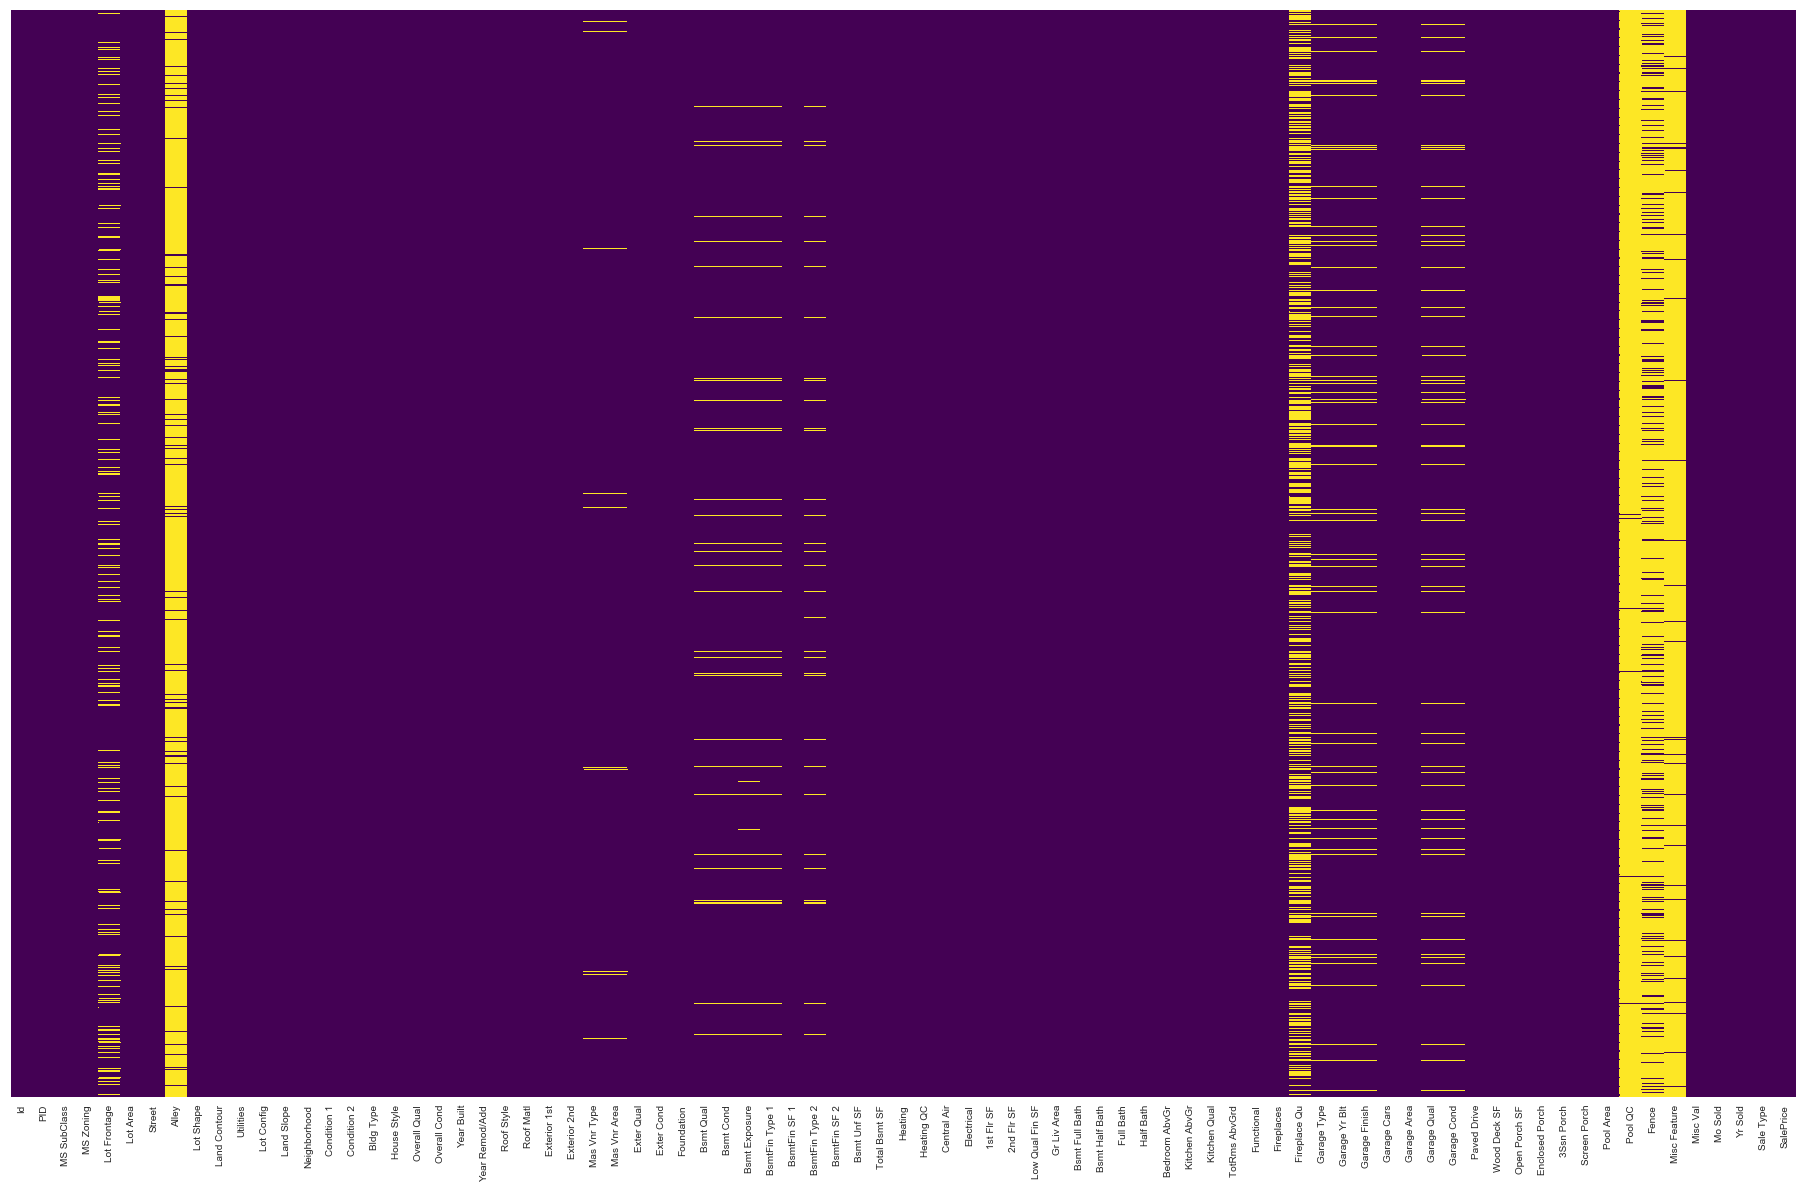

In [6]:
plt.figure(figsize = (32,20))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Find the names of columns with missing data.

In [7]:
train.columns[train.isnull().sum()>0]

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature'],
      dtype='object')

Find the number of missing data in columns where data is missing. 

In [8]:
train[['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']].isnull().sum()

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

For columns with missing data, find percentage of data that is missing. 

In [9]:
def percent_null(df):
    for i in df:
        if df[i].isnull().sum() > 0:
            print(i)
            print("Number of Null Values: " + str(df[i].isnull().sum()))
            print("Percentage of Nulls = " + str(np.round((df[i].isnull().sum() / 20.51), 2)) + "%")
            print("\n")

percent_null(train)

Lot Frontage
Number of Null Values: 330
Percentage of Nulls = 16.09%


Alley
Number of Null Values: 1911
Percentage of Nulls = 93.17%


Mas Vnr Type
Number of Null Values: 22
Percentage of Nulls = 1.07%


Mas Vnr Area
Number of Null Values: 22
Percentage of Nulls = 1.07%


Bsmt Qual
Number of Null Values: 55
Percentage of Nulls = 2.68%


Bsmt Cond
Number of Null Values: 55
Percentage of Nulls = 2.68%


Bsmt Exposure
Number of Null Values: 58
Percentage of Nulls = 2.83%


BsmtFin Type 1
Number of Null Values: 55
Percentage of Nulls = 2.68%


BsmtFin SF 1
Number of Null Values: 1
Percentage of Nulls = 0.05%


BsmtFin Type 2
Number of Null Values: 56
Percentage of Nulls = 2.73%


BsmtFin SF 2
Number of Null Values: 1
Percentage of Nulls = 0.05%


Bsmt Unf SF
Number of Null Values: 1
Percentage of Nulls = 0.05%


Total Bsmt SF
Number of Null Values: 1
Percentage of Nulls = 0.05%


Bsmt Full Bath
Number of Null Values: 2
Percentage of Nulls = 0.1%


Bsmt Half Bath
Number of Null Values: 2
P

We will investigate these null values and see if there is any logical way to fill them. 

#### Investigate null values in columns linked to masonry veneer

In [10]:
train[train['Mas Vnr Type'].isnull()][['Mas Vnr Type','Mas Vnr Area']]

Mas Vnr Type  Mas Vnr Area
22            NaN           NaN
41            NaN           NaN
86            NaN           NaN
212           NaN           NaN
276           NaN           NaN
338           NaN           NaN
431           NaN           NaN
451           NaN           NaN
591           NaN           NaN
844           NaN           NaN
913           NaN           NaN
939           NaN           NaN
1025          NaN           NaN
1244          NaN           NaN
1306          NaN           NaN
1430          NaN           NaN
1434          NaN           NaN
1606          NaN           NaN
1699          NaN           NaN
1815          NaN           NaN
1820          NaN           NaN
1941          NaN           NaN

In [11]:
train[train['Mas Vnr Area'] == 0][['Mas Vnr Type','Mas Vnr Area']].head()

Mas Vnr Type  Mas Vnr Area
2         None           0.0
3         None           0.0
4         None           0.0
5         None           0.0
8         None           0.0

Null values for 'Mas Vnr Type' match rows where 'Mas Vnr Area' is null. We can fill 'None' and 0 for the nulls.

In [12]:
train['Mas Vnr Type'] = train['Mas Vnr Type'].fillna('None')
train['Mas Vnr Area'] = train['Mas Vnr Area'].fillna(0)

#### Investigate null values in columns linked to basement

In [13]:
train[train['Total Bsmt SF'].isnull()][['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin SF 1','BsmtFin Type 2','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
1327       NaN       NaN           NaN            NaN           NaN   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Bsmt Full Bath  \
1327            NaN           NaN          NaN            NaN             NaN   

      Bsmt Half Bath  
1327             NaN

There is only one null value each in 'Total Bsmt SF', 'BsmtFin SF 1', 'BsmtFin SF 2', and 'Bsmt Unf SF'. They are all in the row above and they can be filled with 0 as it is clear that this house has no basement. 

In [14]:
train['Total Bsmt SF'] = train['Total Bsmt SF'].fillna(0)
train['BsmtFin SF 1'] = train['BsmtFin SF 1'].fillna(0)
train['BsmtFin SF 2'] = train['BsmtFin SF 2'].fillna(0)
train['Bsmt Unf SF'] = train['Bsmt Unf SF'].fillna(0)

In [15]:
train[train['Bsmt Full Bath'].isnull()][['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin SF 1','BsmtFin Type 2','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
616        NaN       NaN           NaN            NaN           0.0   
1327       NaN       NaN           NaN            NaN           0.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Bsmt Full Bath  \
616             NaN           0.0          0.0            0.0             NaN   
1327            NaN           0.0          0.0            0.0             NaN   

      Bsmt Half Bath  
616              NaN  
1327             NaN

There are two null values each in 'Bsmt Full Bath' and 'Bsmt Half Bath'. They are all in the two rows above and they can be filled with 0 as it is clear that both houses have no basement.

In [16]:
train['Bsmt Full Bath'] = train['Bsmt Full Bath'].fillna(0)
train['Bsmt Half Bath'] = train['Bsmt Half Bath'].fillna(0)

In [17]:
train[train['Total Bsmt SF'] == 0].index

Int64Index([  12,   93,  114,  146,  183,  240,  249,  256,  390,  437,  485,
             499,  514,  580,  581,  616,  635,  642,  696,  700,  737,  772,
             790,  794,  924,  933,  954, 1007, 1022, 1049, 1089, 1098, 1125,
            1157, 1211, 1222, 1252, 1256, 1270, 1327, 1331, 1377, 1387, 1428,
            1481, 1594, 1620, 1681, 1684, 1686, 1859, 1875, 1889, 1933, 2010],
           dtype='int64')

In [18]:
train[train['Bsmt Qual'].isnull()].index

Int64Index([  12,   93,  114,  146,  183,  240,  249,  256,  390,  437,  485,
             499,  514,  580,  581,  616,  635,  642,  696,  700,  737,  772,
             790,  794,  924,  933,  954, 1007, 1022, 1049, 1089, 1098, 1125,
            1157, 1211, 1222, 1252, 1256, 1270, 1327, 1331, 1377, 1387, 1428,
            1481, 1594, 1620, 1681, 1684, 1686, 1859, 1875, 1889, 1933, 2010],
           dtype='int64')

In [19]:
sum(train[train['Total Bsmt SF'] == 0].index == train[train['Bsmt Qual'].isnull()].index)

55

In [20]:
sum(train[train['Total Bsmt SF'] == 0].index == train[train['Bsmt Cond'].isnull()].index)

55

The above shows that the 55 null values in 'Bsmt Qual' and'Bsmt Cond' come from the same rows where 'Total Bsmt SF' is 0. We can fill the 55 null values with NA, which represents 'No Basement'.

In [21]:
train['Bsmt Qual'] = train['Bsmt Qual'].fillna('NA')
train['Bsmt Cond'] = train['Bsmt Cond'].fillna('NA')

Next, we investigate the 'BsmtFin Type 2' null values, specifically why there are 56 null values when there are only 55 houses with no basement. 

In [22]:
train[(train['BsmtFin Type 2'].isnull()) & (train['BsmtFin SF 2']>0)][['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin SF 1','BsmtFin Type 2','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
1147        Gd        TA            No            GLQ        1124.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Bsmt Full Bath  \
1147            NaN         479.0       1603.0         3206.0             1.0   

      Bsmt Half Bath  
1147             0.0

There is one null value that is in a row where 'BsmtFin SF 2' is not zero. This is most likely a mistake and we should check what is the best value to input. 

In [23]:
train[(train['BsmtFin SF 2']>400)].sort_values(by='BsmtFin SF 2')[['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin SF 1','BsmtFin Type 2','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
1942        TA        TA            No            BLQ         150.0   
1983        Gd        TA            No            ALQ         528.0   
749         Gd        TA            Av            Rec          60.0   
1523        Gd        TA            No            GLQ         803.0   
46          TA        TA            No            LwQ         408.0   
305         TA        TA            No            BLQ         330.0   
811         Gd        Gd            Gd            GLQ         505.0   
1181        TA        TA            No            ALQ          57.0   
758         TA        TA            No            ALQ         110.0   
1778        Gd        TA            Av            Rec          70.0   
1305        Gd        TA            Gd            BLQ         408.0   
1655        TA        TA            No            ALQ         247.0   
1053        TA        TA            No            BLQ         338.0   
279         TA        TA            No            LwQ         138.0   
1563        TA        TA            No            Rec         152.0   
52          Gd        TA            No            BLQ         790.0   
1654        TA        TA            Mn            BLQ         240.0   
1147        Gd        TA            No            GLQ        1124.0   
64          TA        TA            No            Rec         172.0   
1106        TA        TA            Av            Rec         242.0   
774         Gd        Fa            Mn            ALQ         361.0   
1837        TA        TA            Mn            BLQ         234.0   
898         TA        TA            No            BLQ         476.0   
1987        TA        TA            No            ALQ         120.0   
697         TA        TA            No            ALQ         257.0   
1058        Ex        TA            Gd            GLQ        1728.0   
761         Gd        TA            Gd            ALQ        1023.0   
1705        Gd        TA            Av            BLQ         131.0   
917         TA        TA            No            LwQ         226.0   
1718        TA        TA            No            ALQ         179.0   
...        ...       ...           ...            ...           ...   
1345        Gd        TA            No            LwQ         190.0   
1248        TA        Gd            Gd            ALQ         351.0   
786         Gd        TA            Gd            ALQ        1632.0   
1182        TA        TA            No            BLQ         132.0   
519         Gd        TA            Mn            BLQ         128.0   
1462        Gd        TA            Av            Rec         104.0   
319         Gd        TA            Av            BLQ         228.0   
1144        TA        TA            Gd            BLQ         126.0   
980         Gd        TA            Mn            ALQ          35.0   
1907        TA        TA            No            BLQ          25.0   
1898        TA        TA            No            LwQ          65.0   
285         Gd        TA            No            BLQ         299.0   
470         TA        TA            No            LwQ         340.0   
191         Gd        Gd            Gd            LwQ          51.0   
58          TA        TA            No            Rec          85.0   
169         Gd        TA            Av            LwQ         104.0   
1597        TA        TA            No            BLQ         194.0   
1257        Gd        TA            Gd            LwQ         457.0   
835         Gd        TA            No            LwQ         247.0   
32          Gd        Gd            Av            LwQ         437.0   
384         Gd        TA            No            BLQ         625.0   
841         Gd        TA            Gd            LwQ         226.0   
1395        TA        TA            Mn            BLQ         274.0   
223         Gd        TA            Gd            BLQ         429.0   
1166        Gd        TA     

Looking at the 'BsmtFin Type 2' values of rows with 'BsmtFin SF 2' close to 479, there is no discernable majority of values that we can use to guess the value to replace the null. We should look at value counts.

In [24]:
train['BsmtFin Type 2'].value_counts()

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

Setting aside 'Unf', representing unfinished basements, the highest count is for 'Rec'('Average Rec Room'). We will fil in this value for row 1147.

In [25]:
train['BsmtFin Type 2'][1147] = 'Rec'

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
sum(train[train['Total Bsmt SF'] == 0].index == train[train['BsmtFin Type 1'].isnull()].index)

55

In [27]:
sum(train[train['Total Bsmt SF'] == 0].index == train[train['BsmtFin Type 2'].isnull()].index)

55

Now both the 'BsmtFin Type 1' and 'BsmtFin Type 2' null values match the rows where 'Total Bsmt SF' is 0, meaning we should fill 'NA' for 'No Basement'. 

In [28]:
train['BsmtFin Type 1'] = train['BsmtFin Type 1'].fillna('NA')
train['BsmtFin Type 2'] = train['BsmtFin Type 2'].fillna('NA')

Next, we investigate the 'Bsmt Exposure' null values, specifically why there are 58 null values when there are only 55 houses with no basement.

In [29]:
train[(train['Bsmt Exposure'].isnull())& (train['Total Bsmt SF']>0)][['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin SF 1','BsmtFin Type 2','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
1456        Gd        TA           NaN            Unf           0.0   
1547        Gd        TA           NaN            Unf           0.0   
1997        Gd        TA           NaN            Unf           0.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Bsmt Full Bath  \
1456            Unf           0.0        725.0          725.0             0.0   
1547            Unf           0.0       1595.0         1595.0             0.0   
1997            Unf           0.0        936.0          936.0             0.0   

      Bsmt Half Bath  
1456             0.0  
1547             0.0  
1997             0.0

In [30]:
train['Bsmt Exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64

There are three rows with null 'Bsmt Exposure' and 'Total Bsmt SF' above 0. These houses have unfinished basements and therefore nulls should be filled with 'No' for 'No Exposure'. 'No' is also the most common value and so it makes even more sense to fill the nulls with 'No'. 

In [31]:
train['Bsmt Exposure'][1456] = 'No'
train['Bsmt Exposure'][1547] = 'No'
train['Bsmt Exposure'][1997] = 'No'

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
sum(train[train['Total Bsmt SF'] == 0].index == train[train['Bsmt Exposure'].isnull()].index)

55

Now both the 'Bsmt Exposure' null values match the rows where 'Total Bsmt SF' is 0, meaning we should fill 'NA' for 'No Basement'.

In [33]:
train['Bsmt Exposure'] = train['Bsmt Exposure'].fillna('NA')

#### Investigate null values in columns linked to garage

In [34]:
train[train['Garage Cars'].isnull()][['Garage Type','Garage Yr Blt','Garage Finish','Garage Cars','Garage Area','Garage Qual','Garage Cond']]

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
1712      Detchd            NaN           NaN          NaN          NaN   

     Garage Qual Garage Cond  
1712         NaN         NaN

This is the only row with null values for 'Garage Cars' and 'Garage Area'. We will set it aside for now. 

In [35]:
train[train['Garage Area'] == 0].index

Int64Index([  28,   53,   65,   79,  101,  103,  114,  120,  134,  136,
            ...
            1841, 1893, 1927, 1952, 1982, 1991, 2010, 2027, 2039, 2042],
           dtype='int64', length=113)

In [36]:
train[train['Garage Cars'] == 0].index

Int64Index([  28,   53,   65,   79,  101,  103,  114,  120,  134,  136,
            ...
            1841, 1893, 1927, 1952, 1982, 1991, 2010, 2027, 2039, 2042],
           dtype='int64', length=113)

In [37]:
sum(train[train['Garage Area'] == 0].index == train[train['Garage Cars'] == 0].index) 

113

Rows with 0 garage area match the rows with 0 garage cars, which makes sense. 

In [38]:
train[train['Garage Type'].isnull()].index

Int64Index([  28,   53,   65,   79,  101,  103,  114,  120,  134,  136,
            ...
            1841, 1893, 1927, 1952, 1982, 1991, 2010, 2027, 2039, 2042],
           dtype='int64', length=113)

In [39]:
sum(train[train['Garage Area'] == 0].index == train[train['Garage Type'].isnull()].index)

113

The above shows that the 113 null values in 'Garage Type' come from the same rows where 'Garage Area' is 0. We can fill null values of 'Garage Type' with NA, which represents 'No Garage'.

In [40]:
train['Garage Type'] = train['Garage Type'].fillna('NA')

We will now investigate null values for 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', and 'Garage Cond'.

In [41]:
#train.drop(train.index[1712]) to ignore the row with null 'Garage Area'

train.drop(train.index[1712])[train.drop(train.index[1712])['Garage Yr Blt'].isnull()].index

Int64Index([  28,   53,   65,   79,  101,  103,  114,  120,  134,  136,
            ...
            1841, 1893, 1927, 1952, 1982, 1991, 2010, 2027, 2039, 2042],
           dtype='int64', length=113)

In [42]:
sum(train[train['Garage Area'] == 0].index == train.drop(train.index[1712])[train.drop(train.index[1712])['Garage Yr Blt'].isnull()].index) 

113

In [43]:
#train.drop(train.index[1712]) to ignore the row with null 'Garage Area'

train.drop(train.index[1712])[train.drop(train.index[1712])['Garage Finish'].isnull()].index

Int64Index([  28,   53,   65,   79,  101,  103,  114,  120,  134,  136,
            ...
            1841, 1893, 1927, 1952, 1982, 1991, 2010, 2027, 2039, 2042],
           dtype='int64', length=113)

In [44]:
sum(train[train['Garage Area'] == 0].index == train.drop(train.index[1712])[train.drop(train.index[1712])['Garage Finish'].isnull()].index) 

113

In [45]:
#train.drop(train.index[1712]) to ignore the row with null 'Garage Area'

train.drop(train.index[1712])[train.drop(train.index[1712])['Garage Qual'].isnull()].index

Int64Index([  28,   53,   65,   79,  101,  103,  114,  120,  134,  136,
            ...
            1841, 1893, 1927, 1952, 1982, 1991, 2010, 2027, 2039, 2042],
           dtype='int64', length=113)

In [46]:
sum(train[train['Garage Area'] == 0].index == train.drop(train.index[1712])[train.drop(train.index[1712])['Garage Qual'].isnull()].index) 

113

In [47]:
#train.drop(train.index[1712]) to ignore the row with null 'Garage Area'

train.drop(train.index[1712])[train.drop(train.index[1712])['Garage Cond'].isnull()].index

Int64Index([  28,   53,   65,   79,  101,  103,  114,  120,  134,  136,
            ...
            1841, 1893, 1927, 1952, 1982, 1991, 2010, 2027, 2039, 2042],
           dtype='int64', length=113)

In [48]:
sum(train[train['Garage Area'] == 0].index == train.drop(train.index[1712])[train.drop(train.index[1712])['Garage Cond'].isnull()].index) 

113

When ignoring the row with null 'Garage Area', the above shows that the 113 null values in 'Garage Yr Blt','Garage Finish','Garage Qual', and 'Garage Cond' come from the same rows where 'Garage Area' is 0. We can fill the 114 null values (when including row with null 'Garage Area') with NA, which represents 'No Garage'.

In [49]:
train['Garage Yr Blt'] = train['Garage Yr Blt'].fillna('NA')
train['Garage Finish'] = train['Garage Finish'].fillna('NA')
train['Garage Qual'] = train['Garage Qual'].fillna('NA')
train['Garage Cond'] = train['Garage Cond'].fillna('NA')

Revisit the row where 'Garage Cars' and 'Garage Area' are null.

In [50]:
train[train['Garage Cars'].isnull()][['Garage Type','Garage Yr Blt','Garage Finish','Garage Cars','Garage Area','Garage Qual','Garage Cond']]

Garage Type Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
1712      Detchd            NA            NA          NaN          NaN   

     Garage Qual Garage Cond  
1712          NA          NA

It is now clear that 'Garage Cars' and 'Garage Area should be 0 and 'Garage Type' for this row should be 'NA' instead of 'Detchd'.

In [51]:
train['Garage Cars'] = train['Garage Cars'].fillna(0)
train['Garage Area'] = train['Garage Area'].fillna(0)

In [52]:
train['Garage Type'][1712] = 'NA'

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
train['Garage Type'][1712] 

'NA'

#### Investigate null values in 'Fireplace Qu'

In [54]:
train[train['Fireplaces']==0].index 

Int64Index([   0,    2,    3,    4,    6,    7,    8,   10,   11,   13,
            ...
            2017, 2019, 2021, 2027, 2030, 2034, 2038, 2039, 2044, 2047],
           dtype='int64', length=1000)

In [55]:
train[train['Fireplace Qu'].isnull()].index 

Int64Index([   0,    2,    3,    4,    6,    7,    8,   10,   11,   13,
            ...
            2017, 2019, 2021, 2027, 2030, 2034, 2038, 2039, 2044, 2047],
           dtype='int64', length=1000)

In [56]:
sum(train[train['Fireplaces']==0].index == train[train['Fireplace Qu'].isnull()].index)

1000

The above shows that the 2042 null values in 'Fireplace Qu' come from the same rows where 'Fireplaces' is 0. We can fill null values of 'Fireplace Qu' with NA, which represents 'No Fireplace'.

In [57]:
train['Fireplace Qu'] = train['Fireplace Qu'].fillna('NA')

#### Investigate null values in 'Pool QC'

In [58]:
train[train['Pool Area']==0].index 

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050],
           dtype='int64', length=2042)

In [59]:
train[train['Pool QC'].isnull()].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050],
           dtype='int64', length=2042)

In [60]:
sum(train[train['Pool Area']==0].index == train[train['Pool QC'].isnull()].index)

2042

The above shows that the 2042 null values in 'Pool QC' come from the same rows where 'Pool Area' is 0. We can fill null values of 'Pool QC' with NA, which represents 'No Pool'.

In [61]:
train['Pool QC'] = train['Pool QC'].fillna('NA')

#### Investigate null values in 'Lot Frontage'

In [62]:
train[train['Lot Frontage'] == 0]

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

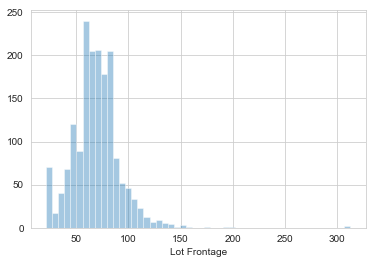

In [63]:
sns.distplot(train['Lot Frontage'].dropna(),kde=False )

'Lot Frontage' represents ['linear feet of street connected to property'](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) and it is unlikely that a lot will have no street connection. Hence no 0 values makes sense and we should not fill null values with 0. Instead, we can group by 'Neighborhood', find the median 'Lot Frontage' value of each neighborhood, and fill the median 'Lot Frontage' value depending on which neighborhood the house belongs to.

In [64]:
train['Lot Frontage'] = train.groupby('Neighborhood')['Lot Frontage'].apply(lambda hood: hood.fillna(hood.median()))

In [65]:
train.groupby('Neighborhood')['Lot Frontage'].median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.0
ClearCr    82.5
CollgCr    70.0
Crawfor    64.0
Edwards    63.0
Gilbert    63.0
Greens     40.0
GrnHill     NaN
IDOTRR     60.0
Landmrk     NaN
MeadowV    21.0
Mitchel    74.0
NAmes      72.0
NPkVill    24.0
NWAmes     80.0
NoRidge    88.5
NridgHt    93.0
OldTown    60.0
SWISU      60.0
Sawyer     70.0
SawyerW    67.0
Somerst    73.0
StoneBr    60.0
Timber     79.0
Veenker    80.0
Name: Lot Frontage, dtype: float64

In [66]:
train[(train['Neighborhood'] == 'GrnHill') | (train['Neighborhood'] == 'Landmrk')]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
463   2257  916253320          120        RM           NaN      9763   Pave   
1121  2789  907230240          160        RH           NaN      3612   Pave   
1211  2893  916252170          120        RM           NaN      8239   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
463    NaN       IR1          Lvl    AllPub     Inside        Gtl   
1121   NaN       IR1          Lvl    AllPub     Inside        Gtl   
1211   NaN       IR1          Lvl    AllPub     Inside        Gtl   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
463       GrnHill        Norm        Norm    TwnhsE      1Story             7   
1121      Landmrk        Norm        Norm     Twnhs      2Story             6   
1211      GrnHill        Norm        Norm    TwnhsE      1Story             7   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
463              5        1998            1998      Gable   CompShg   
1121             5        1993            1994      Gable   CompShg   
1211             5        1986            1986      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
463       Wd Sdng      Wd Sdng      BrkFace         239.0         Gd   
1121      VinylSd      VinylSd         None           0.0         TA   
1211      BrkFace      Wd Sdng         None           0.0         Gd   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
463          TA      PConc        Gd        TA            No            GLQ   
1121         TA      PConc        Gd        TA            No            GLQ   
1211         TA     CBlock        NA        NA            NA             NA   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
463         1102.0            ALQ          72.0        328.0         1502.0   
1121         338.0            Unf           0.0        292.0          630.0   
1211           0.0             NA           0.0          0.0            0.0   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
463     GasA         Ex           Y      SBrkr        1502           0   
1121    GasA         Ex           Y      SBrkr         630         690   
1211    GasA         Gd           Y      SBrkr        1295           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
463                 0         1502             1.0             0.0          1   
1121                0         1320             0.0             0.0          2   
1211                0         1295             0.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
463           1              1              1           Gd              5   
1121          1              3              1           TA              5   
1211          0              2              1           Gd              5   

     Functional  Fireplaces Fireplace Qu Garage Type Garage Yr Blt  \
463         Typ           1           TA      Attchd          1998   
1121        Typ           0           NA      Detchd          1993   
1211        Typ           0           NA      Attchd          1986   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
463            Fin          1.0        286.0          TA          TA   
1121           Unf          2.0        484.0          TA          TA   
1211           RFn          1.0        312.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
463            Y             0              0               0           0   
1121           Y             0             48               0           0   
1211           Y             0              0               0           0   

      Screen Porch  Pool Area Pool QC  Fence Misc Feature  Misc Val  Mo

There are still three null values, because they are the only values in their neighborhoods. We will apply the median value of the entire dataset to them. 

In [67]:
train['Lot Frontage'] = train['Lot Frontage'].fillna(train['Lot Frontage'].median())

#### Investigate null values in 'Alley', 'Fence' and 'Misc Feature'

These columns have over 90% of missing value and no logical way to fill them. We should drop these columns.

In [68]:
train = train.drop(['Alley','Fence','Misc Feature'],axis=1)
train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  109  533352170           60        RL          70.0     13517   Pave   
1  544  531379050           60        RL          43.0     11492   Pave   
2  153  535304180           20        RL          68.0      7922   Pave   
3  318  916386060           60        RL          73.0      9802   Pave   
4  255  906425045           50        RL          82.0     14235   Pave   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2          1              3   
4       

#### Rechecking null values 

In [69]:
train[['Lot Frontage', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Pool QC']].isnull().sum()

Lot Frontage      0
Mas Vnr Type      0
Mas Vnr Area      0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
Fireplace Qu      0
Garage Type       0
Garage Yr Blt     0
Garage Finish     0
Garage Cars       0
Garage Area       0
Garage Qual       0
Garage Cond       0
Pool QC           0
dtype: int64

### Renaming columns

In [70]:
new_column_names = {column:column.lower().replace(' ','_') for column in train.columns}

In [71]:
train.rename(columns=new_column_names,inplace=True)

### Converting ordinal values

Overall Quality and Overall Condition are already in numerical values. We can convert the rest of the ordinal columns to numerical values as well.

In [72]:
ord_columns = ['lot_shape', 'utilities',
       'land_slope', 'exter_qual',
       'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc',
       'electrical', 'kitchen_qual',
       'functional', 'fireplace_qu',
       'garage_finish',
       'garage_qual', 'garage_cond', 'paved_drive',
       'pool_qc']

In [73]:
ord_values = [{'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1},
             {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1},
             {'Gtl':3, 'Mod':2, 'Sev':1},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
             {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0},
             {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0},
             {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
             {'SBrkr':5, 'FuseA':4, 'FuseF':3, 'FuseP':2, 'Mix':1},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
             {'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
             {'Fin':3, 'RFn':2, 'Unf':1, 'NA':0},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
             {'Y':3, 'P':2, 'N':1},
             {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'NA':0}]


In [74]:
def ord_converter(columns,values,df):
    for i in range(0,20):
        df[columns[i]].replace(values[i], inplace=True)
        
ord_converter(ord_columns,ord_values,train)

Check ```type``` of converted columns.

In [75]:
train[['lot_shape', 'utilities',
       'land_slope', 'exter_qual',
       'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc',
       'electrical', 'kitchen_qual',
       'functional', 'fireplace_qu',
       'garage_finish',
       'garage_qual', 'garage_cond', 'paved_drive',
       'pool_qc']].dtypes

lot_shape          int64
utilities         object
land_slope         int64
exter_qual        object
exter_cond         int64
bsmt_qual          int64
bsmt_cond          int64
bsmt_exposure      int64
bsmtfin_type_1     int64
bsmtfin_type_2     int64
heating_qc         int64
electrical         int64
kitchen_qual      object
functional         int64
fireplace_qu       int64
garage_finish      int64
garage_qual        int64
garage_cond        int64
paved_drive        int64
pool_qc            int64
dtype: object

In [76]:
train['utilities'] = train['utilities'].astype(int)
train['exter_qual'] = train['exter_qual'].astype(int)
train['kitchen_qual'] = train['kitchen_qual'].astype(int)

In [77]:
train[['lot_shape', 'utilities',
       'land_slope', 'exter_qual',
       'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc',
       'electrical', 'kitchen_qual',
       'functional', 'fireplace_qu',
       'garage_finish',
       'garage_qual', 'garage_cond', 'paved_drive',
       'pool_qc']].dtypes

lot_shape         int64
utilities         int64
land_slope        int64
exter_qual        int64
exter_cond        int64
bsmt_qual         int64
bsmt_cond         int64
bsmt_exposure     int64
bsmtfin_type_1    int64
bsmtfin_type_2    int64
heating_qc        int64
electrical        int64
kitchen_qual      int64
functional        int64
fireplace_qu      int64
garage_finish     int64
garage_qual       int64
garage_cond       int64
paved_drive       int64
pool_qc           int64
dtype: object

## Exploratory Data Analysis

### Exploring ordinal, discrete, and continuous variables

Text(0.5, 1.0, 'Correlation of numerical features in Ames housing data')

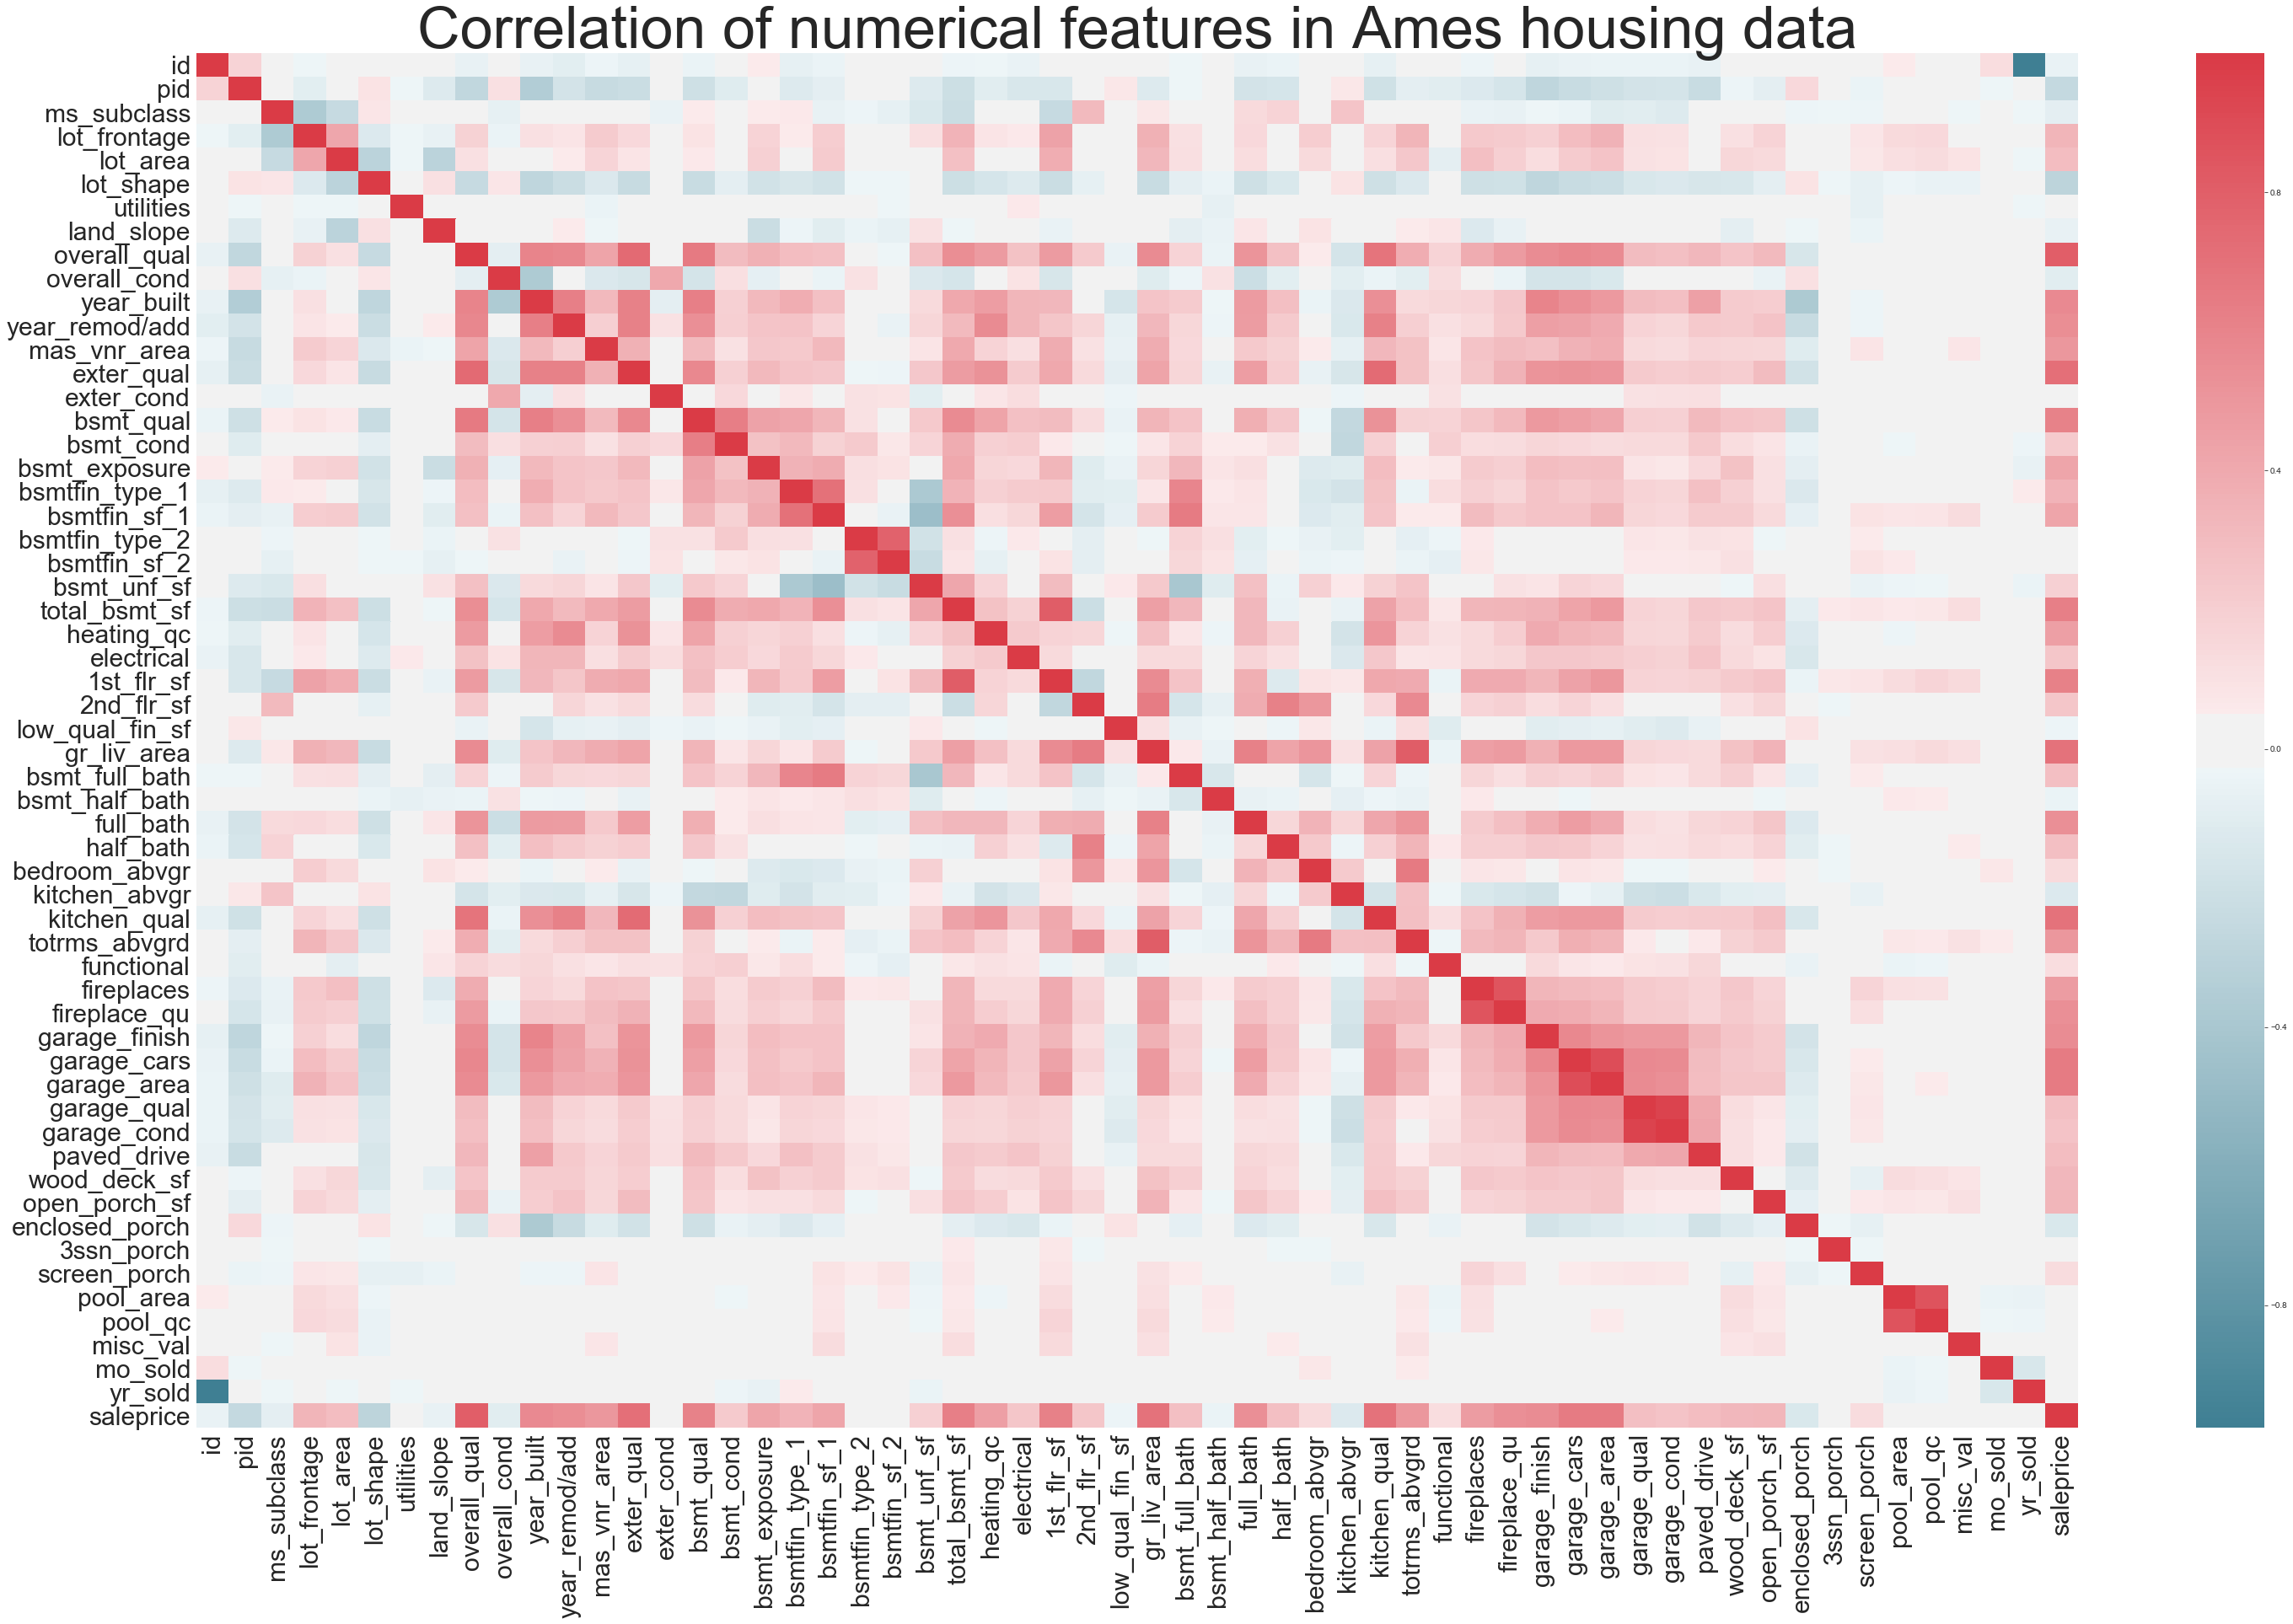

In [78]:
fig, ax = plt.subplots(figsize = (50,30))


sns.heatmap(train.corr(), cmap = sns.diverging_palette(220, 10, as_cmap=True), ax=ax)
ax.tick_params(labelsize=30)
plt.title('Correlation of numerical features in Ames housing data', fontsize=70)

Sale price is most strongly correlated to overall quality, above grade (ground) living area square feet, garage area, and total basement square feet. We can also see strong correlation between all the features related to garage and certain of the features related to basement. 

#### Initial linear model

We will run a simple linear regression model with these variables for an indication of how it performs.

In [79]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge, Lasso, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

As MS subclass is a nominal feature, let us convert it to `object` type.

In [80]:
train['ms_subclass'] = train['ms_subclass'].astype(object)
train['ms_subclass'].dtypes

dtype('O')

In [81]:
def lin_reg(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    lr = LinearRegression()
    lr_scores = cross_val_score(lr, X_train, y_train, cv=10)
    print('Linear regression cross validation scores: ', lr_scores)
    print('Linear regression mean cross validation score: ', np.mean(lr_scores))
    print('Linear regression cross validation scores standard deviation: ', np.std(lr_scores))
    lr_model = lr.fit(X_train,y_train)
    predictions = lr_model.predict(X_test)
    print('Linear regression prediction score: ', lr_model.score(X_test, y_test))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(predictions, y_test)))
    plt.figure(figsize = (20,12))
    sns.scatterplot(predictions, y_test)
    plt.title('Linear regression predictions performance', fontsize=30)
    plt.xlabel('Predicted values', fontsize=15)
    plt.ylabel('Real values', fontsize=15)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='red', linestyle='--')

Linear regression cross validation scores:  [0.8747701  0.84403263 0.83401996 0.80572387 0.87981252 0.64394487
 0.84112118 0.6578544  0.35867296 0.80211509]
Linear regression mean cross validation score:  0.7542067586228094
Linear regression cross validation scores standard deviation:  0.1533437144454678
Linear regression prediction score:  0.8217993223777768
Root mean squared error:  32637.11903943516


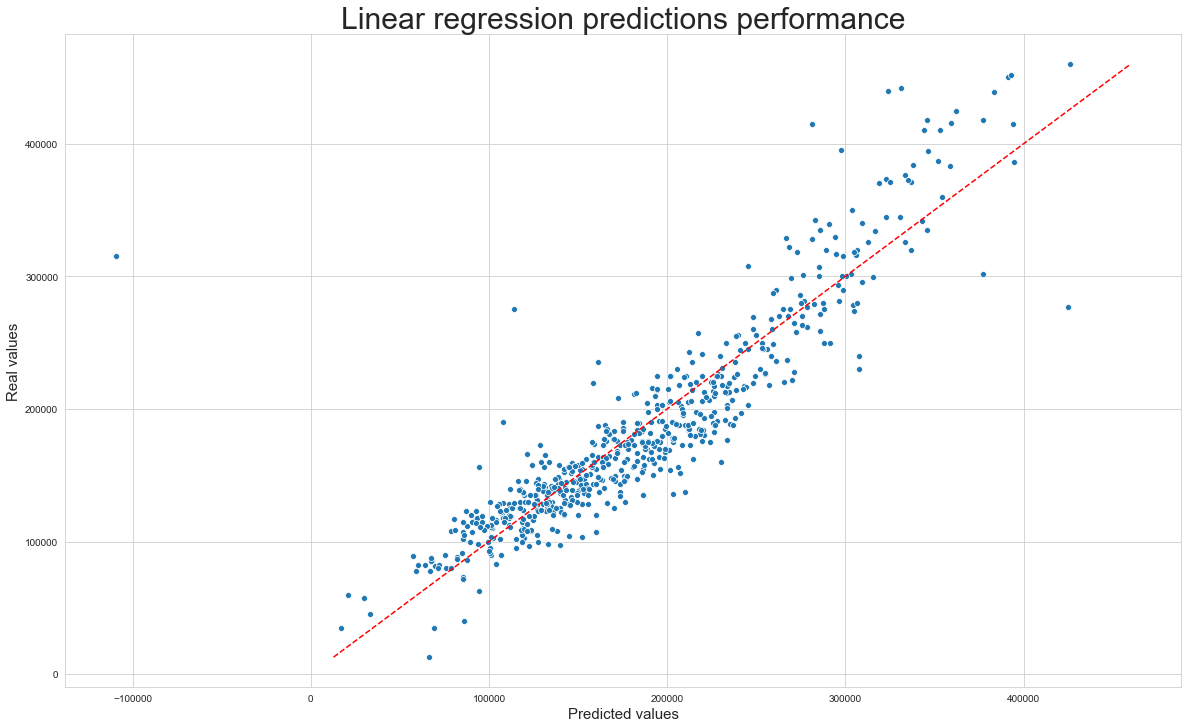

In [82]:
X = train[train.corr().drop(['id', 'pid', 'saleprice'])['saleprice'].index]
y = train['saleprice']

lin_reg(X,y)

The result is surprisingly high considering that it is simply taking into account all continuous, discrete, and ordinal variables. However the spread of results is high and standard deviation is also large. Notably, there is one negative prediction, a particularly poor prediction. Together with the root mean squared error, this forms a baseline of sorts from which we can improve. 

#### Explore most correlated from the above heat map

In [83]:
train.corr().nlargest(11, 'saleprice')['saleprice'].index

Index(['saleprice', 'overall_qual', 'exter_qual', 'gr_liv_area',
       'kitchen_qual', 'garage_area', 'garage_cars', 'total_bsmt_sf',
       '1st_flr_sf', 'bsmt_qual', 'year_built'],
      dtype='object')

Text(0.5, 1.0, 'Top 10 correlated to sale price')

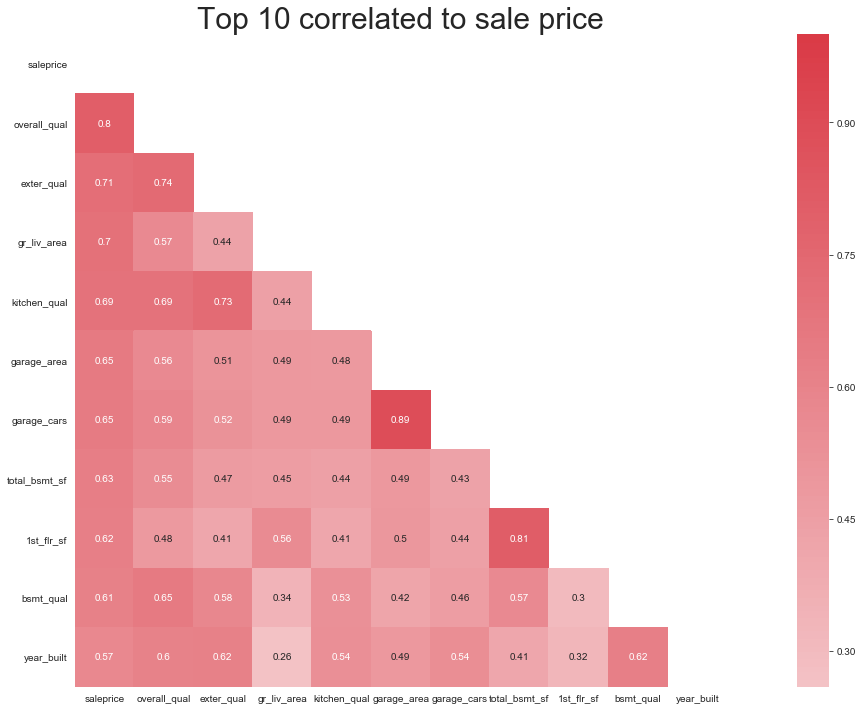

In [84]:
fig, ax = plt.subplots(figsize = (25,12))
#mask for diagonal heatmap
mask = np.zeros_like(train[['saleprice', 'overall_qual', 'exter_qual', 'gr_liv_area',
       'kitchen_qual', 'garage_area', 'garage_cars', 'total_bsmt_sf',
       '1st_flr_sf', 'bsmt_qual', 'year_built']].corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train[['saleprice', 'overall_qual', 'exter_qual', 'gr_liv_area',
       'kitchen_qual', 'garage_area', 'garage_cars', 'total_bsmt_sf',
       '1st_flr_sf', 'bsmt_qual', 'year_built']].corr(), mask=mask, annot=True, center = 0, cmap = sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)
ax.tick_params(labelsize=10)
plt.title('Top 10 correlated to sale price', fontsize=30)

This plot shows in greater detail the top 10 ordinal, discrete, and continuous variables that are most correlated with sale price. This heat map also usefully highlights the high correlation of certain features, garage area-garage cars, total basement square feet-1st floor square feet, and overall quality-exterior quality. 

To avoid multicollinearity, we will pick 'overall_qual', 'gr_liv_area', 'garage_area', 'total_bsmt_sf', and 'year_built' to explore in greater detail using other visualizations, while setting aside the other features that are highly correlated to the five features above.

#### Overall quality

Text(0, 0.5, 'Sale price')

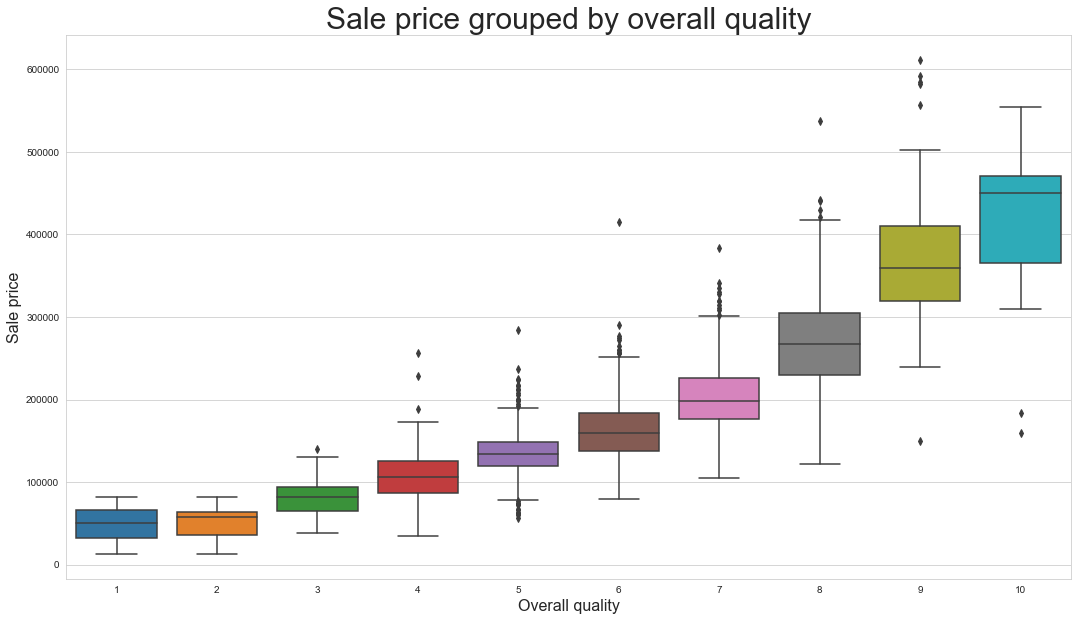

In [85]:
plt.figure(figsize=(18,10))
sns.boxplot(x='overall_qual', y='saleprice', data=train)
plt.title('Sale price grouped by overall quality', fontsize=30)
plt.xlabel('Overall quality', fontsize=16)
plt.ylabel('Sale price', fontsize=16)

Sale price rises with overall quality as expected. The spread of sale price grows with quality, and the interquartile range is visibly larger for overall quality 8, 9, and 10 than the rest. 

#### Year built

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112]),
 <a list of 113 Text xticklabel objects>)

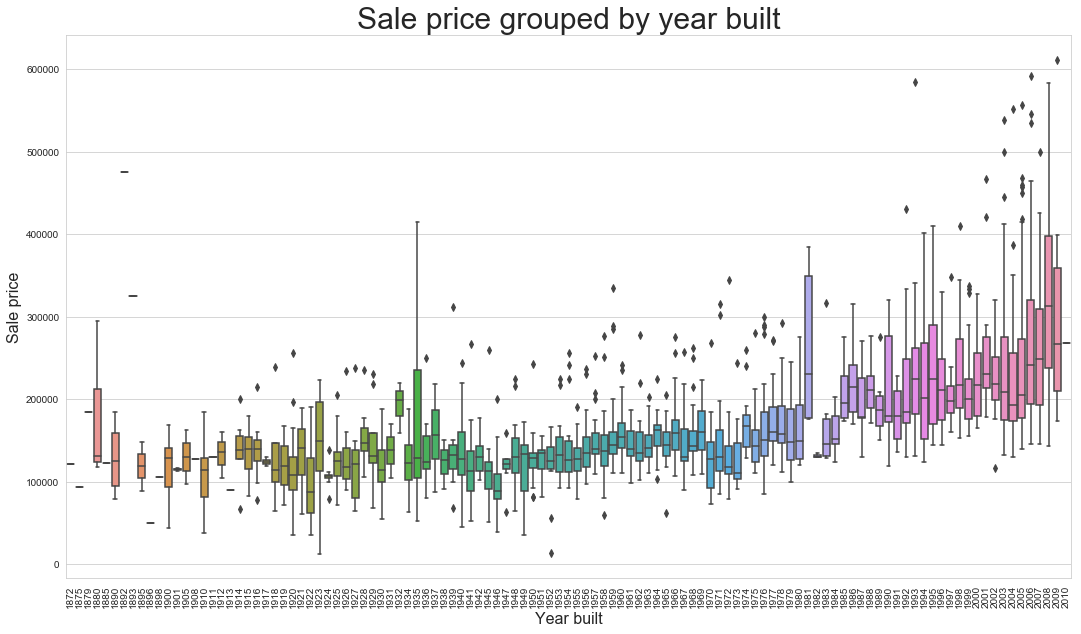

In [86]:
plt.figure(figsize=(18,10))
sns.boxplot(x='year_built', y='saleprice', data=train)
plt.title('Sale price grouped by year built', fontsize=30)
plt.xlabel('Year built', fontsize=16)
plt.ylabel('Sale price', fontsize=16)
plt.xticks(size=10,rotation='vertical')

From the 1980s onwards, housing prices from the 1980s onwards appear to be higher, with median prices hovering around $200,000 and above.  

#### Overview of above grade living area, garage area, and total basement sq ft 

Text(0.5, 0.98, 'Above grade living area, garage area, total basement sq ft relation with sale price')

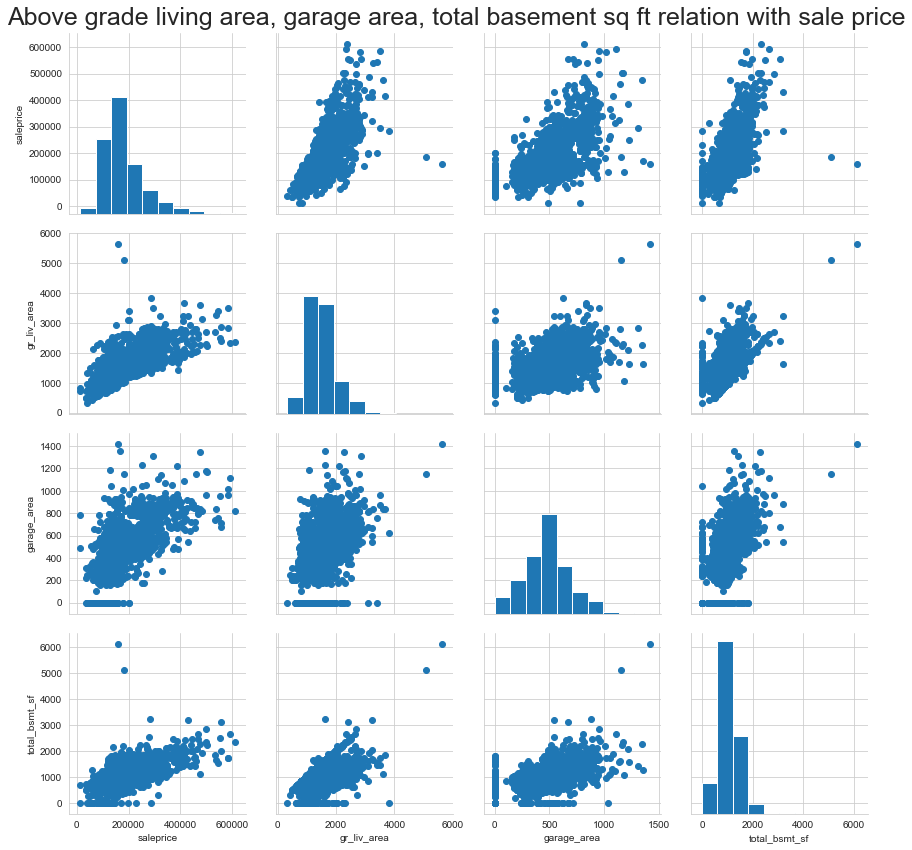

In [87]:
g = sns.PairGrid(train, vars=['saleprice','gr_liv_area', 'garage_area', 'total_bsmt_sf'],height=3)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Above grade living area, garage area, total basement sq ft relation with sale price',fontsize=25)

#### Sale price

Text(0.5, 0, 'Sale price')

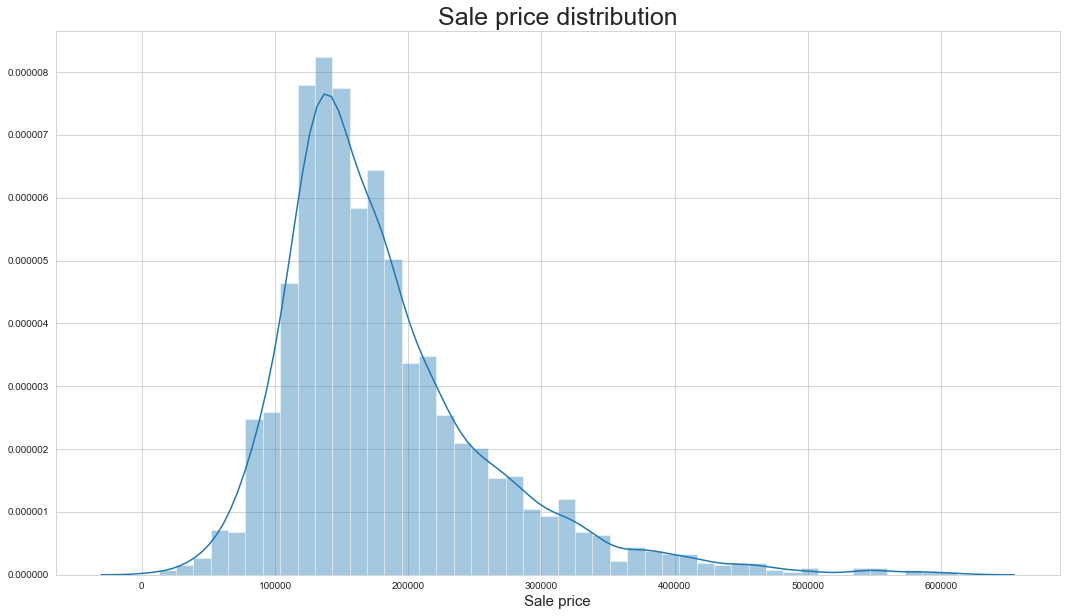

In [88]:
plt.figure(figsize = (18,10))
sns.distplot(train['saleprice'])
plt.title('Sale price distribution', fontsize=25)
plt.tick_params(labelsize=10)
plt.xlabel('Sale price', fontsize=15)

We can see the sale price has a positive skew to the right. There may also be outliers that we can consider clearing.

#### Overall above grade living area

In [89]:
#define a function to plot distribution and scatter plot next to each other
def hist_scatter(column,title_list,xlabel):
    fig, ax = plt.subplots(ncols=2, figsize=(18,8))
    ax = ax.ravel()
    ax[0].hist(train[column],bins=50)
    ax[1].scatter(train[column],train['saleprice'],alpha=0.6,edgecolors='white',linewidths=0.5)
    ax[1].set_ylabel('Sale price', fontsize=16)
    for i, column in enumerate(title_list): # Gives us an index value to get into all our lists
        ax[i].set_xlabel(xlabel, fontsize=16)
        ax[i].set_title(title_list[i], fontsize=28)

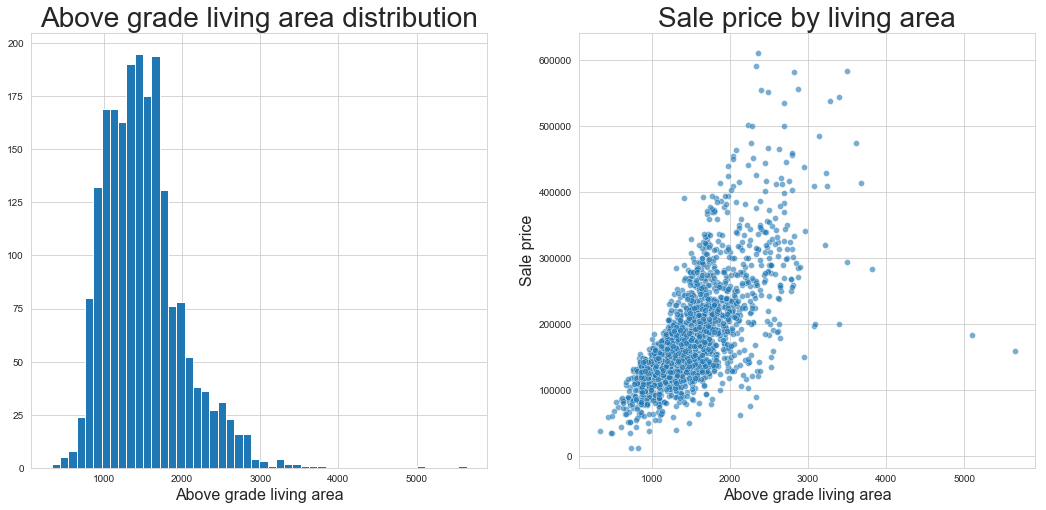

In [90]:
hist_scatter('gr_liv_area',
             ['Above grade living area distribution','Sale price by living area'],
             'Above grade living area')

Distribution is skewed to the right, and the scatter plot shows a linear relationship but with two clear outliers. 

#### Garage area

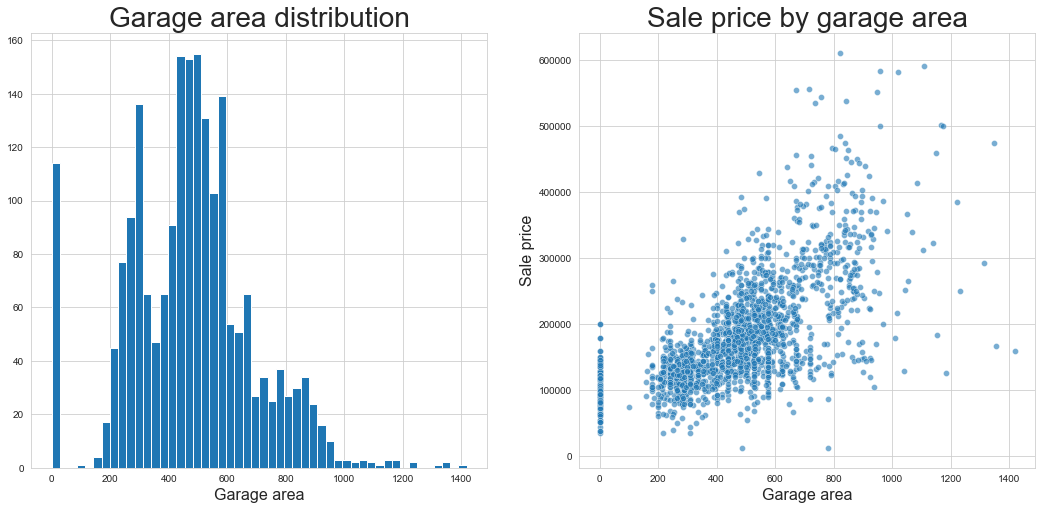

In [91]:
hist_scatter('garage_area',
             ['Garage area distribution','Sale price by garage area'],
             'Garage area')

There are a high number of houses without garages and again the distribution is skewed to the right. Although a linear relationship can still be seen on the scatter plot, the spread is much wider.

#### Total basement sq ft

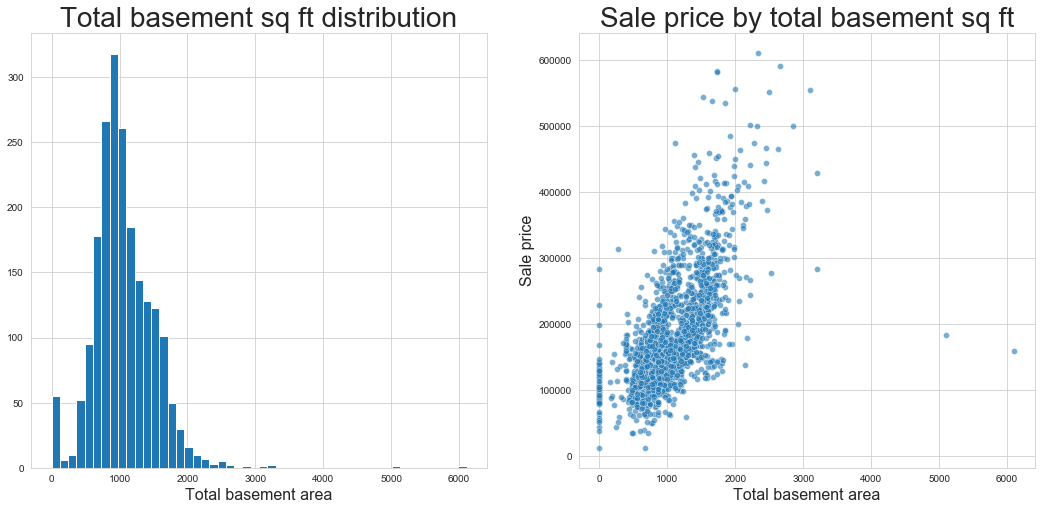

In [92]:
hist_scatter('total_bsmt_sf',
             ['Total basement sq ft distribution','Sale price by total basement sq ft'],
             'Total basement area')

There are a significant number of houses without basements, but nowhere as near as garageless houses. Linear relationship is also stronger than garage-sale price. We see again two outliers in total basement area. 

In [93]:
train[train['total_bsmt_sf']>5000][['gr_liv_area','total_bsmt_sf']]

gr_liv_area  total_bsmt_sf
960          5642         6110.0
1885         5095         5095.0

This shows that the two outliers are also the outliers for above grade living area.  

#### Linear regression with manually selected continuous, discrete, and ordinal variables

Based on the above vizualizations, we will select some features that appear the most correlated with sale price while disregarding some to avoid the problem of multicollinearity. 

Linear regression cross validation scores:  [0.81073417 0.7563748  0.78649078 0.79328105 0.8188707  0.82196215
 0.82530275 0.65957045 0.49618753 0.77533046]
Linear regression mean cross validation score:  0.7544104857469367
Linear regression cross validation scores standard deviation:  0.09776078675993848
Linear regression prediction score:  0.8313505678323816
Root mean squared error:  31750.427821872647


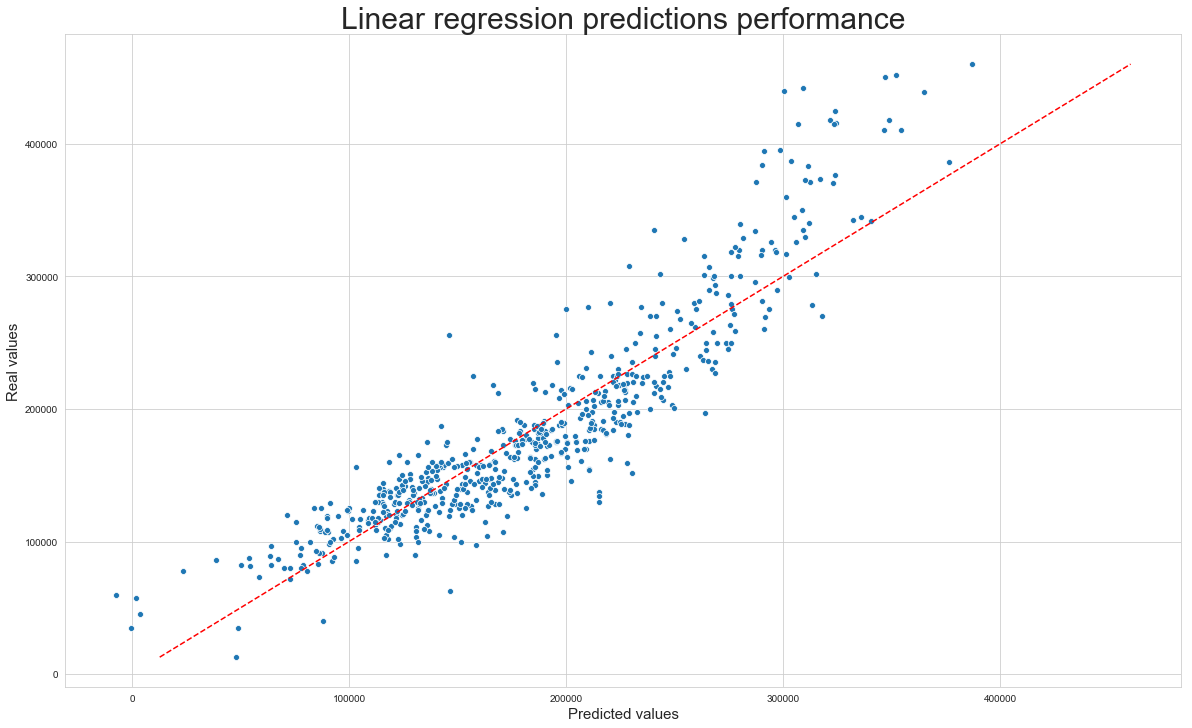

In [94]:
X = train[['overall_qual','gr_liv_area','garage_area','total_bsmt_sf','year_built']]
y = train['saleprice']

lin_reg(X,y)

There is improvement in the standard deviation from cross validation scores and also reduction in root mean squared error, suggesting that judicious selection of variables does have an impact.

#### Continuous, discrete, and ordinal feature selection using lasso regression

In [95]:
def lasso_reg(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    lasso = LassoCV(n_alphas=500, cv=10)
    lasso.fit(X_train, y_train)
    print('Optimal alpha: ', lasso.alpha_)
    opt_lasso = Lasso(alpha=lasso.alpha_)
    opt_lasso_scores = cross_val_score(opt_lasso, X_train, y_train, cv=10)
    print('Lasso regression cross validation scores: ', opt_lasso_scores)
    print('Lasso regression cross validation mean score: ', np.mean(opt_lasso_scores))
    print('Lasso regression cross validation scores standard deviation: ', np.std(opt_lasso_scores))
    opt_lasso.fit(X_train,y_train)
    predictions = opt_lasso.predict(X_test)
    print('Lasso regression prediction score: ', opt_lasso.score(X_test, y_test))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(predictions, y_test)))
    plt.figure(figsize = (20,12))
    sns.scatterplot(predictions, y_test)
    plt.title('Lasso regression predictions performance', fontsize=30)
    plt.xlabel('Predicted values', fontsize=15)
    plt.ylabel('Real values', fontsize=15)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='red', linestyle='--')

Optimal alpha:  149340.07531873367
Lasso regression cross validation scores:  [0.80651282 0.75295209 0.76725025 0.73858126 0.81376267 0.81983816
 0.74224859 0.5451815  0.12899459 0.76134105]
Lasso regression cross validation mean score:  0.6876663002040255
Lasso regression cross validation scores standard deviation:  0.20037603599279624
Lasso regression prediction score:  0.8178408600246564
Root mean squared error:  32997.62050335711


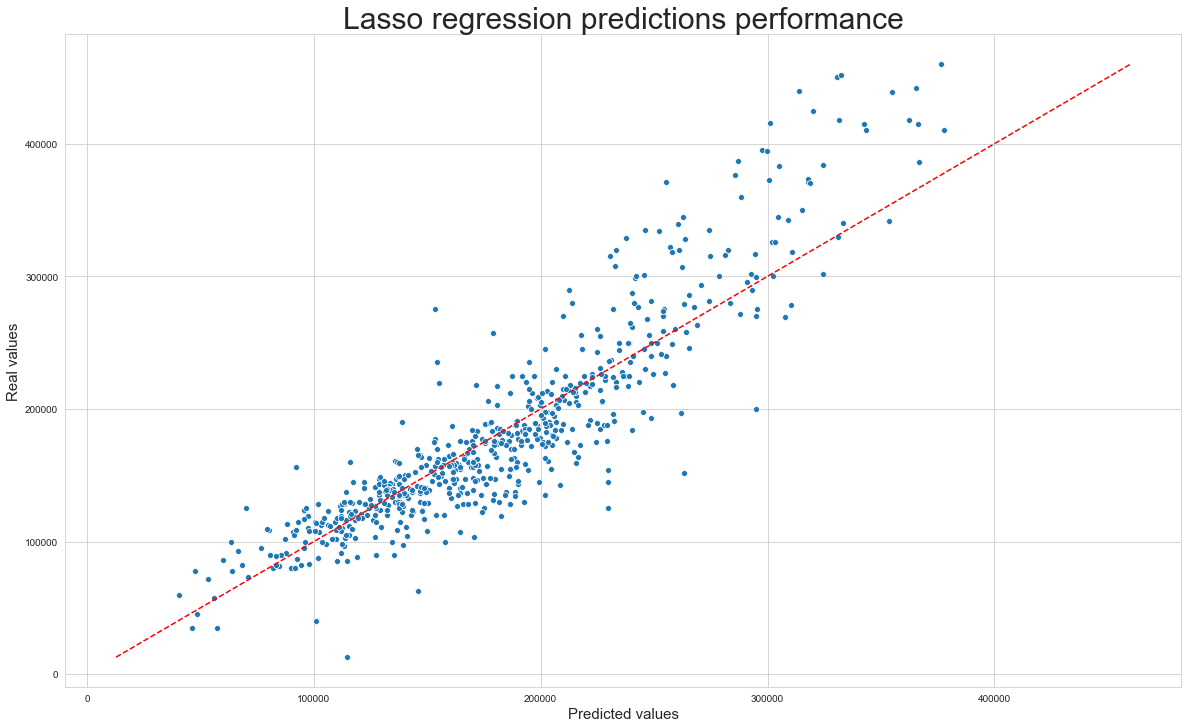

In [96]:
X = train[train.corr().drop(['id', 'pid', 'saleprice'])['saleprice'].index]
y = train['saleprice']
lasso_reg(X,y)

The lasso model performed poorer than not just the linear regression model with manually selected features, it could not beat the linear regression model with all numerical features. There seems to be under-valuing of higher price houses. We will take a look at what features it zeroed out.

In [97]:
def lasso_coef_finder(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    lasso = LassoCV(n_alphas=500, cv=10)
    lasso.fit(X_train, y_train)
    opt_lasso = Lasso(alpha=lasso.alpha_)
    opt_lasso.fit(X_train, y_train)
    opt_lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':opt_lasso.coef_,
                            'abs_coef':np.abs(opt_lasso.coef_)})
    opt_lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    print('Percent variables zeroed out: ', np.sum((opt_lasso.coef_ == 0))/float(X_train.shape[1]))
    return opt_lasso_coefs.head(20)

In [98]:
X = train[train.corr().drop(['id', 'pid', 'saleprice'])['saleprice'].index]
y = train[['saleprice']]
lasso_coef_finder(X, y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Percent variables zeroed out:  0.7592592592592593


variable        coef    abs_coef
8   year_remod/add  329.617091  329.617091
7       year_built  314.105408  314.105408
49       pool_area  -75.356606   75.356606
40     garage_area   64.917515   64.917515
26     gr_liv_area   61.083717   61.083717
48    screen_porch   57.048673   57.048673
9     mas_vnr_area   52.068624   52.068624
44    wood_deck_sf   31.681999   31.681999
20   total_bsmt_sf   29.303824   29.303824
51        misc_val  -15.275723   15.275723
16    bsmtfin_sf_1   14.271994   14.271994
23      1st_flr_sf    0.789184    0.789184
1         lot_area    0.170161    0.170161
37    fireplace_qu    0.000000    0.000000
0     lot_frontage   -0.000000    0.000000
36      fireplaces    0.000000    0.000000
35      functional    0.000000    0.000000
34   totrms_abvgrd    0.000000    0.000000
33    kitchen_qual    0.000000    0.000000
38   garage_finish    0.000000    0.000000

The lasso model zeroed out 75% of features and selected 'overall_qual', 'gr_liv_area', 'garage_area', 'total_bsmt_sf', and 'year_built', similar to our manual selection. However, it also picked a bunch of other features that we had already identified as having to potential to contribute to multicollinearity. More puzzlingly, it also gave pool area a negative coefficient, which does not make sense as properties should be more expensive if they have a bigger pool. 

### Exploring nominal variables

It is almost a truism to say that location is king when it comes to property. Let us take a closer look to see if there is any indication that location, location, location really rules. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

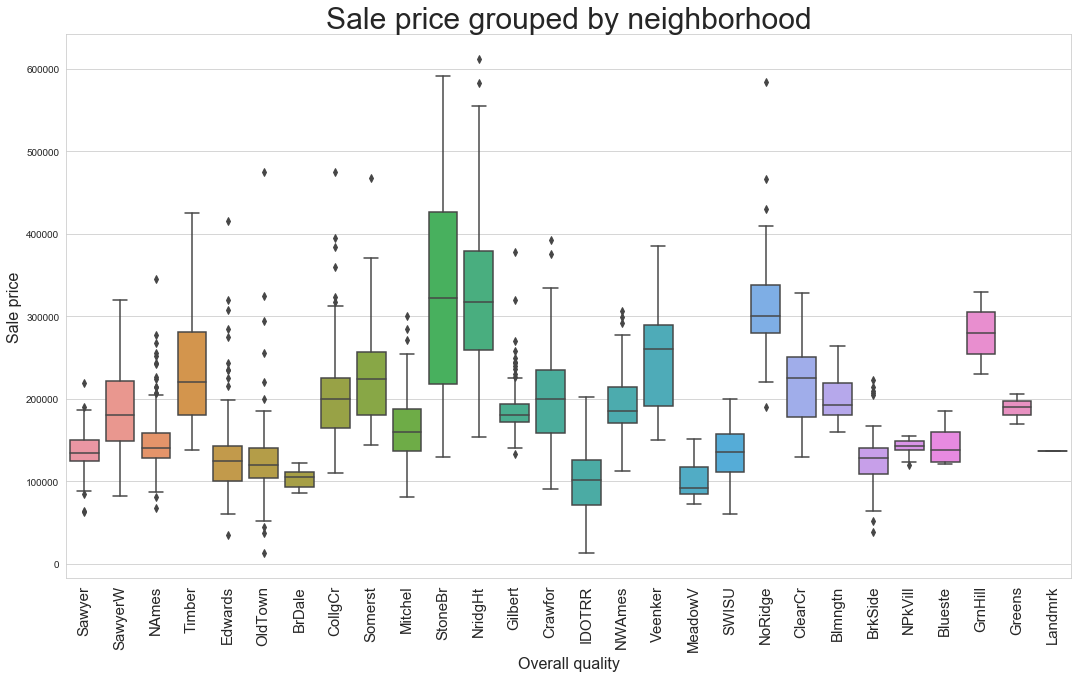

In [99]:
plt.figure(figsize=(18,10))
sns.boxplot(x='neighborhood', y='saleprice', data=train)
plt.title('Sale price grouped by neighborhood', fontsize=30)
plt.xlabel('Overall quality', fontsize=16)
plt.ylabel('Sale price', fontsize=16)
plt.xticks(size=15,rotation='vertical')

Neighborhoods do seem to display significant difference in prices. There is a bunch of medians below \\$150,000, another hovering around \\$200,000, and a final group closer to \\$300,000.

#### Exploring other nominal features

In [100]:
#categorical features, excluding 'neighborhood' as it has already been plotted above
cat_features = train.drop('neighborhood',axis=1).select_dtypes(include=['object']).columns

In [101]:
sorted(cat_features)

['bldg_type',
 'central_air',
 'condition_1',
 'condition_2',
 'exterior_1st',
 'exterior_2nd',
 'foundation',
 'garage_type',
 'garage_yr_blt',
 'heating',
 'house_style',
 'land_contour',
 'lot_config',
 'mas_vnr_type',
 'ms_subclass',
 'ms_zoning',
 'roof_matl',
 'roof_style',
 'sale_type',
 'street']

In [102]:
#percentage of houses that were built at the same time as their garages
train[train['year_built'] == train['garage_yr_blt']].shape[0]/train.shape[0]

0.7625548512920527

More than 75% of houses were built at the same time as their garages. We can drop this column as the values are highly similar to year built.

In [103]:
train = train.drop(['garage_yr_blt'],axis=1)

In [104]:
cat_features = train.drop(['neighborhood'],axis=1).select_dtypes(include=['object']).columns
cat_features

Index(['ms_subclass', 'ms_zoning', 'street', 'land_contour', 'lot_config',
       'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'foundation', 'heating', 'central_air', 'garage_type', 'sale_type'],
      dtype='object')

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


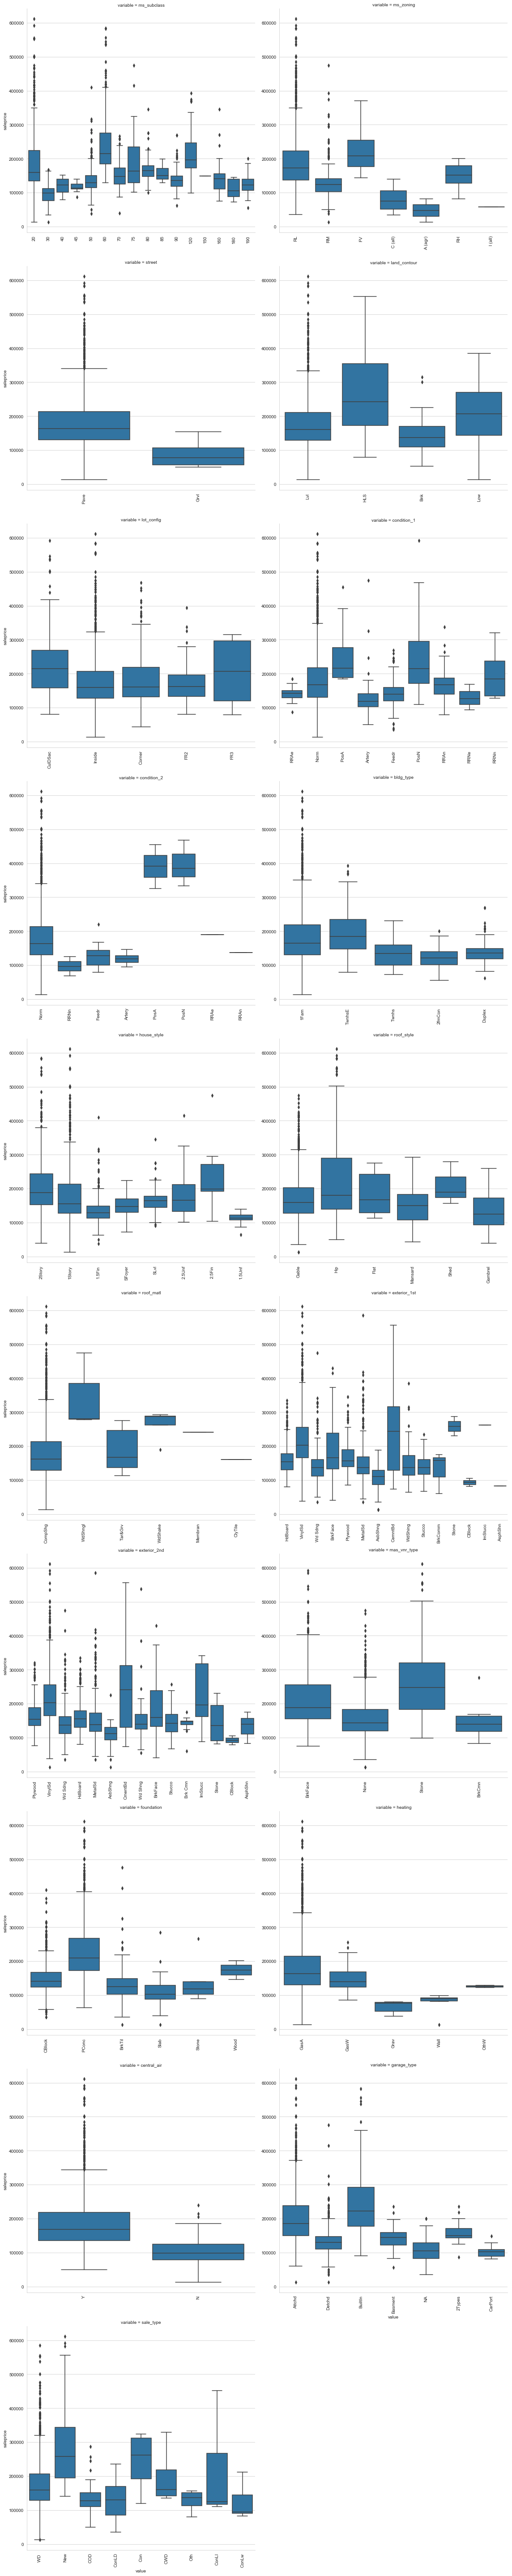

In [105]:
# Count plots of categorical features
f = pd.melt(train, id_vars=['saleprice'], value_vars=cat_features)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False, height=8)
g = g.map(sns.boxplot, 'value', 'saleprice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

Most features show significant variance in median sale price among categories within the features, suggesting they can provide useful indications of what the sale price will be.  

#### Converting nominal features

In [106]:
cat_features = train.select_dtypes(include=['object']).columns
cat_features

Index(['ms_subclass', 'ms_zoning', 'street', 'land_contour', 'lot_config',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'foundation', 'heating', 'central_air',
       'garage_type', 'sale_type'],
      dtype='object')

In [107]:
dummies = pd.get_dummies(train[train.select_dtypes(include=['object']).columns],drop_first=True)
pd.set_option('display.max_columns', 500)
dummies.head()


ms_subclass_30  ms_subclass_40  ms_subclass_45  ms_subclass_50  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               1   

   ms_subclass_60  ms_subclass_70  ms_subclass_75  ms_subclass_80  \
0               1               0               0               0   
1               1               0               0               0   
2               0               0               0               0   
3               1               0               0               0   
4               0               0               0               0   

   ms_subclass_85  ms_subclass_90  ms_subclass_120  ms_subclass_150  \
0               0               0                0                0   
1               0               0                0                0   
2               0               0                0                0   
3               0               0                0                0   
4               0               0                0                0   

   ms_subclass_160  ms_subclass_180  ms_subclass_190  ms_zoning_C (all)  \
0                0                0                0                  0   
1                0                0                0                  0   
2                0                0                0                  0   
3                0                0                0                  0   
4                0                0                0                  0   

   ms_zoning_FV  ms_zoning_I (all)  ms_zoning_RH  ms_zoning_RL  ms_zoning_RM  \
0             0                  0             0             1             0   
1             0                  0             0             1             0   
2             0                  0             0             1             0   
3             0                  0             0             1             0   
4             0                  0             0             1             0   

   street_Pave  land_contour_HLS  land_contour_Low  land_contour_Lvl  \
0            1                 0                 0                 1   
1            1                 0                 0                 1   
2            1                 0                 0                 1   
3            1                 0                 0                 1   
4            1                 0                 0                 1   

   lot_config_CulDSac  lot_config_FR2  lot_config_FR3  lot_config_Inside  \
0                   1               0               0                  0   
1                   1               0               0                  0   
2                   0               0               0                  1   
3                   0               0               0                  1   
4                   0               0               0                  1   

   neighborhood_Blueste  neighborhood_BrDale  neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   neighborhood_ClearCr  neighborhood_CollgCr  neighborhood_Crawfor  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   neighborhood_Edwards  neighborhood_Gilbert  neighborhood_Greens  \
0     

In [108]:
dummies.shape

(2051, 147)

Using `drop_first` within `get_dummies`, we got k-1 dummies out of k categorical levels, to end up with 147 columns of dummy variables. 

#### Initial testing of nominal variables

We will run a simple linear regression model to see how nominal variables fare on their own. 

Linear regression cross validation scores:  [-6.33546108e+15 -2.00929618e+22 -9.22310955e+14  6.33376517e-01
  7.12073099e-01 -4.37285248e+15 -1.33832296e+22 -6.63847565e+17
 -1.94236926e+21 -5.54033414e+22]
Linear regression mean cross validation score:  -9.082257746036061e+21
Linear regression cross validation scores standard deviation:  1.6826368964497452e+22
Linear regression prediction score:  -3.891327534665121e+22
Root mean squared error:  1.525127083682986e+16


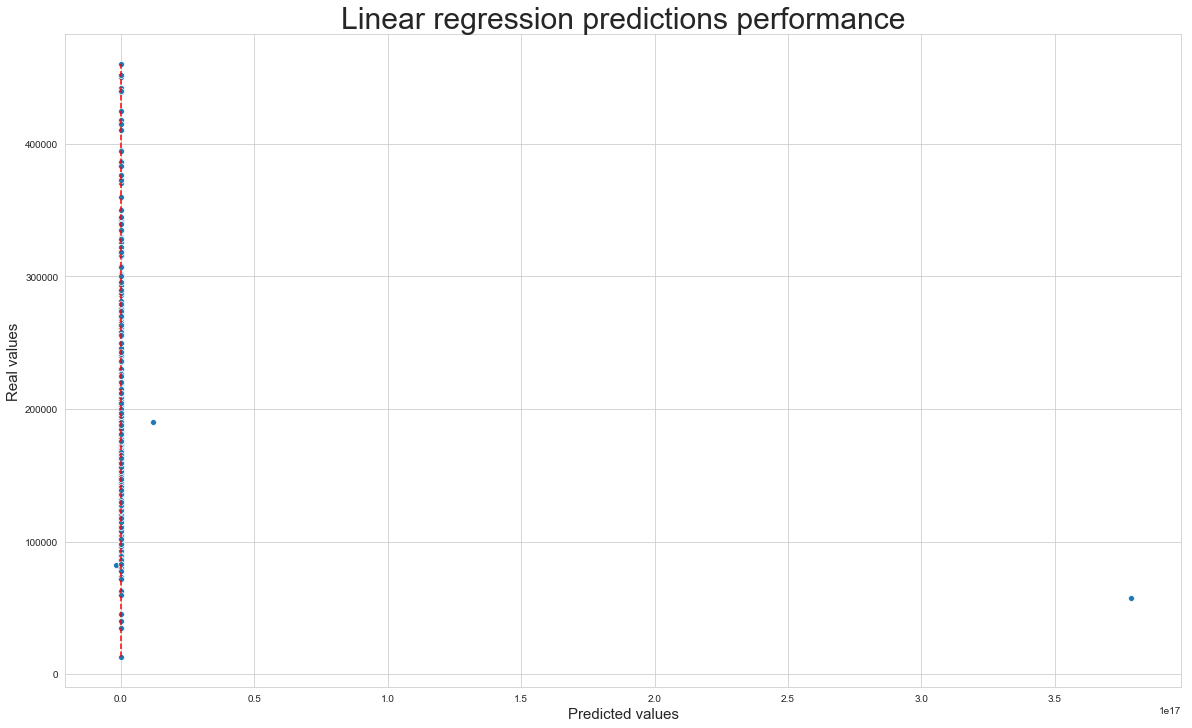

In [109]:
X = dummies
y = train['saleprice']
lin_reg(X,y)

The plot appears to be vertical because of the scale of the X axis. On their own, nominal variables are doing far worse than baseline, as indicated by the negative values of the scores. The model is also prone to large swings, as shown by the large standard deviation. Predictably, with such a weak model, the root mean squared error is gigantic. 

#### Linear regression with manually selected nominal variables

Based on the above vizualizations, we will select some features that appear to show the most variance in price according to categories within the feature. 

In [110]:
dummies_select = pd.get_dummies(train[['ms_subclass','street','land_contour','neighborhood','condition_1',
                                      'bldg_type','house_style','exterior_1st','mas_vnr_type','foundation',
                                      'heating','central_air','sale_type']],drop_first=True)

dummies_select.head()

ms_subclass_30  ms_subclass_40  ms_subclass_45  ms_subclass_50  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               1   

   ms_subclass_60  ms_subclass_70  ms_subclass_75  ms_subclass_80  \
0               1               0               0               0   
1               1               0               0               0   
2               0               0               0               0   
3               1               0               0               0   
4               0               0               0               0   

   ms_subclass_85  ms_subclass_90  ms_subclass_120  ms_subclass_150  \
0               0               0                0                0   
1               0               0                0                0   
2               0               0                0                0   
3               0               0                0                0   
4               0               0                0                0   

   ms_subclass_160  ms_subclass_180  ms_subclass_190  street_Pave  \
0                0                0                0            1   
1                0                0                0            1   
2                0                0                0            1   
3                0                0                0            1   
4                0                0                0            1   

   land_contour_HLS  land_contour_Low  land_contour_Lvl  neighborhood_Blueste  \
0                 0                 0                 1                     0   
1                 0                 0                 1                     0   
2                 0                 0                 1                     0   
3                 0                 0                 1                     0   
4                 0                 0                 1                     0   

   neighborhood_BrDale  neighborhood_BrkSide  neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   neighborhood_CollgCr  neighborhood_Crawfor  neighborhood_Edwards  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   neighborhood_Gilbert  neighborhood_Greens  neighborhood_GrnHill  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   neighborhood_IDOTRR  neighborhood_Landmrk  neighborhood_MeadowV  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   neighborhood_Mitchel  neighborhood_NAmes  neighborhood_NPkVill  \
0                     0                   0                     0   
1               

Linear regression cross validation scores:  [-6.27852965e+18 -3.93990538e+18 -1.15119104e+11  6.66619568e-01
  6.80210000e-01  6.86872732e-01  7.45909204e-01 -5.20788765e+13
 -4.28124334e+03 -5.62624521e+21]
Linear regression mean cross validation score:  -5.636463700301426e+20
Linear regression cross validation scores standard deviation:  1.6875342318288e+21
Linear regression prediction score:  -241208693363797.94
Root mean squared error:  1200752827508.5723


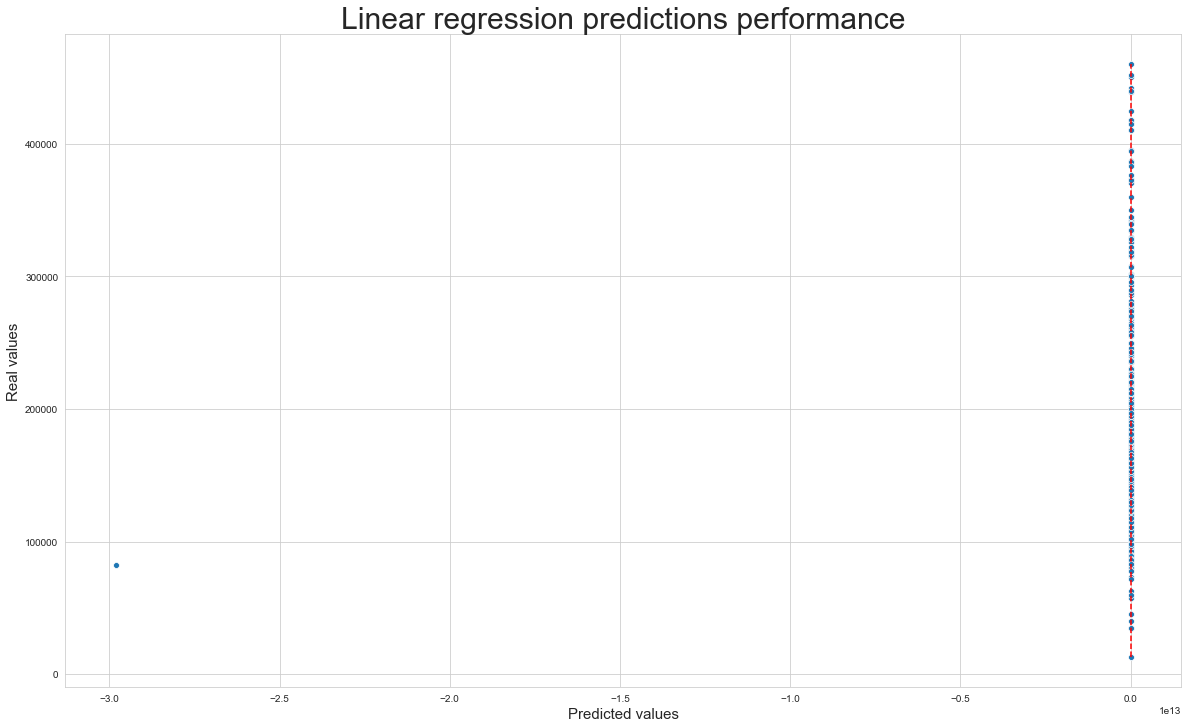

In [111]:
X = dummies_select
y = train['saleprice']
lin_reg(X,y)

Again, the plot looks vertical because of the scale of the X axis. Manual selection did not fare much better than putting all nominal variables in, again doing worse than the baseline. 

#### Nominal feature selection using lasso regression

Optimal alpha:  42.15426872075588
Lasso regression cross validation scores:  [0.7359055  0.66033848 0.68175362 0.67587747 0.69553491 0.68583242
 0.76554991 0.72312002 0.72406085 0.67120674]
Lasso regression cross validation mean score:  0.7019179923729958
Lasso regression cross validation scores standard deviation:  0.0319378164685745
Lasso regression prediction score:  0.7025304431289416
Root mean squared error:  42167.553361642465


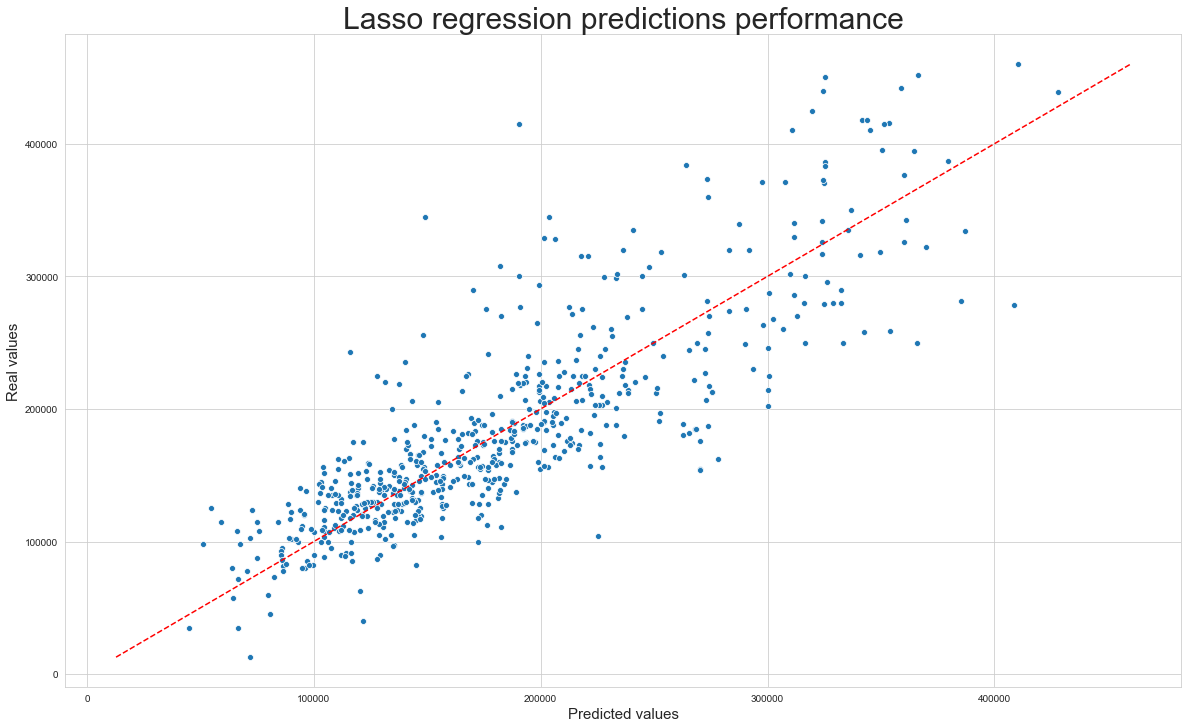

In [112]:
X = dummies
y = train['saleprice']
lasso_reg(X,y)

The lasso model used on nominal variable performed vastly better and the model stabilized considerably as well. However, the root mean squared error much larger than even the linear regression model using all numerical variables. We shall investigate further which features were selected by our lasso model.

In [113]:
X = dummies
y = train['saleprice']
lasso_coef_finder(X,y)

Percent variables zeroed out:  0.3333333333333333


variable           coef       abs_coef
91      roof_matl_WdShngl  133743.442442  133743.442442
53   neighborhood_StoneBr  102347.996830  102347.996830
38   neighborhood_GrnHill   93950.389058   93950.389058
47   neighborhood_NridgHt   93798.666232   93798.666232
46   neighborhood_NoRidge   86341.846516   86341.846516
77     house_style_2.5Fin   75685.023383   75685.023383
66       condition_2_PosA   66619.959488   66619.959488
55   neighborhood_Veenker   60667.652631   60667.652631
41   neighborhood_MeadowV  -55215.244125   55215.244125
6          ms_subclass_75   41134.999557   41134.999557
35   neighborhood_Edwards  -40563.508100   40563.508100
96   exterior_1st_CemntBd   38007.229891   38007.229891
67       condition_2_PosN   37864.825837   37864.825837
39    neighborhood_IDOTRR  -36858.339533   36858.339533
59       condition_1_PosN   36690.679149   36690.679149
43     neighborhood_NAmes  -35938.478454   35938.478454
73        bldg_type_Twnhs  -33836.710176   33836.710176
48   neighborhood_OldTown  -33059.027021   33059.027021
50    neighborhood_Sawyer  -33029.840631   33029.840631
122    mas_vnr_type_Stone   32769.380889   32769.380889

One-thirds of nominal dummies were zeroed out. The columns with the largest coefficients mostly refer to neighborhood, affirming our intuition that it is the most important of all the nominal features. 

### Combining continuous, discrete, ordinal, and nominal features

In [114]:
numeric = train[train.corr().drop(['id', 'pid','saleprice'])['saleprice'].index]
numeric.shape

(2051, 54)

#### Scale data

We will scale the features before joining with the dummy variables from nominal features.

In [115]:
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [116]:
numeric_scaled = pd.DataFrame(numeric_scaled,columns=numeric.columns)

In [117]:
dummies.shape

(2051, 147)

In [118]:
df_features = numeric_scaled.join(dummies)

In [119]:
df_features = df_features.join(train[['saleprice']])
df_features.head()

lot_frontage  lot_area  lot_shape  utilities  land_slope  overall_qual  \
0      0.037023  0.512071  -1.051963   0.029638    0.215628     -0.078644   
1     -1.208167  0.211664  -1.051963   0.029638    0.215628      0.622656   
2     -0.055214 -0.317944   0.713648   0.029638    0.215628     -0.779944   
3      0.175377 -0.039047   0.713648   0.029638    0.215628     -0.779944   
4      0.590440  0.618586  -1.051963   0.029638    0.215628     -0.078644   

   overall_cond  year_built  year_remod/add  mas_vnr_area  exter_qual  \
0      2.207728    0.142227        0.989479      1.092329    1.010273   
1     -0.509102    0.805126        0.609090      0.191491    1.010273   
2      1.302118   -0.620106        1.084576     -0.565901   -0.690934   
3     -0.509102    1.136575        1.084576     -0.565901   -0.690934   
4      2.207728   -2.376787        0.418896     -0.565901   -0.690934   

   exter_cond  bsmt_qual  bsmt_cond  bsmt_exposure  bsmtfin_type_1  \
0   -0.230243  -0.543594   0.123625      -0.585002         1.14603   
1   -0.230243   0.565771   0.123625      -0.585002         1.14603   
2    2.452869  -0.543594   0.123625      -0.585002         1.14603   
3   -0.230243   0.565771   0.123625      -0.585002        -1.20683   
4   -0.230243  -1.652959   1.872274      -0.585002        -1.20683   

   bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
0      0.197178       -0.290583     -0.290653    -0.843874      -0.739158   
1      0.422734       -0.290583     -0.290653    -0.655073      -0.321193   
2      0.626602       -0.290583     -0.290653    -0.542692      -0.001049   
3     -0.958797       -0.290583     -0.290653    -0.412330      -1.497275   
4     -0.958797       -0.290583     -0.290653     0.243976      -0.848096   

   heating_qc  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  \
0    0.873079    0.284752   -1.108838    0.997894        -0.107977   
1    0.873079    0.284752   -0.634510    2.067055        -0.107977   
2   -1.201874    0.284752   -0.271195   -0.773859        -0.107977   
3   -0.164398    0.284752   -1.060900    0.871004        -0.107977   
4   -1.201874    0.284752   -0.841397    0.668921        -0.107977   

   gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  \
0    -0.040634       -0.817494       -0.251994   0.769779   1.255611   
1     1.244529        1.096524       -0.251994   0.769779   1.255611   
2    -0.884084        1.096524       -0.251994  -1.051232  -0.740713   
3    -0.110588       -0.817494       -0.251994   0.769779   1.255611   
4    -0.108589       -0.817494       -0.251994   0.769779  -0.740713   

   bedroom_abvgr  kitchen_abvgr  kitchen_qual  totrms_abvgrd  functional  \
0       0.189383      -0.204568      0.725399      -0.279441    0.229782   
1       1.399426      -0.204568      0.725399       1.002738    0.229782   
2       0.189383      -0.204568      0.725399      -0.920531    0.229782   
3       0.189383      -0.204568     -0.777423       0.361648    0.229782   
4       0.189383      -0.204568     -0.777423      -0.279441    0.229782   

   fireplaces  fireplace_qu  garage_finish  garage_cars  garage_area  \
0   -0.925701     -0.976141       0.308137     0.293112     0.007216   
1    0.640811      0.684405       0.308137     0.293112     0.395957   
2   -0.925701     -0.976141      -0.804519    -1.013786    -1.052565   
3   -0.925701     -0.976141       1.420793     0.293112    -0.339874   
4   -0.925701     -0.976141      -0.804519     0.293112     0.048867   

   garage_qual  garage_cond  paved_drive  wood_deck_sf  open_porch_sf  \
0     0.273171     0.264923     0.310964     -0.730121      -0.053301   
1     0.273171     0.264923     0.310964     -0.730121       0.396266   
2     0.273171     0.264923     0.310964     -0.730121       0.066584   
3     0.273171     0.264923     0.310964      0.047980      -0.712665   
4     0.273171     0.264923    -3.429720     -0.730121       0.171483   

   enclosed_porch  3ssn_porch  scr

In [120]:
df_features.shape

(2051, 202)

## Building a Prediction Model

### Modelling on all features

#### Linear regression

Linear regression cross validation scores:  [-1.33663978e+11 -3.67435028e+13 -6.33658025e+08  8.33212351e-01
  9.12121452e-01 -1.08903992e+11 -5.89841017e+15 -1.28702987e+11
 -3.15292861e+20 -1.31739567e+18]
Linear regression mean cross validation score:  -3.166161924968389e+19
Linear regression cross validation scores standard deviation:  9.454456230650574e+19
Linear regression prediction score:  -4.429480679447856e+23
Root mean squared error:  5.1455706528635784e+16


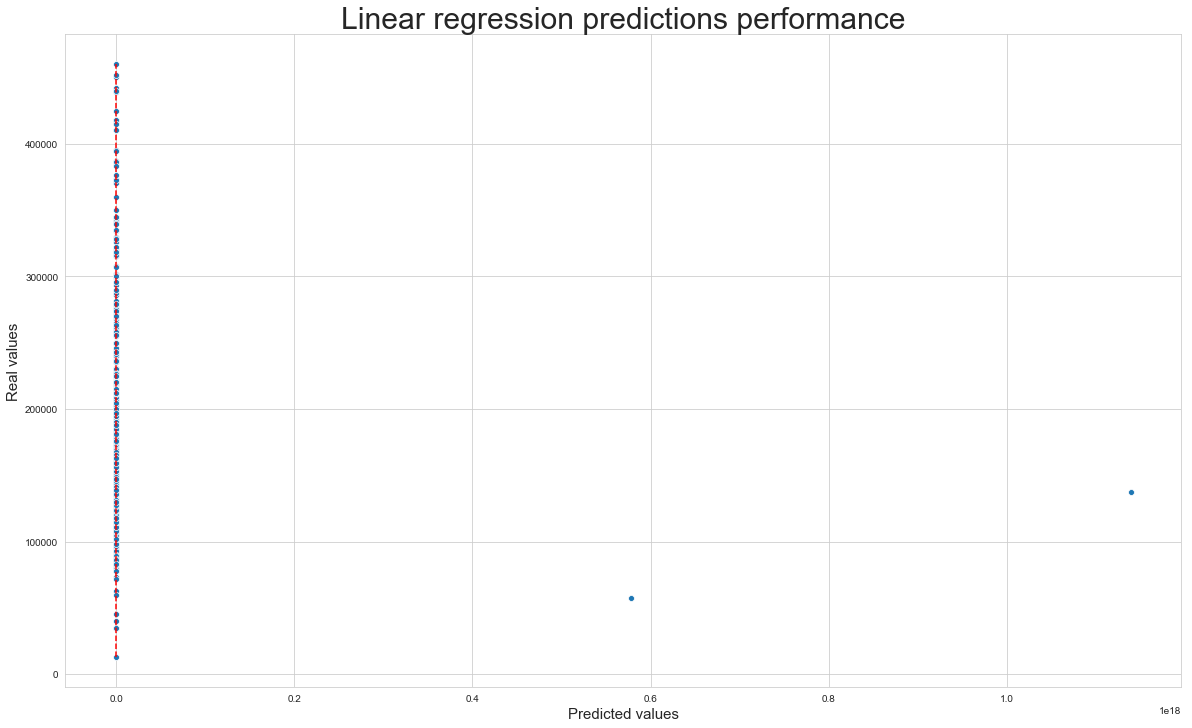

In [121]:
X = df_features.drop('saleprice',axis=1)
y = df_features['saleprice']
lin_reg(X,y)

The plot appears vertical because of the scale of the X axis. Most of the cross validation scores are extremely negative and standard deviation is very large, showing highly unstable performance that is far worse than baseline. The model is probably dramatically overfitting. 

#### Ridge regression

In [122]:
def ridge_reg(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    ridge_alphas = np.logspace(0, 5, 200)
    ridge = RidgeCV(alphas=ridge_alphas, cv=10)
    ridge.fit(X_train, y_train)
    print('Optimal alpha: ', ridge.alpha_)
    opt_ridge = Ridge(alpha=ridge.alpha_)
    opt_ridge_scores = cross_val_score(opt_ridge, X_train, y_train, cv=10)
    print('Ridge regression cross validation scores: ', opt_ridge_scores)
    print('Ridge regression cross validation mean score: ', np.mean(opt_ridge_scores))
    print('Ridge regression cross validation scores standard deviation: ', np.std(opt_ridge_scores))
    opt_ridge.fit(X_train,y_train)
    predictions = opt_ridge.predict(X_test)
    print('Ridge regression prediction score: ', opt_ridge.score(X_test, y_test))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(predictions, y_test)))
    plt.figure(figsize = (20,12))
    sns.scatterplot(predictions, y_test)
    plt.title('Ridge regression predictions performance', fontsize=30)
    plt.xlabel('Predicted values', fontsize=15)
    plt.ylabel('Real values', fontsize=15)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='red', linestyle='--')

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Optimal alpha:  615.0985788580505
Ridge regression cross validation scores:  [0.85825313 0.85112214 0.84086855 0.84543823 0.86814377 0.84704114
 0.87051254 0.70877502 0.55697163 0.86787249]
Ridge regression cross validation mean score:  0.8114998637081078
Ridge regression cross validation scores standard deviation:  0.09604125450337342
Ridge regression prediction score:  0.8732844549610083
Root mean squared error:  27521.499202556388


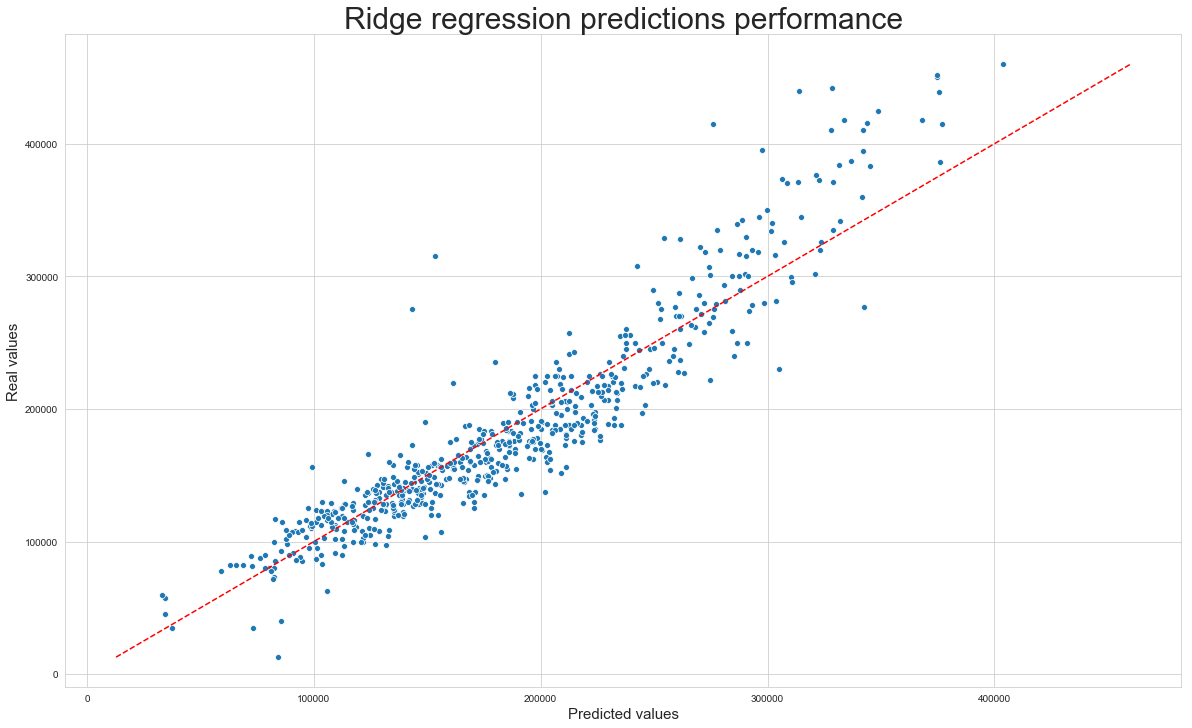

In [123]:
X = df_features.drop('saleprice',axis=1)
y = df_features['saleprice']
ridge_reg(X,y)

The ridge regression peforms vastly better. It is likely that the multicollinearity in the data has been tamed, producing a better score, stable performance as shown by cross validation standard deviation, and our best root mean squared error so far. 

#### Lasso regression

Optimal alpha:  64.04906338020406
Lasso regression cross validation scores:  [0.9013619  0.85396465 0.86408813 0.82964386 0.89488908 0.77308415
 0.88748242 0.72406188 0.54689983 0.87114902]
Lasso regression cross validation mean score:  0.814662490724178
Lasso regression cross validation scores standard deviation:  0.10406374543215507
Lasso regression prediction score:  0.8732135561969265
Root mean squared error:  27529.197419139356


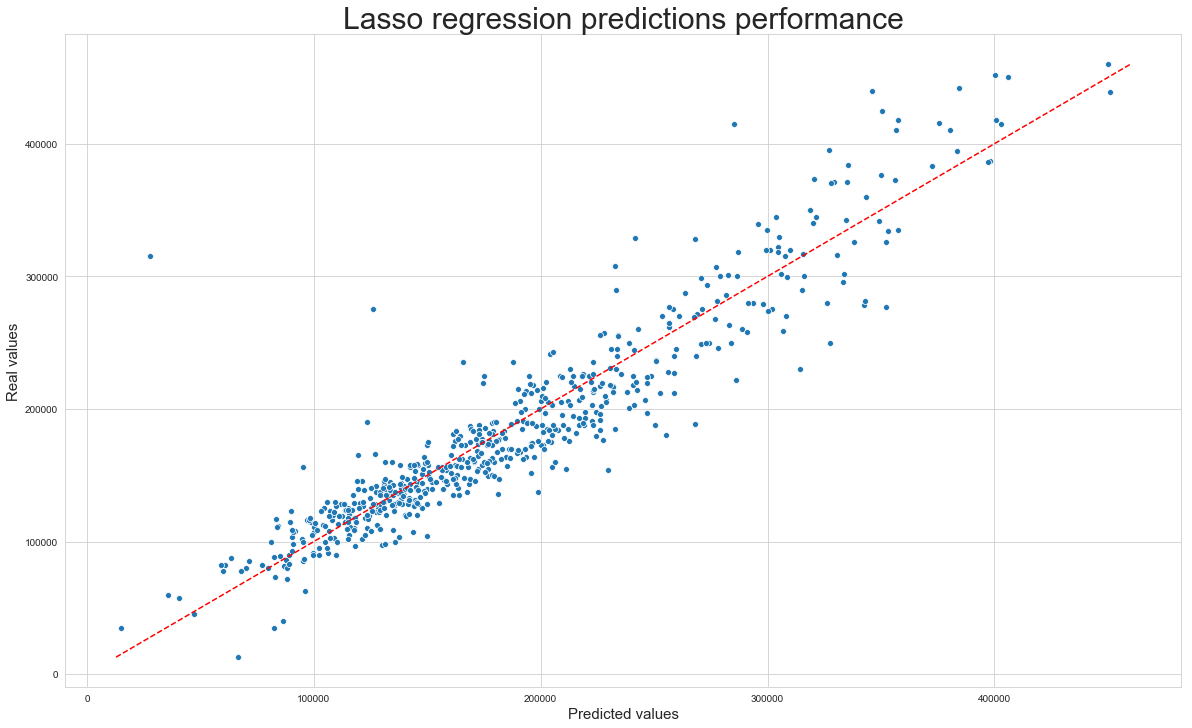

In [124]:
X = df_features.drop('saleprice',axis=1)
y = df_features['saleprice']
lasso_reg(X,y)

In [125]:
X = df_features.drop('saleprice',axis=1)
y = df_features['saleprice']
lasso_coef_finder(X,y)

Percent variables zeroed out:  0.4577114427860697


variable          coef      abs_coef
92   neighborhood_GrnHill  69703.405714  69703.405714
107  neighborhood_StoneBr  56886.463897  56886.463897
145     roof_matl_WdShngl  43173.693810  43173.693810
101  neighborhood_NridgHt  39774.791662  39774.791662
100  neighborhood_NoRidge  27705.590750  27705.590750
113      condition_1_PosN  22153.274682  22153.274682
127       bldg_type_Twnhs -20883.900101  20883.900101
128      bldg_type_TwnhsE -20265.489052  20265.489052
26            gr_liv_area  17812.607122  17812.607122
76       land_contour_HLS  17707.967108  17707.967108
139    roof_style_Mansard -17464.302813  17464.302813
192        garage_type_NA  16837.636842  16837.636842
89   neighborhood_Edwards -15134.912574  15134.912574
198         sale_type_New  14490.401268  14490.401268
5            overall_qual  13383.853771  13383.853771
50                pool_qc -13207.007059  13207.007059
112      condition_1_PosA  11719.231797  11719.231797
88   neighborhood_Crawfor  11195.648397  11195.648397
156   exterior_1st_Stucco -10806.057962  10806.057962
141     roof_matl_CompShg  10463.287652  10463.287652

Lasso regression performs very similarly to ridge regression and produces almost the same measures of performance. We can see from the top coefficients that neighborhood, above grade living area, and overall quality remain very important to the model. 

#### ElasticNet regression

In [126]:
def enet_reg(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    l1_ratios = np.linspace(0.01, 1.0, 25)
    enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10)
    enet.fit(X_train, y_train)
    print('Optimal alpha: ', enet.alpha_)
    print('Optimal l1 ratio: ', enet.l1_ratio_)
    opt_enet = ElasticNet(alpha=enet.alpha_, l1_ratio=enet.l1_ratio_)
    opt_enet_scores = cross_val_score(opt_enet, X_train, y_train, cv=10)
    print('ElasticNet regression cross validation scores: ', opt_enet_scores)
    print('ElasticNet regression cross validation mean score: ', np.mean(opt_enet_scores))
    print('ElasticNet regression cross validation scores standard deviation: ', np.std(opt_enet_scores))
    opt_enet.fit(X_train,y_train)
    predictions = opt_enet.predict(X_test)
    print('ElasticNet regression prediction score: ', opt_enet.score(X_test, y_test))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(predictions, y_test)))
    plt.figure(figsize = (20,12))
    sns.scatterplot(predictions, y_test)
    plt.title('Elastic net regression predictions performance', fontsize=30)
    plt.xlabel('Predicted values', fontsize=15)
    plt.ylabel('Real values', fontsize=15)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='red', linestyle='--')

Optimal alpha:  64.04906338020406
Optimal l1 ratio:  1.0
ElasticNet regression cross validation scores:  [0.9013619  0.85396465 0.86408813 0.82964386 0.89488908 0.77308415
 0.88748242 0.72406188 0.54689983 0.87114902]
ElasticNet regression cross validation mean score:  0.814662490724178
ElasticNet regression cross validation scores standard deviation:  0.10406374543215507
ElasticNet regression prediction score:  0.8732135561969265
Root mean squared error:  27529.197419139356


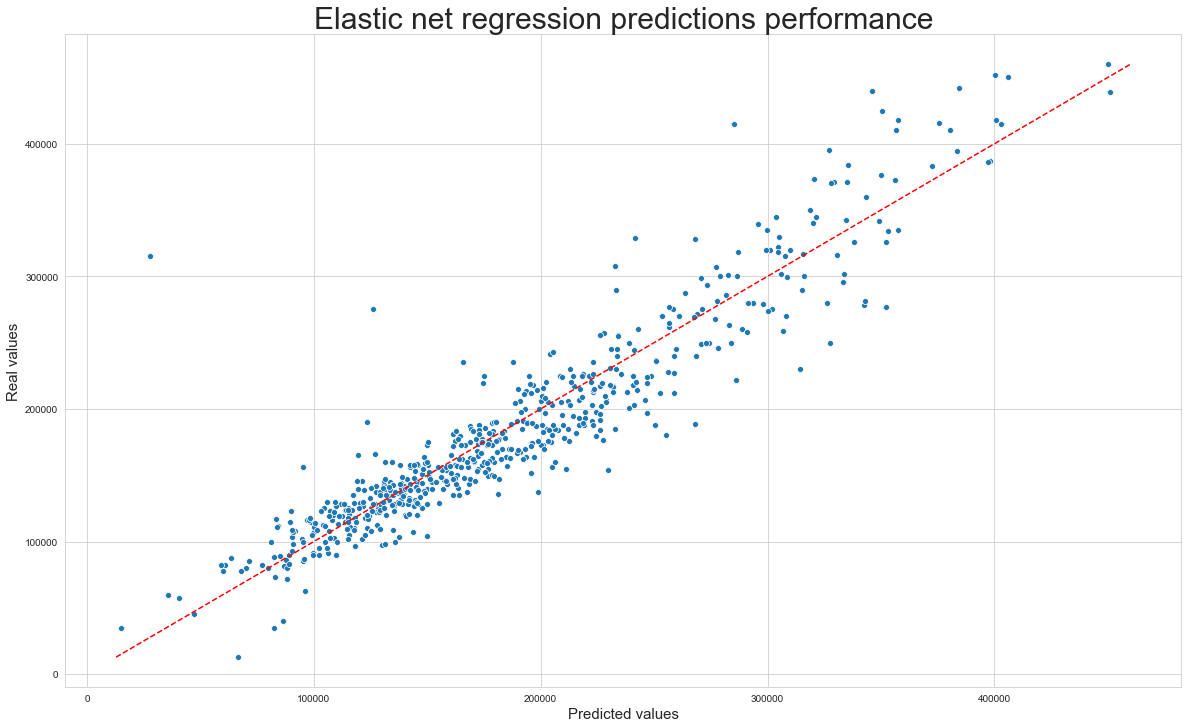

In [127]:
X = df_features.drop('saleprice',axis=1)
y = df_features['saleprice']
enet_reg(X,y)

The elastic net model went with a full lasso regression and hence produced the same result as the earlier model. 

## Cleaning `test.csv`

In [128]:
test = pd.read_csv('datasets/test.csv')

### Null values

Check the columns with missing values.

In [129]:
test.columns[test.isnull().sum()>0]

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Electrical', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')

In [130]:
test[['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Electrical', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature']].isnull().sum()

Lot Frontage      160
Alley             821
Mas Vnr Type        1
Mas Vnr Area        1
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 1     25
BsmtFin Type 2     25
Electrical          1
Fireplace Qu      422
Garage Type        44
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Pool QC           875
Fence             707
Misc Feature      838
dtype: int64

In [131]:
percent_null(test)

Lot Frontage
Number of Null Values: 160
Percentage of Nulls = 7.8%


Alley
Number of Null Values: 821
Percentage of Nulls = 40.03%


Mas Vnr Type
Number of Null Values: 1
Percentage of Nulls = 0.05%


Mas Vnr Area
Number of Null Values: 1
Percentage of Nulls = 0.05%


Bsmt Qual
Number of Null Values: 25
Percentage of Nulls = 1.22%


Bsmt Cond
Number of Null Values: 25
Percentage of Nulls = 1.22%


Bsmt Exposure
Number of Null Values: 25
Percentage of Nulls = 1.22%


BsmtFin Type 1
Number of Null Values: 25
Percentage of Nulls = 1.22%


BsmtFin Type 2
Number of Null Values: 25
Percentage of Nulls = 1.22%


Electrical
Number of Null Values: 1
Percentage of Nulls = 0.05%


Fireplace Qu
Number of Null Values: 422
Percentage of Nulls = 20.58%


Garage Type
Number of Null Values: 44
Percentage of Nulls = 2.15%


Garage Yr Blt
Number of Null Values: 45
Percentage of Nulls = 2.19%


Garage Finish
Number of Null Values: 45
Percentage of Nulls = 2.19%


Garage Qual
Number of Null Values: 45
Perc

#### Investigate null values for veneer type

In [132]:
test[test['Mas Vnr Type'].isnull()][['Mas Vnr Type','Mas Vnr Area']]

Mas Vnr Type  Mas Vnr Area
866          NaN           NaN

In [133]:
test['Mas Vnr Type'] = test['Mas Vnr Type'].fillna('None')
test['Mas Vnr Area'] = test['Mas Vnr Area'].fillna(0)

#### Investigate null values for basement columns

In [134]:
test[test['Bsmt Qual'].isnull()][['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin SF 1','BsmtFin Type 2','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
15        NaN       NaN           NaN            NaN             0   
37        NaN       NaN           NaN            NaN             0   
77        NaN       NaN           NaN            NaN             0   
79        NaN       NaN           NaN            NaN             0   
113       NaN       NaN           NaN            NaN             0   
145       NaN       NaN           NaN            NaN             0   
190       NaN       NaN           NaN            NaN             0   
206       NaN       NaN           NaN            NaN             0   
279       NaN       NaN           NaN            NaN             0   
292       NaN       NaN           NaN            NaN             0   
294       NaN       NaN           NaN            NaN             0   
315       NaN       NaN           NaN            NaN             0   
321       NaN       NaN           NaN            NaN             0   
414       NaN       NaN           NaN            NaN             0   
431       NaN       NaN           NaN            NaN             0   
481       NaN       NaN           NaN            NaN             0   
528       NaN       NaN           NaN            NaN             0   
553       NaN       NaN           NaN            NaN             0   
614       NaN       NaN           NaN            NaN             0   
619       NaN       NaN           NaN            NaN             0   
622       NaN       NaN           NaN            NaN             0   
626       NaN       NaN           NaN            NaN             0   
655       NaN       NaN           NaN            NaN             0   
703       NaN       NaN           NaN            NaN             0   
772       NaN       NaN           NaN            NaN             0   

    BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Bsmt Full Bath  \
15             NaN             0            0              0               0   
37             NaN             0            0              0               0   
77             NaN             0            0              0               0   
79             NaN             0            0              0               0   
113            NaN             0            0              0               0   
145            NaN             0            0              0               0   
190            NaN             0            0              0               0   
206            NaN             0            0              0               0   
279            NaN             0            0              0               0   
292            NaN             0            0              0               0   
294            NaN             0            0              0               0   
315            NaN             0            0              0               0   
321            NaN             0            0              0               0   
414            NaN             0            0              0               0   
431            NaN             0            0              0               0   
481            NaN             0            0              0               0   
528            NaN             0            0              0               0   
553            NaN             0            0              0               0   
614            NaN             0            0              0               0   
619            NaN             0            0              0               0   
622            NaN             0            0              0               0   
626            NaN             0            0              0               0   
655            NaN             0            0              0               0   
703            NaN             0            0              0               0   
772            NaN             0            0              0               0   

     Bsmt Half Bath  
15                0  
37                0  
77                0  
79            

Null values come from houses with no basements. Fill in appropriate values. 

In [135]:
base_cols = ['Bsmt Qual','Bsmt Cond','BsmtFin Type 1','BsmtFin Type 2','Bsmt Exposure']

for col in base_cols:
    test[col] = test[col].fillna('NA')

#### Investigate null value for electrical

In [136]:
test[test['Electrical'].isnull()]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
635  1578  916386080           80        RL          73.0      9735   Pave   

    Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
635   NaN       Reg          Lvl    AllPub     Inside        Gtl       Timber   

    Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
635        Norm        Norm      1Fam        SLvl             5             5   

     Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
635        2006            2007      Gable   CompShg      VinylSd   

    Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
635      VinylSd         None           0.0         TA         TA      PConc   

    Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
635        Gd        TA            No            Unf             0   

    BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
635            Unf             0          384            384    GasA   

    Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
635         Gd           Y        NaN         754         640   

     Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
635                0         1394               0               0          2   

     Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
635          1              3              1           Gd              7   

    Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
635        Typ           0          NaN     BuiltIn         2007.0   

    Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
635           Fin            2          400          TA          TA   

    Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
635           Y           100              0               0           0   

     Screen Porch  Pool Area Pool QC Fence Misc Feature  Misc Val  Mo Sold  \
635             0          0     NaN   NaN          NaN         0        5   

     Yr Sold Sale Type  
635     2008       WD

Fill the null with the most common value of the column.

In [137]:
test['Electrical'].value_counts()

SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

In [138]:
test['Electrical'] = test['Electrical'].fillna('SBrkr')

#### Investigate null values for fireplace quality

In [139]:
test[test['Fireplaces']==0].index 

Int64Index([  0,   1,   3,   5,   6,   7,   8,  10,  11,  17,
            ...
            858, 859, 860, 862, 863, 866, 869, 870, 873, 877],
           dtype='int64', length=422)

In [140]:
test[test['Fireplace Qu'].isnull()].index 

Int64Index([  0,   1,   3,   5,   6,   7,   8,  10,  11,  17,
            ...
            858, 859, 860, 862, 863, 866, 869, 870, 873, 877],
           dtype='int64', length=422)

In [141]:
(test[test['Fireplaces']==0].index == test[test['Fireplace Qu'].isnull()].index ).sum()

422

The above shows that columns with null fireplace quality have 0 fireplaces. 

In [142]:
test['Fireplace Qu'] = test['Fireplace Qu'].fillna('NA')

#### Investigate null values for garage columns

Drop the garage year built column, just as we did in `train.csv`.

In [143]:
test = test.drop(['Garage Yr Blt'],axis=1)

In [144]:
test[test['Garage Finish'].isnull() & (test['Garage Cars']>0)][['Garage Type','Garage Finish','Garage Cars','Garage Area','Garage Qual','Garage Cond']]

Garage Type Garage Finish  Garage Cars  Garage Area Garage Qual  \
765      Detchd           NaN            1          360         NaN   

    Garage Cond  
765         NaN

This is the only row with null values for garage columns and a non-zero value for garage cars and area.

In [145]:
garage_cols = ['Garage Finish','Garage Qual','Garage Cond']

for col in garage_cols:
    print(test[test['Garage Type'] == 'Detchd'][col].value_counts())

Unf    223
Fin     12
RFn     10
Name: Garage Finish, dtype: int64
TA    203
Fa     37
Po      3
Gd      2
Name: Garage Qual, dtype: int64
TA    212
Fa     24
Po      6
Gd      2
Ex      1
Name: Garage Cond, dtype: int64


For row 765, we will fill the garage year built with the year the house was built, and other null values with the most common values in the column.

In [146]:
test['Garage Finish'].iloc[765] = 'Unf'
test['Garage Qual'].iloc[765] = 'TA'
test['Garage Cond'].iloc[765] = 'TA'

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [147]:
test[test['Garage Type'].isnull()][['Garage Type','Garage Finish','Garage Cars','Garage Area','Garage Qual','Garage Cond']]

Garage Type Garage Finish  Garage Cars  Garage Area Garage Qual  \
29          NaN           NaN            0            0         NaN   
45          NaN           NaN            0            0         NaN   
66          NaN           NaN            0            0         NaN   
68          NaN           NaN            0            0         NaN   
106         NaN           NaN            0            0         NaN   
110         NaN           NaN            0            0         NaN   
114         NaN           NaN            0            0         NaN   
145         NaN           NaN            0            0         NaN   
153         NaN           NaN            0            0         NaN   
157         NaN           NaN            0            0         NaN   
181         NaN           NaN            0            0         NaN   
219         NaN           NaN            0            0         NaN   
231         NaN           NaN            0            0         NaN   
232         NaN           NaN            0            0         NaN   
257         NaN           NaN            0            0         NaN   
283         NaN           NaN            0            0         NaN   
306         NaN           NaN            0            0         NaN   
315         NaN           NaN            0            0         NaN   
321         NaN           NaN            0            0         NaN   
338         NaN           NaN            0            0         NaN   
342         NaN           NaN            0            0         NaN   
351         NaN           NaN            0            0         NaN   
360         NaN           NaN            0            0         NaN   
396         NaN           NaN            0            0         NaN   
483         NaN           NaN            0            0         NaN   
497         NaN           NaN            0            0         NaN   
528         NaN           NaN            0            0         NaN   
530         NaN           NaN            0            0         NaN   
537         NaN           NaN            0            0         NaN   
556         NaN           NaN            0            0         NaN   
567         NaN           NaN            0            0         NaN   
592         NaN           NaN            0            0         NaN   
597         NaN           NaN            0            0         NaN   
611         NaN           NaN            0            0         NaN   
616         NaN           NaN            0            0         NaN   
619         NaN           NaN            0            0         NaN   
630         NaN           NaN            0            0         NaN   
675         NaN           NaN            0            0         NaN   
699         NaN           NaN            0            0         NaN   
712         NaN           NaN            0            0         NaN   
780         NaN           NaN            0            0         NaN   
804         NaN           NaN            0            0         NaN   
814         NaN           NaN            0            0         NaN   
860         NaN           NaN            0            0         NaN   

    Garage Cond  
29          NaN  
45          NaN  
66          NaN  
68          NaN  
106         NaN  
110         NaN  
114         NaN  
145         NaN  
153         NaN  
157         NaN  
181         NaN  
219         NaN  
231         NaN  
232         NaN  
257         NaN  
283         NaN  
306         NaN  
315         NaN  
321         NaN  
338         NaN  
342         NaN  
351         NaN  
360         NaN  
396         NaN  
483         NaN  
497         NaN  
528         NaN  
530         NaN  
537         NaN  
556         NaN  
567         NaN  
592         NaN  
597         NaN  
611         NaN  
616         NaN  
619         NaN  
630         NaN  
675         NaN  
699         NaN  
712         NaN  
780         NaN  
804         NaN  
814         NaN  
860         NaN

The rest of the null values for the garage columns are for houses with no garages.

In [148]:
grg_cols = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']

for col in grg_cols:
    test[col] = test[col].fillna('NA')

For garage year built, that column will be disregarded as before because it is mostly matched year the house was built.

#### Investigate pool quality null values

In [149]:
test[test['Pool Area']==0].index 

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            869, 870, 871, 872, 873, 874, 875, 876, 877, 878],
           dtype='int64', length=875)

In [150]:
test[test['Pool QC'].isnull()].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            869, 870, 871, 872, 873, 874, 875, 876, 877, 878],
           dtype='int64', length=875)

In [151]:
(test[test['Pool Area']==0].index == test[test['Pool QC'].isnull()].index).sum()

875

The above shows the null values for pool quality come from houses with no pool. 

In [152]:
test['Pool QC'] = test['Pool QC'].fillna('NA')

#### Investigate null values for lot frontage

Similar to before, we will fill nulls with median lot frontage after grouping by neighborhood.

In [153]:
test['Lot Frontage'] = test.groupby('Neighborhood')['Lot Frontage'].apply(lambda hood: hood.fillna(hood.median()))

#### Drop alley, fence, and misc. features

In [154]:
test = test.drop(['Alley','Fence','Misc Feature'],axis=1)
test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL          75.0      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL          74.5      9500   Pave   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   
2        Gd            Av            GLQ           554            Unf   
3        TA            No            Unf             0            Unf   
4        TA            No            BLQ           609            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   
2             0          100            654    GasA         Ex           Y   
3             0          968            968    GasA         TA           Y   
4             0          785           1394    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0          1          0              2   
4  

#### Rechecking null values

In [155]:
test.columns[test.isnull().sum()>0]

Index([], dtype='object')

### Renaming columns

In [156]:
new_test_column_names = {column:column.lower().replace(' ','_') for column in test.columns}

In [157]:
test.rename(columns=new_test_column_names,inplace=True)

### Changing ordinal values

In [158]:
ord_converter(ord_columns,ord_values,test)

In [159]:
test.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL          75.0      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL          74.5      9500   Pave   

   lot_shape land_contour utilities lot_config  land_slope neighborhood  \
0          4          Lvl         4     Inside           3      OldTown   
1          3          Lvl         4     Inside           3       Sawyer   
2          3          Lvl         4     Inside           3      Gilbert   
3          4          Lvl         4     Inside           3      OldTown   
4          3          Lvl         4     Inside           3        NAmes   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual  exter_cond foundation  bsmt_qual  \
0         None           0.0          3           2      Stone          2   
1         None           0.0          3           3     CBlock          4   
2         None           0.0          4           3      PConc          4   
3         None           0.0          4           3     CBlock          3   
4      BrkFace         247.0          3           3     CBlock          4   

   bsmt_cond  bsmt_exposure  bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  \
0          3              1               1             0               1   
1          3              1               1             0               1   
2          4              3               6           554               1   
3          3              1               1             0               1   
4          3              1               4           609               1   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0             0         1020           1020    GasA          4           N   
1             0         1967           1967    GasA          3           Y   
2             0          100            654    GasA          5           Y   
3             0          968            968    GasA          3           Y   
4             0          785           1394    GasA          4           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0          2         908        1020                0         1928   
1          5        1967           0                0         1967   
2          5         664         832                0         1496   
3          5         968           0                0          968   
4          5        1394           0                0         1394   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0            

In [160]:
test[['lot_shape', 'utilities',
       'land_slope', 'exter_qual',
       'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc',
       'electrical', 'kitchen_qual',
       'functional', 'fireplace_qu',
       'garage_finish',
       'garage_qual', 'garage_cond', 'paved_drive',
       'pool_qc']].dtypes

lot_shape          int64
utilities         object
land_slope         int64
exter_qual        object
exter_cond         int64
bsmt_qual          int64
bsmt_cond          int64
bsmt_exposure      int64
bsmtfin_type_1     int64
bsmtfin_type_2     int64
heating_qc        object
electrical        object
kitchen_qual       int64
functional        object
fireplace_qu       int64
garage_finish      int64
garage_qual        int64
garage_cond        int64
paved_drive        int64
pool_qc            int64
dtype: object

In [161]:
for col in ['utilities','exter_qual','heating_qc','electrical','functional']:
    test[col] = test[col].astype(int)

In [162]:
test[['lot_shape', 'utilities',
       'land_slope', 'exter_qual',
       'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc',
       'electrical', 'kitchen_qual',
       'functional', 'fireplace_qu',
       'garage_finish',
       'garage_qual', 'garage_cond', 'paved_drive',
       'pool_qc']].dtypes

lot_shape         int64
utilities         int64
land_slope        int64
exter_qual        int64
exter_cond        int64
bsmt_qual         int64
bsmt_cond         int64
bsmt_exposure     int64
bsmtfin_type_1    int64
bsmtfin_type_2    int64
heating_qc        int64
electrical        int64
kitchen_qual      int64
functional        int64
fireplace_qu      int64
garage_finish     int64
garage_qual       int64
garage_cond       int64
paved_drive       int64
pool_qc           int64
dtype: object

### Converting nominal variables

#### Correct the type of ms subclass

In [163]:
test['ms_subclass'] = test['ms_subclass'].astype(object)
test['ms_subclass'].dtypes

dtype('O')

#### Combine `train.csv` and `test.csv`.

To prevent issues with dummy variables, it is best to combine the two dataframes, get dummies and then split the dataframes again. 

In [164]:
print(train.shape)
print(test.shape)

(2051, 77)
(879, 76)


Add a pseudo `saleprice` column to test dataframe.

In [165]:
test['saleprice'] = 0

In [166]:
test.head()

id        pid ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  2658  902301120         190        RM          69.0      9142   Pave   
1  2718  905108090          90        RL          75.0      9662   Pave   
2  2414  528218130          60        RL          58.0     17104   Pave   
3  1989  902207150          30        RM          60.0      8520   Pave   
4   625  535105100          20        RL          74.5      9500   Pave   

   lot_shape land_contour  utilities lot_config  land_slope neighborhood  \
0          4          Lvl          4     Inside           3      OldTown   
1          3          Lvl          4     Inside           3       Sawyer   
2          3          Lvl          4     Inside           3      Gilbert   
3          4          Lvl          4     Inside           3      OldTown   
4          3          Lvl          4     Inside           3        NAmes   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  mas_vnr_type  mas_vnr_area  exter_qual  exter_cond foundation  bsmt_qual  \
0         None           0.0           3           2      Stone          2   
1         None           0.0           3           3     CBlock          4   
2         None           0.0           4           3      PConc          4   
3         None           0.0           4           3     CBlock          3   
4      BrkFace         247.0           3           3     CBlock          4   

   bsmt_cond  bsmt_exposure  bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  \
0          3              1               1             0               1   
1          3              1               1             0               1   
2          4              3               6           554               1   
3          3              1               1             0               1   
4          3              1               4           609               1   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  heating_qc central_air  \
0             0         1020           1020    GasA           4           N   
1             0         1967           1967    GasA           3           Y   
2             0          100            654    GasA           5           Y   
3             0          968            968    GasA           3           Y   
4             0          785           1394    GasA           4           Y   

   electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0           2         908        1020                0         1928   
1           5        1967           0                0         1967   
2           5         664         832                0         1496   
3           5         968           0                0          968   
4           5        1394           0                0         1394   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3          

In [167]:
full = pd.concat([train,test])

In [168]:
cat_features = test.select_dtypes(include=['object']).columns
cat_features

Index(['ms_subclass', 'ms_zoning', 'street', 'land_contour', 'lot_config',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'foundation', 'heating', 'central_air',
       'garage_type', 'sale_type'],
      dtype='object')

In [169]:
dummies_full = pd.get_dummies(full[full.select_dtypes(include=['object']).columns],drop_first=True)
dummies_full.head()

ms_subclass_30  ms_subclass_40  ms_subclass_45  ms_subclass_50  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               1   

   ms_subclass_60  ms_subclass_70  ms_subclass_75  ms_subclass_80  \
0               1               0               0               0   
1               1               0               0               0   
2               0               0               0               0   
3               1               0               0               0   
4               0               0               0               0   

   ms_subclass_85  ms_subclass_90  ms_subclass_120  ms_subclass_150  \
0               0               0                0                0   
1               0               0                0                0   
2               0               0                0                0   
3               0               0                0                0   
4               0               0                0                0   

   ms_subclass_160  ms_subclass_180  ms_subclass_190  ms_zoning_C (all)  \
0                0                0                0                  0   
1                0                0                0                  0   
2                0                0                0                  0   
3                0                0                0                  0   
4                0                0                0                  0   

   ms_zoning_FV  ms_zoning_I (all)  ms_zoning_RH  ms_zoning_RL  ms_zoning_RM  \
0             0                  0             0             1             0   
1             0                  0             0             1             0   
2             0                  0             0             1             0   
3             0                  0             0             1             0   
4             0                  0             0             1             0   

   street_Pave  land_contour_HLS  land_contour_Low  land_contour_Lvl  \
0            1                 0                 0                 1   
1            1                 0                 0                 1   
2            1                 0                 0                 1   
3            1                 0                 0                 1   
4            1                 0                 0                 1   

   lot_config_CulDSac  lot_config_FR2  lot_config_FR3  lot_config_Inside  \
0                   1               0               0                  0   
1                   1               0               0                  0   
2                   0               0               0                  1   
3                   0               0               0                  1   
4                   0               0               0                  1   

   neighborhood_Blueste  neighborhood_BrDale  neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   neighborhood_ClearCr  neighborhood_CollgCr  neighborhood_Crawfor  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   neighborhood_Edwards  neighborhood_Gilbert  neighborhood_Greens  \
0     

In [170]:
dummies_full.shape

(2930, 155)

In [171]:
dummies_train = dummies_full.iloc[0:2051,:]
dummies_test = dummies_full.iloc[2051:,:]

In [172]:
print(dummies_train.shape)
print(dummies_test.shape)

(2051, 155)
(879, 155)


In [173]:
df_features = numeric_scaled.join(dummies_train)
df_features = df_features.join(train[['saleprice']])
df_features.shape

(2051, 210)

### Combining the test variables

Drop pseudo `saleprice` column that was added to test dataframe earlier for creating dummies.

In [174]:
test.drop('saleprice',axis=1,inplace=True)

In [175]:
numeric_test = test[test.corr().drop(['id', 'pid']).index]
numeric_test.shape

(879, 54)

#### Scale data

In [176]:
scaler = StandardScaler()
numeric_test_scaled = scaler.fit_transform(numeric_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [177]:
numeric_test_scaled = pd.DataFrame(numeric_test_scaled,columns=numeric_test.columns)

In [178]:
df_test_features = numeric_test_scaled.join(dummies_test)
df_test_features.shape

(879, 209)

## 1st Round of Testing on Test Data

### Running on whole test dataset

#### Ridge regression

In [179]:
def ridge_reg(X,y):
    ridge_alphas = np.logspace(0, 5, 200)
    ridge = RidgeCV(alphas=ridge_alphas, cv=10)
    ridge.fit(X, y)
    print('Optimal alpha: ', ridge.alpha_)
    opt_ridge = Ridge(alpha=ridge.alpha_)
    opt_ridge_scores = cross_val_score(opt_ridge, X, y, cv=10)
    print('Ridge regression cross validation scores: ', opt_ridge_scores)
    print('Ridge regression cross validation mean score: ', np.mean(opt_ridge_scores))
    print('Ridge regression cross validation scores standard deviation: ', np.std(opt_ridge_scores))
    opt_ridge.fit(X, y)
    opt_ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':opt_ridge.coef_,
                            'abs_coef':np.abs(opt_ridge.coef_)})
    opt_ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.set(style='whitegrid',rc={"figure.figsize": (14, 34)})
    sns.barplot(y='variable',x='coef', data=opt_ridge_coefs, palette='GnBu_d')

Optimal alpha:  3.78346261713193
Ridge regression cross validation scores:  [0.87205461 0.83787219 0.90007481 0.91140561 0.64088011 0.8928494
 0.8994012  0.89584816 0.8792157  0.71883286]
Ridge regression cross validation mean score:  0.8448434662922661
Ridge regression cross validation scores standard deviation:  0.08649499108701321


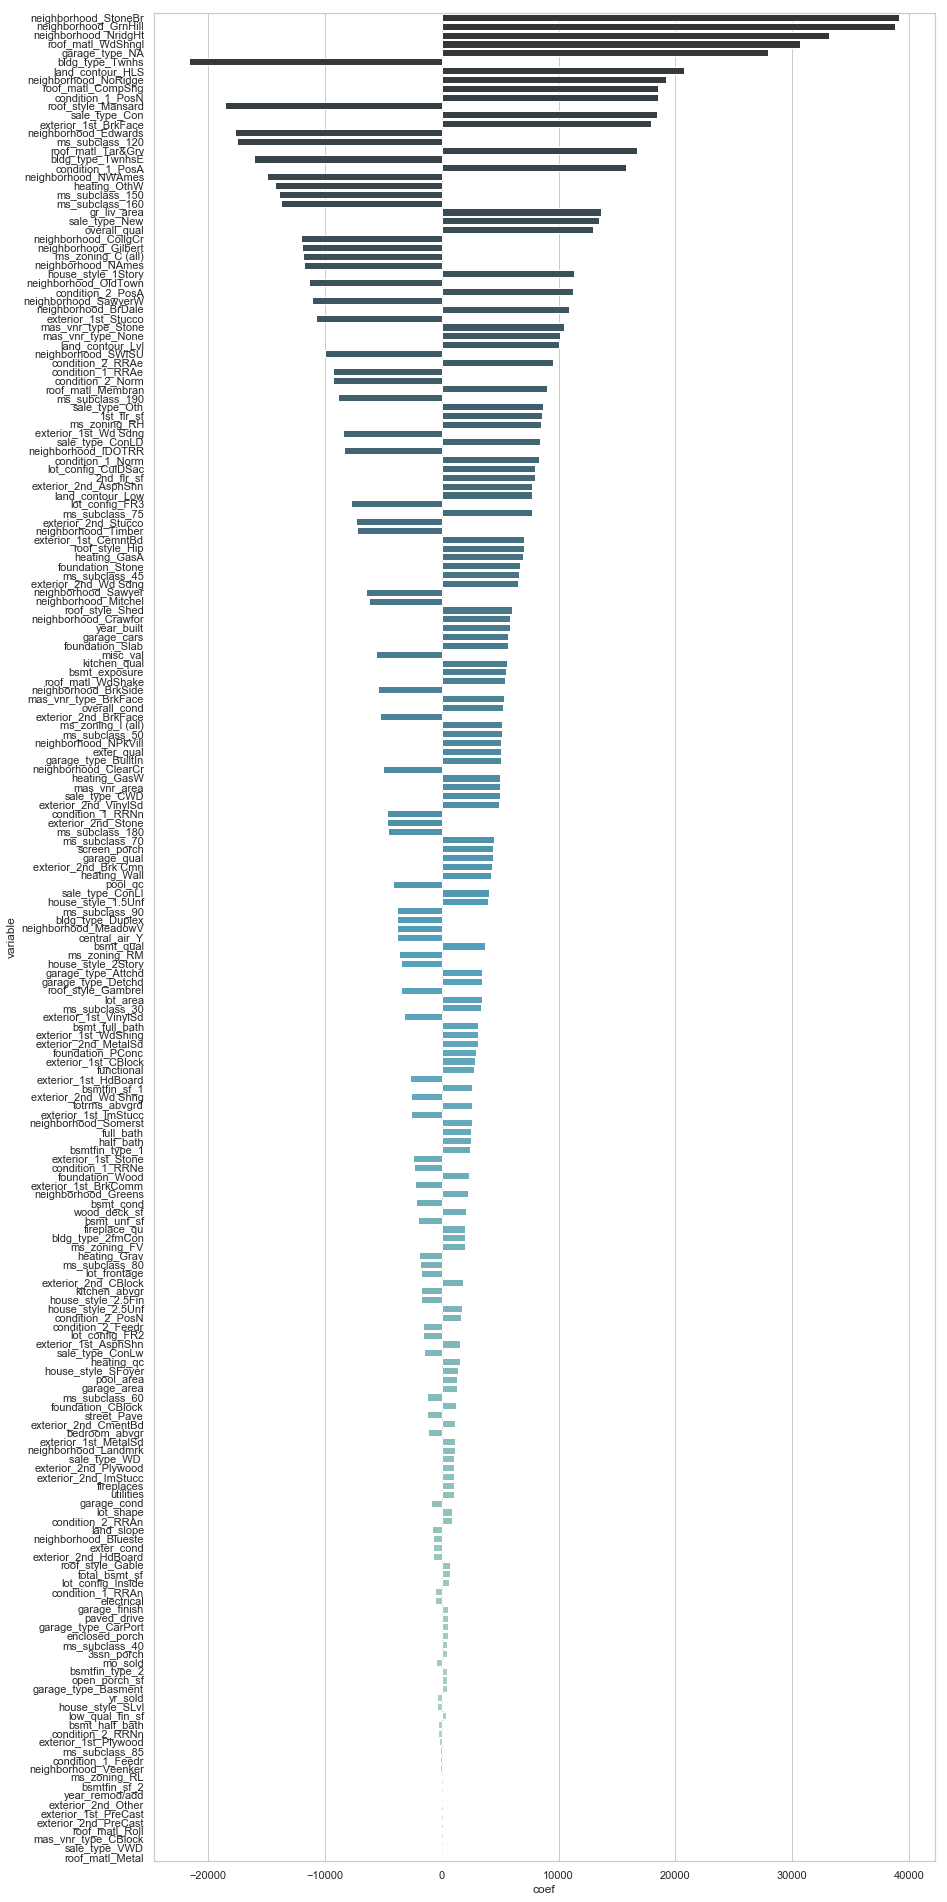

In [180]:
X = df_features.drop('saleprice',axis=1)
y = df_features['saleprice']

ridge_reg(X,y)

In [181]:
def ridge_test(X,y,test_data):
    ridge_alphas = np.logspace(0, 5, 200)
    ridge = RidgeCV(alphas=ridge_alphas, cv=10)
    ridge.fit(X, y)
    print('Optimal alpha: ', ridge.alpha_)
    opt_ridge = Ridge(alpha=ridge.alpha_)
    opt_ridge.fit(X,y)
    predictions = opt_ridge.predict(test_data)
    result = test[['id']].join(pd.DataFrame(predictions,columns=['SalePrice'])) 
    return result

In [182]:
X = df_features.drop('saleprice',axis=1)
y = df_features['saleprice']

result = ridge_test(X,y,df_test_features)

Optimal alpha:  3.78346261713193


In [183]:
result.to_csv(r'datasets/zl_sub_1.csv',index=False) 

#### RMSE from Kaggle = 30414.16218

The RMSE is higher than when testing on holdout data.

#### Lasso regression

In [184]:
def lasso_reg(X,y):
    lasso = LassoCV(n_alphas=500, cv=10)
    lasso.fit(X, y)
    print('Optimal alpha: ', lasso.alpha_)
    opt_lasso = Lasso(alpha=lasso.alpha_)
    opt_lasso_scores = cross_val_score(opt_lasso, X, y, cv=10)
    print('Lasso regression cross validation scores: ', opt_lasso_scores)
    print('Lasso regression cross validation mean score: ', np.mean(opt_lasso_scores))
    print('Lasso regression cross validation scores standard deviation: ', np.std(opt_lasso_scores))
    opt_lasso.fit(X, y)
    opt_lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':opt_lasso.coef_,
                            'abs_coef':np.abs(opt_lasso.coef_)})
    opt_lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    print('Percent variables zeroed out: ', np.sum((opt_lasso.coef_ == 0))/float(X.shape[1]))
    sns.set(style='whitegrid',rc={"figure.figsize": (14, 34)})
    sns.barplot(y='variable',x='coef', data=opt_lasso_coefs, palette='GnBu_d')

Optimal alpha:  63.40786029459315
Lasso regression cross validation scores:  [0.87259467 0.84600509 0.8938258  0.91061594 0.65151355 0.89299031
 0.90386031 0.89596539 0.88044928 0.72645432]
Lasso regression cross validation mean score:  0.8474274655317163
Lasso regression cross validation scores standard deviation:  0.08276761101802657
Percent variables zeroed out:  0.4449760765550239


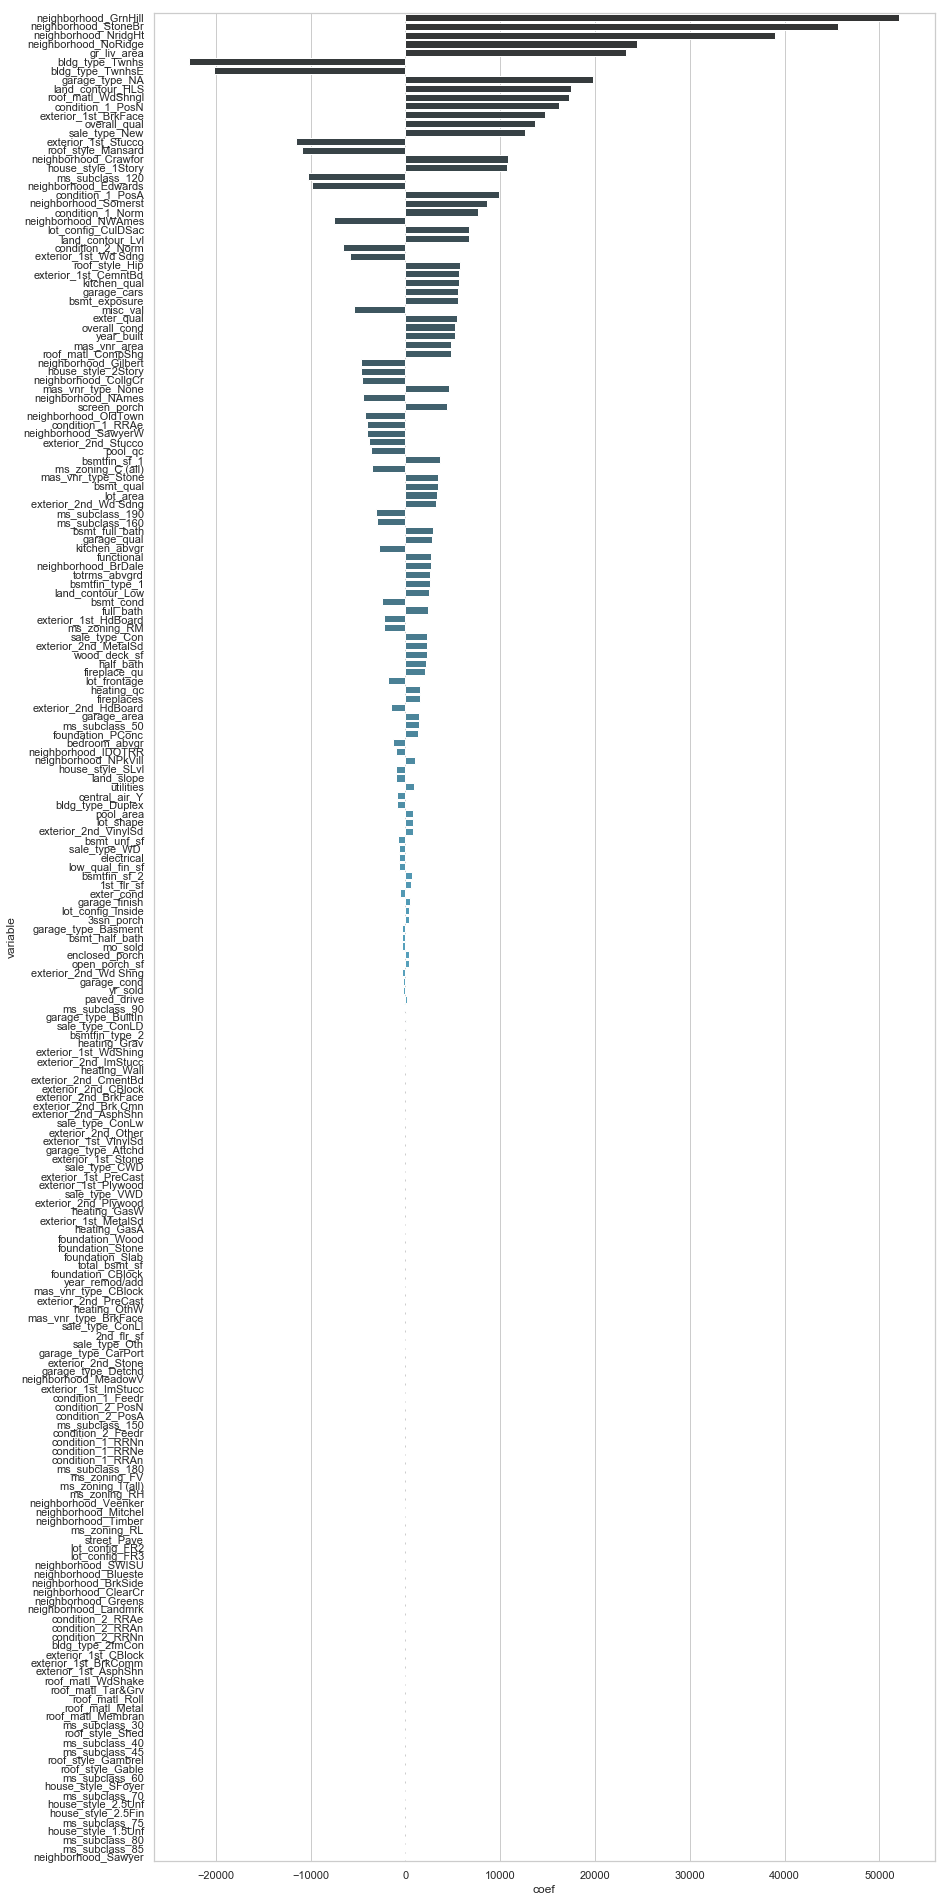

In [185]:
X = df_features.drop('saleprice',axis=1)
y = df_features['saleprice']

lasso_reg(X,y)

In [186]:
def lasso_test(X,y,test_data):
    lasso = LassoCV(n_alphas=500, cv=10)
    lasso.fit(X, y)
    print('Optimal alpha: ', lasso.alpha_)
    opt_lasso = Lasso(alpha=lasso.alpha_)
    opt_lasso.fit(X,y)
    predictions = opt_lasso.predict(test_data)
    result = test[['id']].join(pd.DataFrame(predictions,columns=['SalePrice']))
    return result

In [187]:
X = df_features.drop('saleprice',axis=1)
y = df_features['saleprice']

result = lasso_test(X,y,df_test_features)

Optimal alpha:  63.40786029459315


In [188]:
result.to_csv(r'datasets/zl_sub_2.csv',index=False)  

#### RMSE from Kaggle = 30324.98850

We get a similar performance to ridge regression.

#### Elastic net regression

In [189]:
def enet_reg(X,y):
    l1_ratios = np.linspace(0.01, 1.0, 25)
    enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10)
    enet.fit(X, y)
    print('Optimal alpha: ', enet.alpha_)
    print('Optimal l1 ratio: ', enet.l1_ratio_)
    opt_enet = ElasticNet(alpha=enet.alpha_, l1_ratio=enet.l1_ratio_)
    opt_enet_scores = cross_val_score(opt_enet, X, y, cv=10)
    print('ElasticNet regression cross validation scores: ', opt_enet_scores)
    print('ElasticNet regression cross validation mean score: ', np.mean(opt_enet_scores))
    print('ElasticNet regression cross validation scores standard deviation: ', np.std(opt_enet_scores))
    opt_enet.fit(X,y)
    opt_enet_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':opt_enet.coef_,
                            'abs_coef':np.abs(opt_enet.coef_)})
    opt_enet_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.set(style='whitegrid',rc={"figure.figsize": (14, 34)})
    sns.barplot(y='variable',x='coef', data=opt_enet_coefs, palette='GnBu_d')

Optimal alpha:  63.40786029459315
Optimal l1 ratio:  1.0
ElasticNet regression cross validation scores:  [0.87259467 0.84600509 0.8938258  0.91061594 0.65151355 0.89299031
 0.90386031 0.89596539 0.88044928 0.72645432]
ElasticNet regression cross validation mean score:  0.8474274655317163
ElasticNet regression cross validation scores standard deviation:  0.08276761101802657


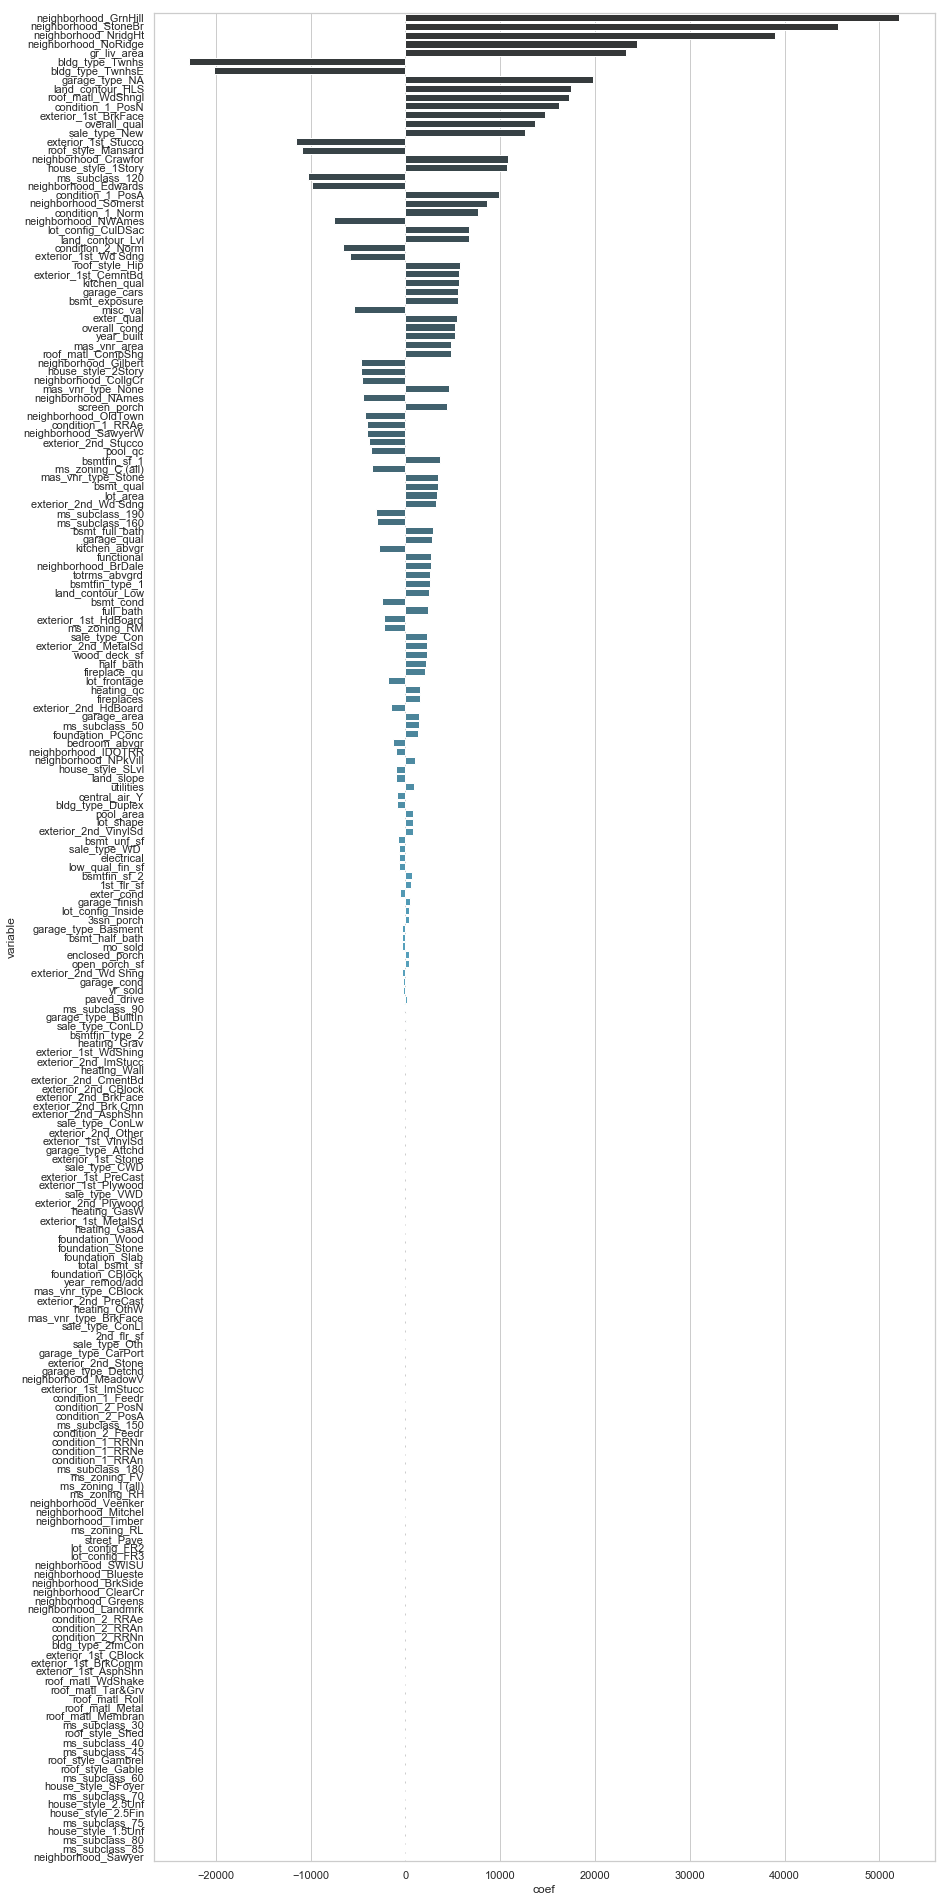

In [190]:
X = df_features.drop('saleprice',axis=1)
y = df_features['saleprice']

enet_reg(X,y)

In [191]:
def enet_test(X,y,test_data):
    l1_ratios = np.linspace(0.01, 1.0, 25)
    enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10)
    enet.fit(X, y)
    print('Optimal alpha: ', enet.alpha_)
    print('Optimal l1 ratio: ', enet.l1_ratio_)
    opt_enet = ElasticNet(alpha=enet.alpha_, l1_ratio=enet.l1_ratio_)
    opt_enet.fit(X,y)
    predictions = opt_enet.predict(test_data)
    result = test[['id']].join(pd.DataFrame(predictions,columns=['SalePrice']))
    return result

Since the l1 ratio is 1, it will be a full lasso regression and return the same result as the previous run.

### Further feature engineering

#### Add binary columns of whether certain features are present.

In [192]:
train['has_bsmt'] = train['total_bsmt_sf'].apply(lambda x: 1 if x > 0 else 0)
train['has_garage'] = train['garage_area'].apply(lambda x: 1 if x > 0 else 0)
train['has_pool'] = train['pool_area'].apply(lambda x: 1 if x > 0 else 0)

In [193]:
df_features = df_features.join(train[['has_bsmt','has_garage','has_pool']])

In [194]:
test['has_bsmt'] = test['total_bsmt_sf'].apply(lambda x: 1 if x > 0 else 0)
test['has_garage'] = test['garage_area'].apply(lambda x: 1 if x > 0 else 0)
test['has_pool'] = test['pool_area'].apply(lambda x: 1 if x > 0 else 0)

In [195]:
df_test_features = df_test_features.join(test[['has_bsmt','has_garage','has_pool']])

#### Interaction terms

In [196]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False,interaction_only=True)

In [197]:
col_pair = [['total_bsmt_sf','bsmt_qual'],['fireplaces','fireplace_qu'],['garage_area','garage_qual'],['pool_area','pool_qc']]

In [198]:
df_features.shape

(2051, 213)

In [199]:
poly_df_train = df_features[['saleprice']]
for pair in col_pair:
    poly_df_train = poly_df_train.join(pd.DataFrame(poly.fit_transform(df_features[pair]),
             columns=poly.get_feature_names(df_features[pair].columns)).iloc[:,-1:])

In [200]:
poly_df_train.rename(columns={column:column.lower().replace(' ','_') for column in poly_df_train.columns},inplace=True)
poly_df_train.drop('saleprice',axis=1,inplace=True)

In [201]:
df_features = df_features.join(poly_df_train)
df_features.head()

lot_frontage  lot_area  lot_shape  utilities  land_slope  overall_qual  \
0      0.037023  0.512071  -1.051963   0.029638    0.215628     -0.078644   
1     -1.208167  0.211664  -1.051963   0.029638    0.215628      0.622656   
2     -0.055214 -0.317944   0.713648   0.029638    0.215628     -0.779944   
3      0.175377 -0.039047   0.713648   0.029638    0.215628     -0.779944   
4      0.590440  0.618586  -1.051963   0.029638    0.215628     -0.078644   

   overall_cond  year_built  year_remod/add  mas_vnr_area  exter_qual  \
0      2.207728    0.142227        0.989479      1.092329    1.010273   
1     -0.509102    0.805126        0.609090      0.191491    1.010273   
2      1.302118   -0.620106        1.084576     -0.565901   -0.690934   
3     -0.509102    1.136575        1.084576     -0.565901   -0.690934   
4      2.207728   -2.376787        0.418896     -0.565901   -0.690934   

   exter_cond  bsmt_qual  bsmt_cond  bsmt_exposure  bsmtfin_type_1  \
0   -0.230243  -0.543594   0.123625      -0.585002         1.14603   
1   -0.230243   0.565771   0.123625      -0.585002         1.14603   
2    2.452869  -0.543594   0.123625      -0.585002         1.14603   
3   -0.230243   0.565771   0.123625      -0.585002        -1.20683   
4   -0.230243  -1.652959   1.872274      -0.585002        -1.20683   

   bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
0      0.197178       -0.290583     -0.290653    -0.843874      -0.739158   
1      0.422734       -0.290583     -0.290653    -0.655073      -0.321193   
2      0.626602       -0.290583     -0.290653    -0.542692      -0.001049   
3     -0.958797       -0.290583     -0.290653    -0.412330      -1.497275   
4     -0.958797       -0.290583     -0.290653     0.243976      -0.848096   

   heating_qc  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  \
0    0.873079    0.284752   -1.108838    0.997894        -0.107977   
1    0.873079    0.284752   -0.634510    2.067055        -0.107977   
2   -1.201874    0.284752   -0.271195   -0.773859        -0.107977   
3   -0.164398    0.284752   -1.060900    0.871004        -0.107977   
4   -1.201874    0.284752   -0.841397    0.668921        -0.107977   

   gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  \
0    -0.040634       -0.817494       -0.251994   0.769779   1.255611   
1     1.244529        1.096524       -0.251994   0.769779   1.255611   
2    -0.884084        1.096524       -0.251994  -1.051232  -0.740713   
3    -0.110588       -0.817494       -0.251994   0.769779   1.255611   
4    -0.108589       -0.817494       -0.251994   0.769779  -0.740713   

   bedroom_abvgr  kitchen_abvgr  kitchen_qual  totrms_abvgrd  functional  \
0       0.189383      -0.204568      0.725399      -0.279441    0.229782   
1       1.399426      -0.204568      0.725399       1.002738    0.229782   
2       0.189383      -0.204568      0.725399      -0.920531    0.229782   
3       0.189383      -0.204568     -0.777423       0.361648    0.229782   
4       0.189383      -0.204568     -0.777423      -0.279441    0.229782   

   fireplaces  fireplace_qu  garage_finish  garage_cars  garage_area  \
0   -0.925701     -0.976141       0.308137     0.293112     0.007216   
1    0.640811      0.684405       0.308137     0.293112     0.395957   
2   -0.925701     -0.976141      -0.804519    -1.013786    -1.052565   
3   -0.925701     -0.976141       1.420793     0.293112    -0.339874   
4   -0.925701     -0.976141      -0.804519     0.293112     0.048867   

   garage_qual  garage_cond  paved_drive  wood_deck_sf  open_porch_sf  \
0     0.273171     0.264923     0.310964     -0.730121      -0.053301   
1     0.273171     0.264923     0.310964     -0.730121       0.396266   
2     0.273171     0.264923     0.310964     -0.730121       0.066584   
3     0.273171     0.264923     0.310964      0.047980      -0.712665   
4     0.273171     0.264923    -3.429720     -0.730121       0.171483   

   enclosed_porch  3ssn_porch  scr

In [202]:
poly_df_test = df_test_features[['has_pool']]
for pair in col_pair:
    poly_df_test = poly_df_test.join(pd.DataFrame(poly.fit_transform(df_features[pair]),
             columns=poly.get_feature_names(df_features[pair].columns)).iloc[:,-1:])

In [203]:
poly_df_test.rename(columns={column:column.lower().replace(' ','_') for column in poly_df_test.columns},inplace=True)
poly_df_test.drop('has_pool',axis=1,inplace=True)

In [204]:
df_test_features = df_test_features.join(poly_df_test)
df_test_features.head()

lot_frontage  lot_area  lot_shape  utilities  land_slope  overall_qual  \
0     -0.041281 -0.119395   0.687749   0.033748    0.216513     -0.039744   
1      0.233439 -0.067611  -1.039483   0.033748    0.216513     -0.767560   
2     -0.544935  0.673505  -1.039483   0.033748    0.216513      0.688072   
3     -0.453361 -0.181337   0.687749   0.033748    0.216513     -0.767560   
4      0.210546 -0.083744  -1.039483   0.033748    0.216513     -0.039744   

   overall_cond  year_built  year_remod/add  mas_vnr_area  exter_qual  \
0      2.158742   -1.992138       -1.684928     -0.567876   -0.678508   
1     -1.388051    0.212808       -0.364176     -0.567876   -0.678508   
2     -0.501353    1.167188        1.054409     -0.567876    1.101815   
3      0.385345   -1.564313        1.054409     -0.567876    1.101815   
4     -0.501353   -0.247927       -1.049010      0.744718   -0.678508   

   exter_cond  bsmt_qual  bsmt_cond  bsmt_exposure  bsmtfin_type_1  \
0   -2.937136  -1.596589   0.160561      -0.590655       -1.200628   
1   -0.228067   0.601378   0.160561      -0.590655       -1.200628   
2   -0.228067   0.601378   1.902942       1.283662        1.189208   
3   -0.228067  -0.497606   0.160561      -0.590655       -1.200628   
4   -0.228067   0.601378   0.160561      -0.590655        0.233274   

   bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
0     -1.002642       -0.283841     -0.301701     1.128313      -0.039976   
1     -1.002642       -0.283841     -0.301701     3.352152       2.220060   
2      0.250104       -0.283841     -0.301701    -1.032121      -0.913443   
3     -1.002642       -0.283841     -0.301701     1.006202      -0.164075   
4      0.374474       -0.283841     -0.301701     0.576463       0.852583   

   heating_qc  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  \
0   -0.136254   -8.237365   -0.630383    1.543113         -0.08378   
1   -1.196141    0.261043    2.150564   -0.805235         -0.08378   
2    0.923633    0.261043   -1.271130    1.110281         -0.08378   
3   -1.196141    0.261043   -0.472823   -0.805235         -0.08378   
4   -0.136254    0.261043    0.645859   -0.805235         -0.08378   

   gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  \
0     0.826635       -0.831204       -0.242974   0.817846  -0.789544   
1     0.902053       -0.831204       -0.242974   0.817846  -0.789544   
2    -0.008763        1.056724       -0.242974   0.817846   1.187690   
3    -1.029804       -0.831204       -0.242974  -0.965992  -0.789544   
4    -0.206009        1.056724       -0.242974  -0.965992   1.187690   

   bedroom_abvgr  kitchen_abvgr  kitchen_qual  totrms_abvgrd  functional  \
0       1.350474       4.256360     -2.277805       1.585602    0.250557   
1       3.760761       4.256360     -0.756384       2.209760    0.250557   
2       0.145330      -0.213581      0.765038       0.337287    0.250557   
3      -1.059813      -0.213581     -0.756384      -0.911029    0.250557   
4       0.145330      -0.213581     -0.756384      -0.286871    0.250557   

   fireplaces  fireplace_qu  garage_finish  garage_cars  garage_area  \
0   -0.925183     -0.992319      -0.796061    -0.991066    -0.144789   
1   -0.925183     -0.992319       1.435957     0.340963     0.512645   
2    0.569736      1.229970       0.319948     0.340963    -0.210533   
3   -0.925183     -0.992319      -0.796061     0.340963     0.043049   
4    2.064656      1.229970       0.319948     0.340963     0.202712   

   garage_qual  garage_cond  paved_drive  wood_deck_sf  open_porch_sf  \
0    -2.602154    -2.611908     0.322303     -0.772558       0.181019   
1     0.285843     0.272347     0.322303      0.631179      -0.686412   
2     0.285843     0.272347     0.322303      0.053170      -0.339439   
3    -1.158156     0.272347    -3.381023     -0.772558      -0.686412   
4     0.285843     0.272347     0.322303     -0.772558       0.412334   

   enclosed_porch  3ssn_porch  scr

### Test model after feature engineering

#### Ridge regression

Optimal alpha:  5.672426068491979
Ridge regression cross validation scores:  [0.87535079 0.83788326 0.89554767 0.90428286 0.50473217 0.90893074
 0.90019584 0.89866172 0.88154017 0.7039643 ]
Ridge regression cross validation mean score:  0.8311089524372435
Ridge regression cross validation scores standard deviation:  0.12334240071979015


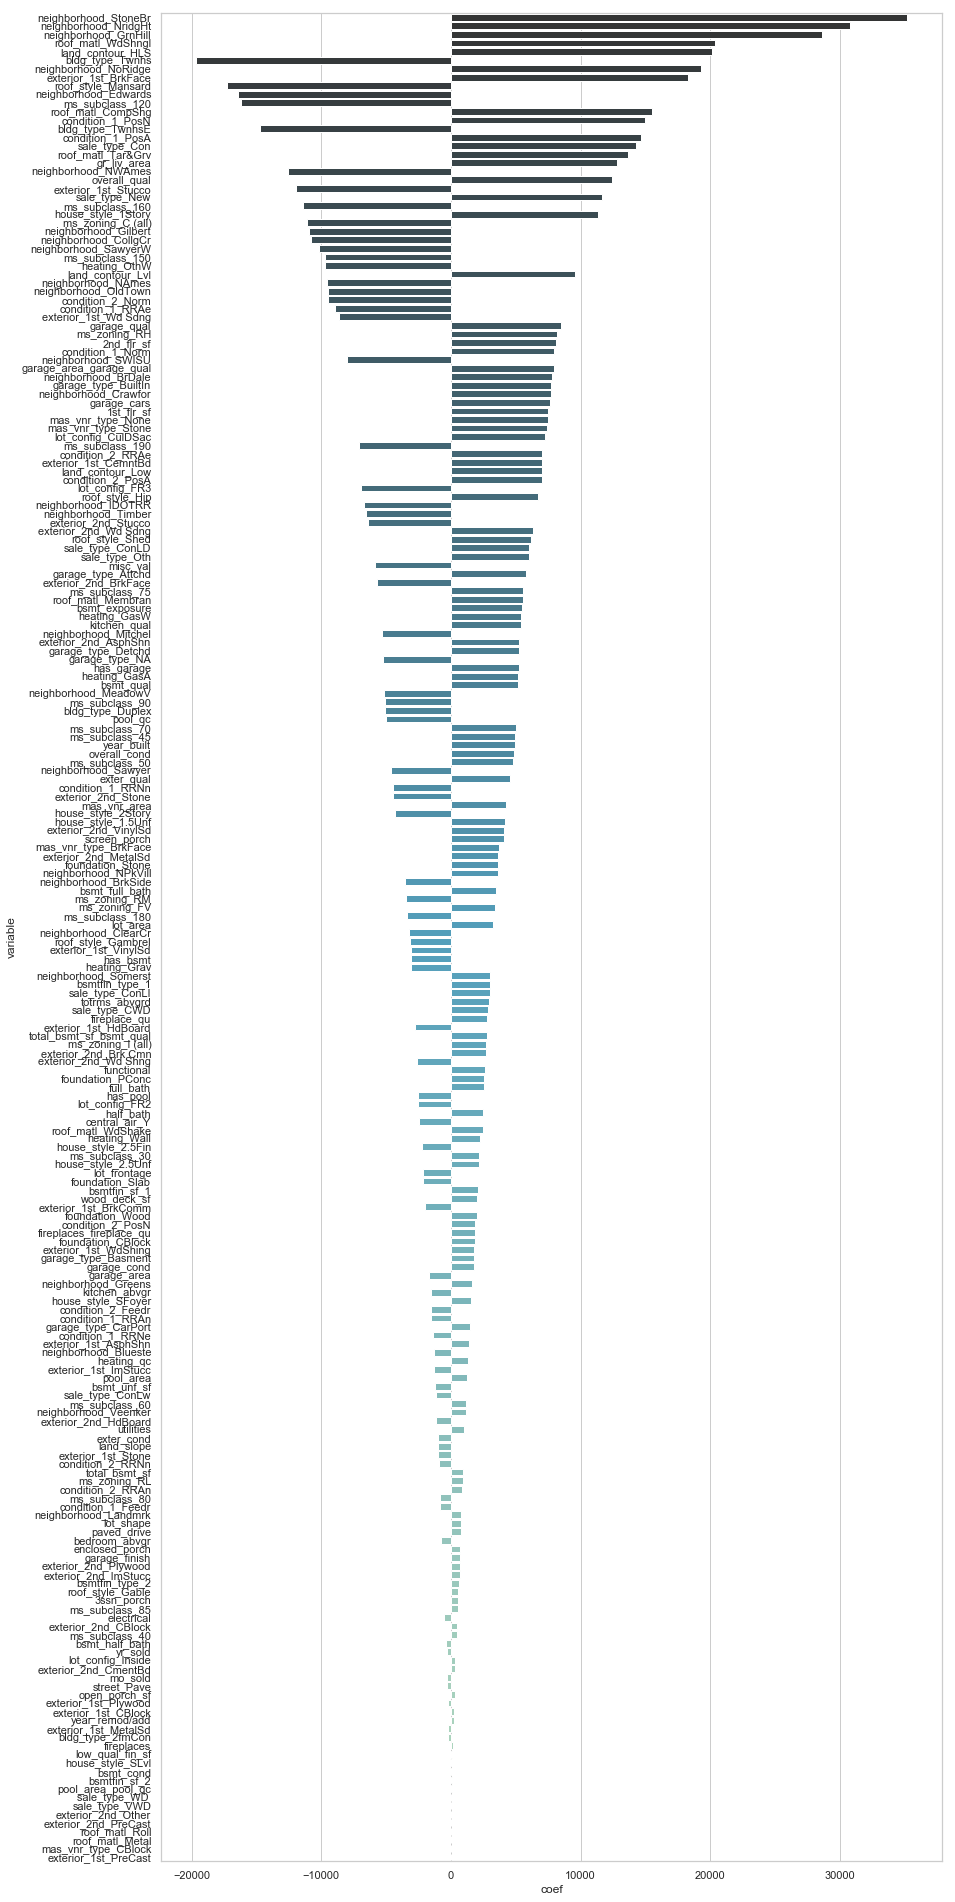

In [205]:
X = df_features.drop('saleprice',axis=1)
y = df_features['saleprice']

ridge_reg(X,y)

In [206]:
X = df_features.drop('saleprice',axis=1)
y = df_features['saleprice']

result = ridge_test(X,y,df_test_features)

Optimal alpha:  5.672426068491979


In [207]:
result.to_csv(r'datasets/zl_sub_3.csv',index=False) 

#### RMSE from Kaggle = 39399.30171

Performance worsened significantly. This may have been due to the model becoming less stable, as shown by the widened standard deviation during cross validation. 

#### Lasso regression

Optimal alpha:  63.40786029459315
Lasso regression cross validation scores:  [0.87650984 0.8432132  0.89309009 0.90216217 0.51826012 0.9080206
 0.90502646 0.8990387  0.88225986 0.7139056 ]
Lasso regression cross validation mean score:  0.8341486625459993
Lasso regression cross validation scores standard deviation:  0.11883882304437592
Percent variables zeroed out:  0.46296296296296297


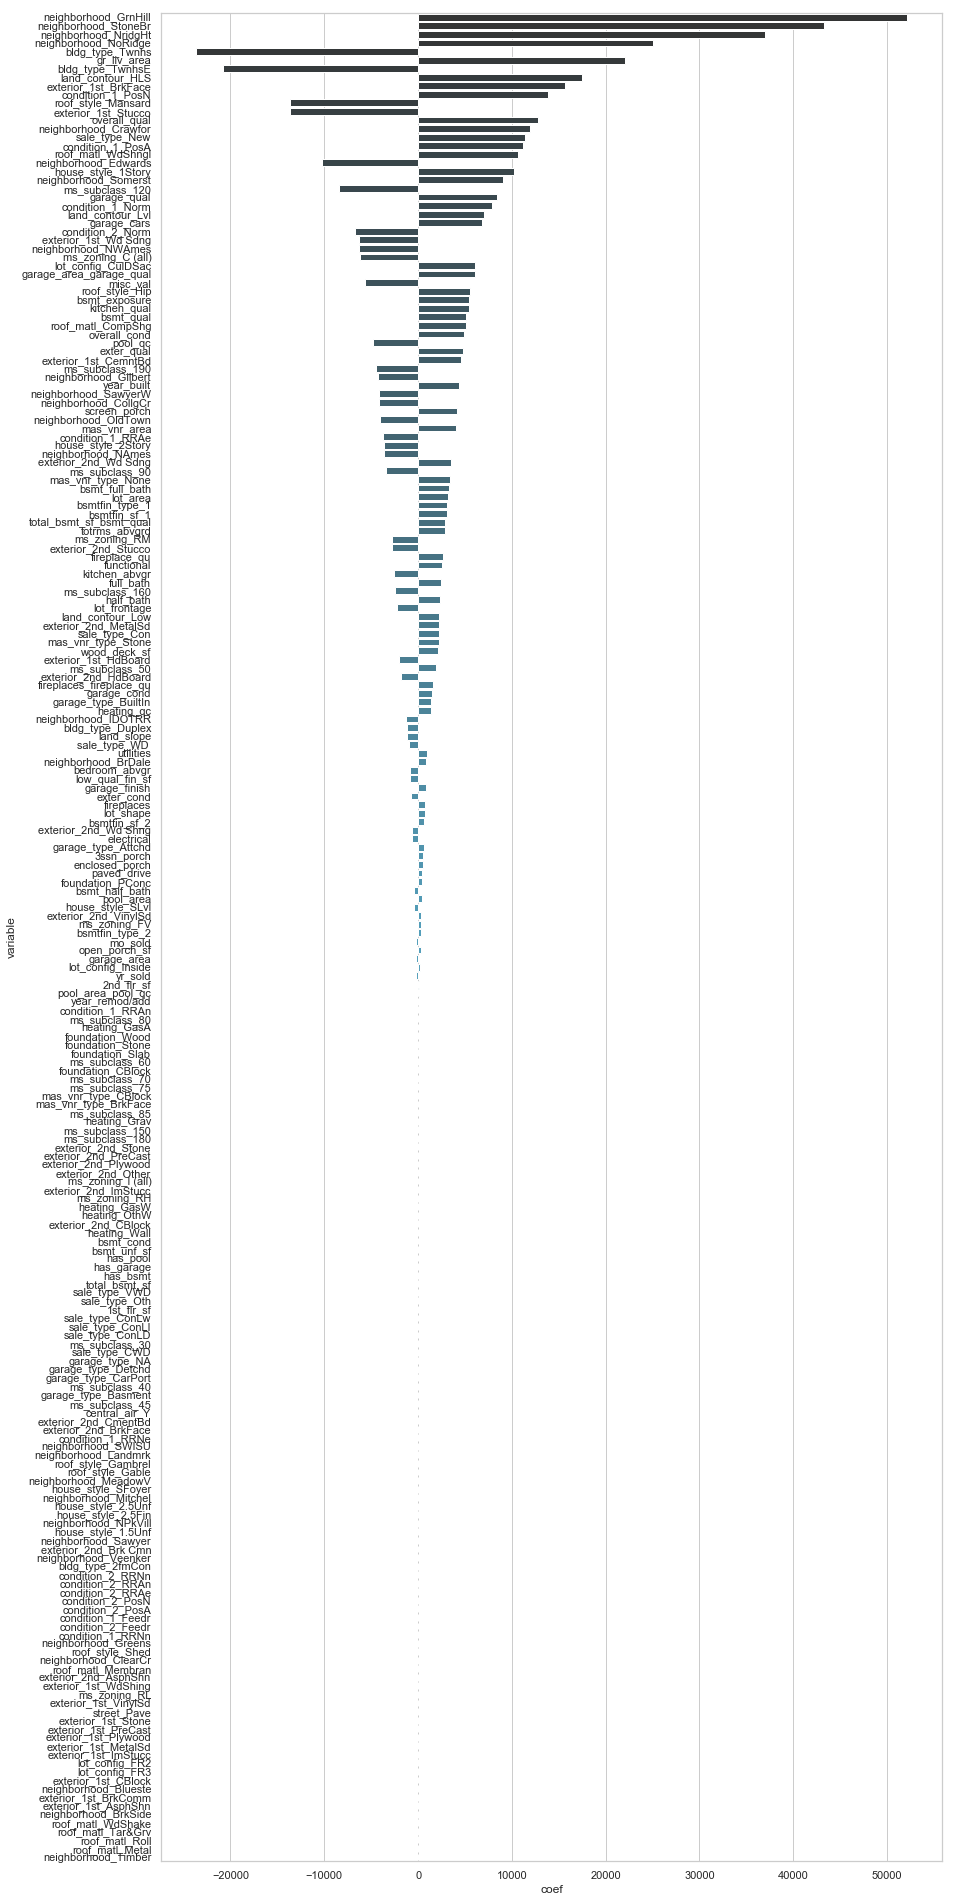

In [208]:
X = df_features.drop('saleprice',axis=1)
y = df_features['saleprice']

lasso_reg(X,y)

In [209]:
X = df_features.drop('saleprice',axis=1)
y = df_features['saleprice']

result = lasso_test(X,y,df_test_features)

Optimal alpha:  63.40786029459315


In [210]:
result.to_csv(r'datasets/zl_sub_4.csv',index=False)  

#### RMSE from Kaggle = 36582.93333

Performance is slightly better than ridge regression but still way below previous models. The feature engineering was unfortunately not helpful.

### Modelling excluding nominal features

#### Ridge regression

Optimal alpha:  775.2597488629465
Ridge regression cross validation scores:  [0.82463893 0.8535456  0.86948491 0.87823119 0.64581139 0.86096907
 0.8953866  0.85846677 0.84197049 0.70671314]
Ridge regression cross validation mean score:  0.8235218094536334
Ridge regression cross validation scores standard deviation:  0.0770467438407398


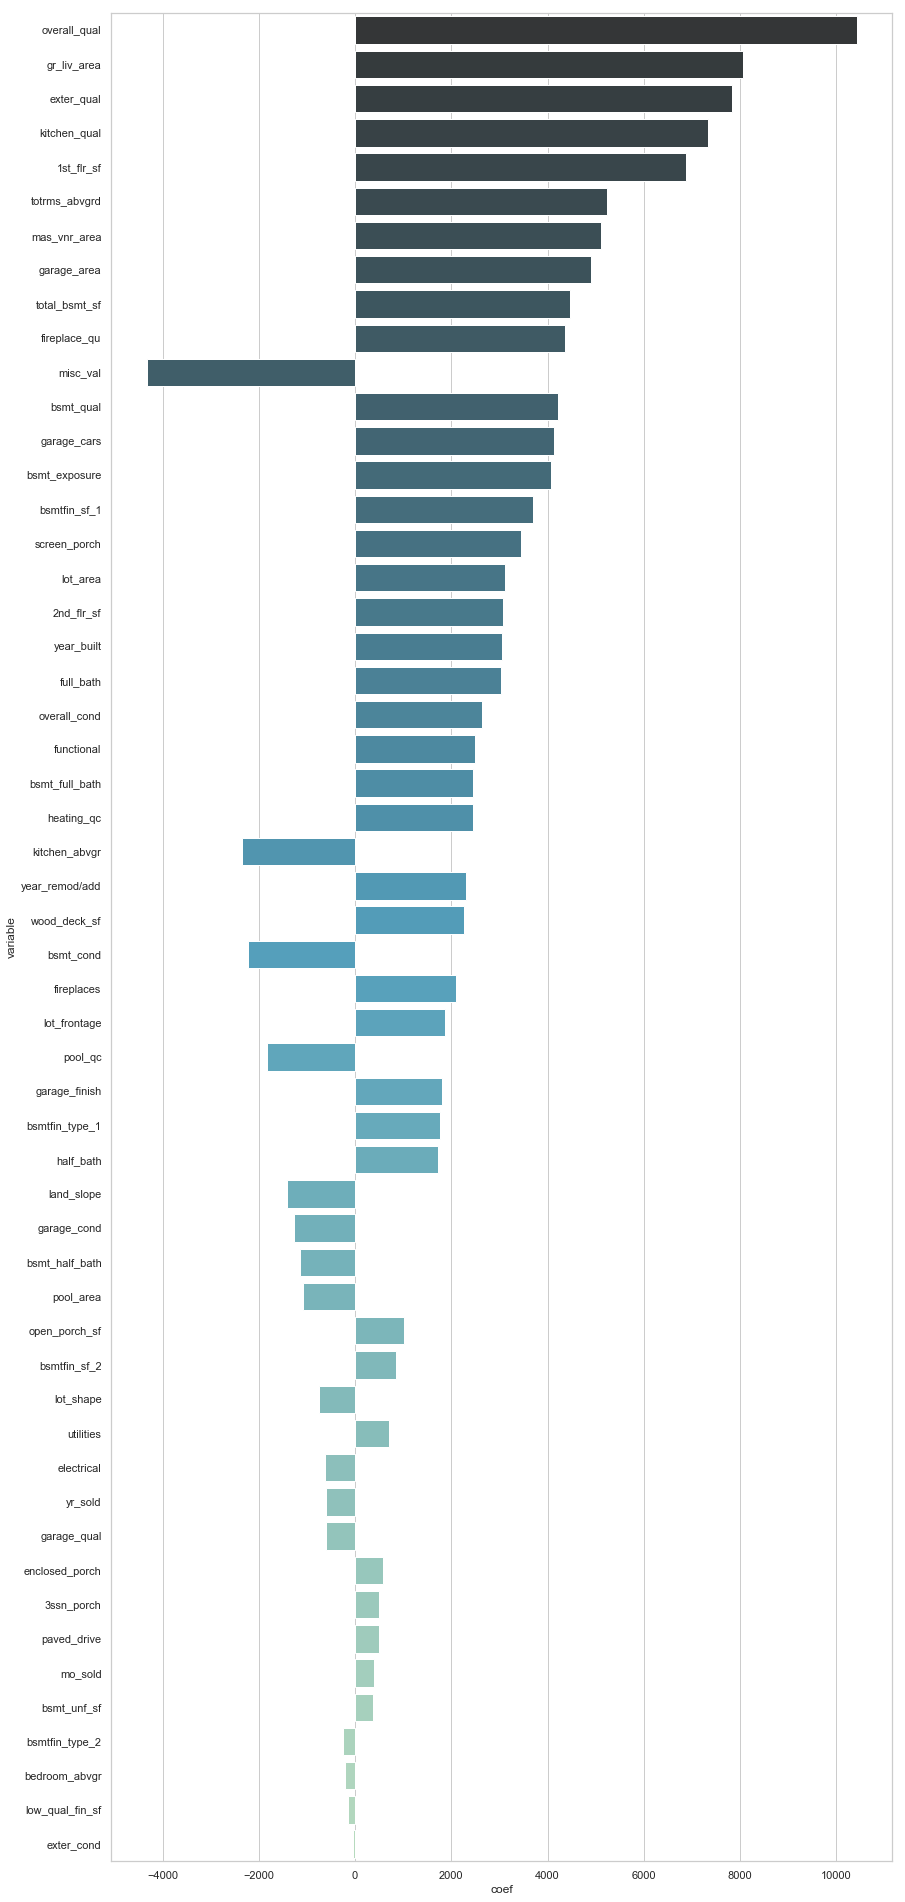

In [211]:
X = numeric_scaled
y = df_features['saleprice']

ridge_reg(X,y)

In [212]:
X = numeric_scaled
y = df_features['saleprice']

result = ridge_test(X,y,numeric_test_scaled)

Optimal alpha:  775.2597488629465


In [213]:
result.to_csv(r'datasets/zl_sub_5.csv',index=False)  

#### RMSE from Kaggle = 34399.17332

Performance is below that of the full data set, suggesting that nominal features do make important contributions to accuracy of predictions. 

#### Lasso regression

Optimal alpha:  1509.720683895901
Lasso regression cross validation scores:  [0.821028   0.84061906 0.87618305 0.88122141 0.57851306 0.86970575
 0.88942694 0.86395782 0.84354095 0.69801306]
Lasso regression cross validation mean score:  0.8162209100450852
Lasso regression cross validation scores standard deviation:  0.09495365494138187
Percent variables zeroed out:  0.46296296296296297


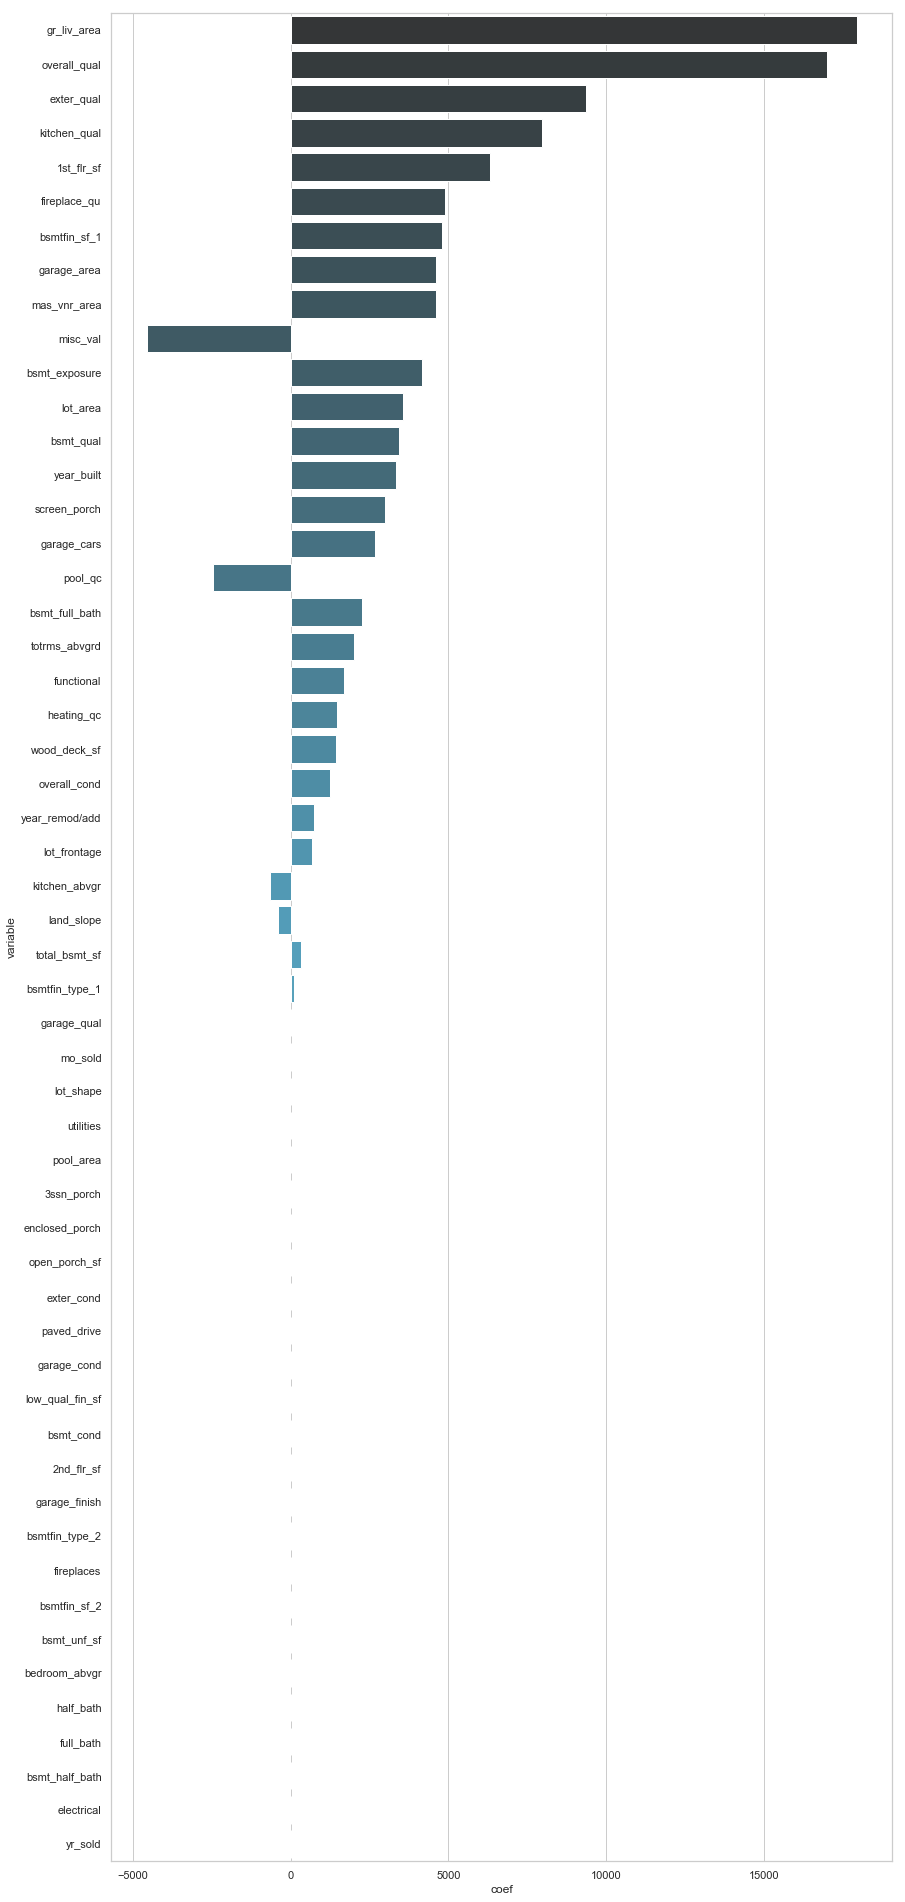

In [214]:
X = numeric_scaled
y = df_features['saleprice']

lasso_reg(X,y)

In [215]:
X = numeric_scaled
y = df_features['saleprice']

result = lasso_test(X,y,numeric_test_scaled)

Optimal alpha:  1509.720683895901


In [216]:
result.to_csv(r'datasets/zl_sub_6.csv',index=False)

#### RMSE from Kaggle = 34234.67924

This is an improvement on the ridge regression above, suggesting that some features need to be dropped to improve performance. 

### Modelling using selected features

We will now attempt to improve our model by manually selecting some features, based on our earlier experiments and also looking at elements selected by the lasso models.

#### Linear regression

In [217]:
def lin_reg(X,y):
    lr = LinearRegression()
    lr_scores = cross_val_score(lr, X, y, cv=10)
    print('Linear regression cross validation scores: ', lr_scores)
    print('Linear regression mean cross validation score: ', np.mean(lr_scores))
    print('Linear regression cross validation scores standard deviation: ', np.std(lr_scores))
    lr.fit(X,y)
    lr_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lr.coef_,
                            'abs_coef':np.abs(lr.coef_)})
    lr_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.set(style='whitegrid',rc={"figure.figsize": (14, 34)})
    sns.barplot(y='variable',x='coef', data=lr_coefs, palette='GnBu_d')

In [218]:
def lr_test(X,y,test_data):
    lr = LinearRegression()
    lr.fit(X, y)
    predictions = lr.predict(test_data)
    result = test[['id']].join(pd.DataFrame(predictions,columns=['SalePrice']))
    return result

In [219]:
X_select = train[['overall_qual','gr_liv_area','garage_area','total_bsmt_sf','year_built']]
y_select = train['saleprice']
X_test_select = test[['overall_qual','gr_liv_area','garage_area','total_bsmt_sf','year_built']]

In [220]:
X_select_scaled = scaler.fit_transform(X_select)

X_select_scaled = pd.DataFrame(X_select_scaled,columns=X_select.columns)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [221]:
X_test_select_scaled = scaler.fit_transform(X_test_select)

X_test_select_scaled = pd.DataFrame(X_test_select_scaled,columns=X_test_select.columns)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Linear regression cross validation scores:  [0.7780421  0.84006568 0.81668155 0.82983625 0.55947961 0.8129164
 0.8466551  0.82077603 0.79198368 0.65845799]
Linear regression mean cross validation score:  0.7754894377605271
Linear regression cross validation scores standard deviation:  0.08830166638031395


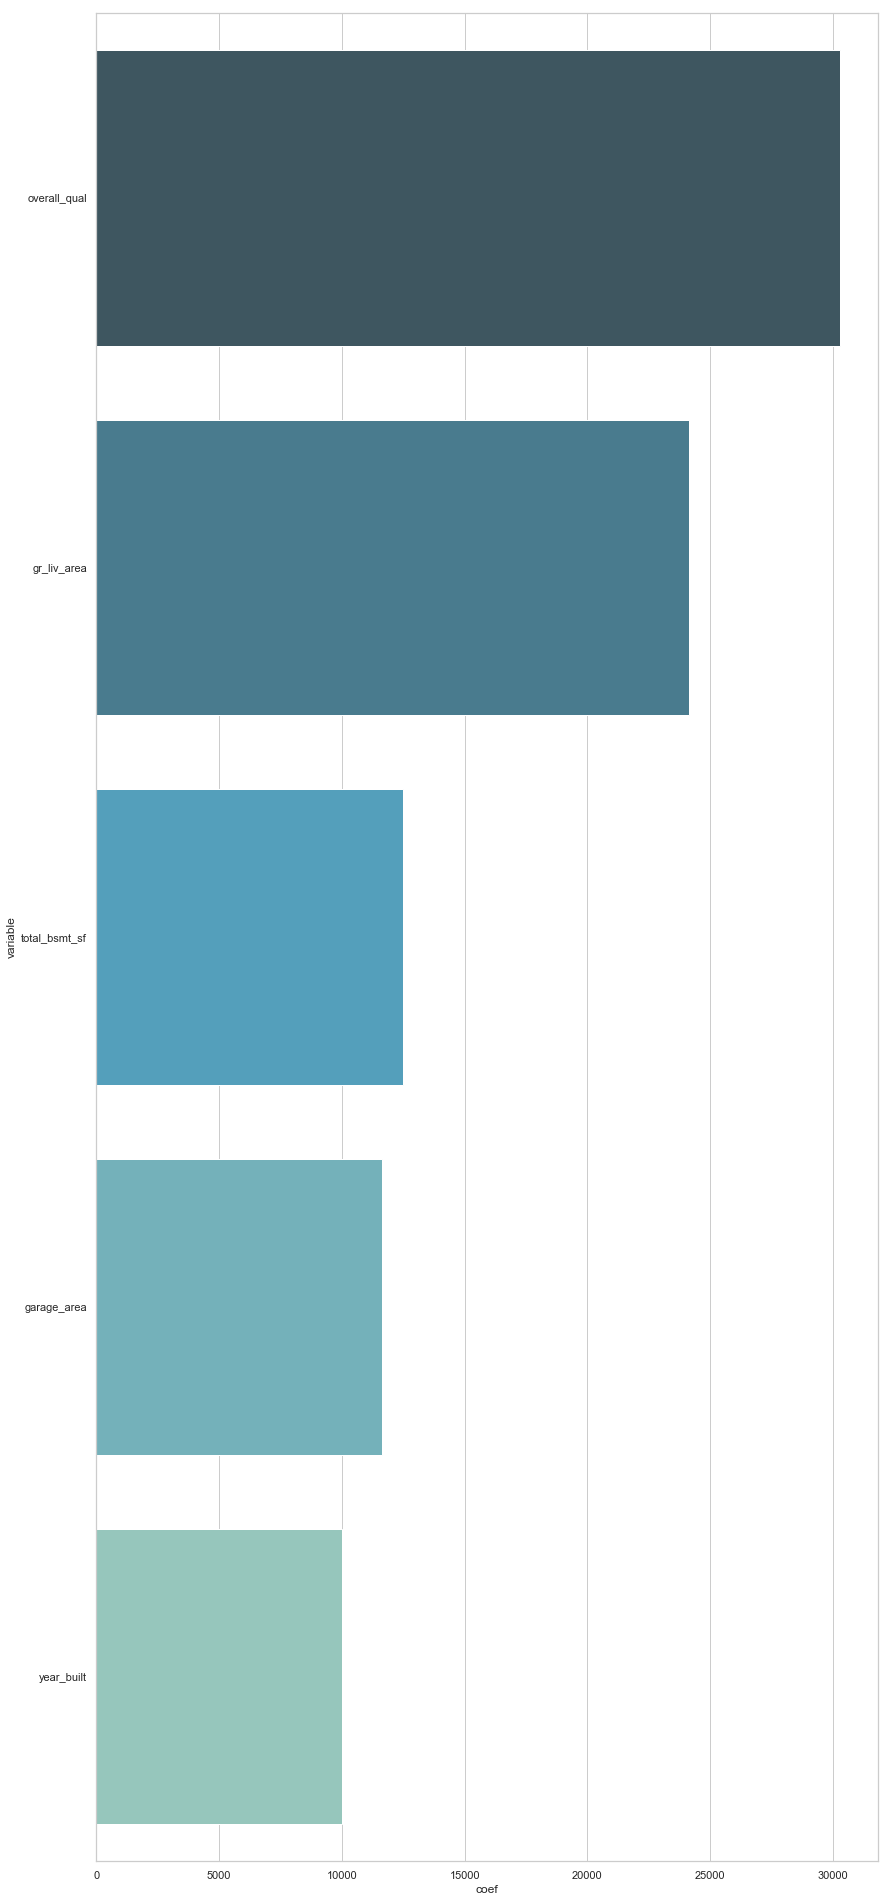

In [222]:
X = X_select_scaled
y = y_select
lin_reg(X,y)

In [228]:
X = X_select_scaled
y = y_select

result = lr_test(X,y,X_test_select_scaled)

In [229]:
result.to_csv(r'datasets/zl_sub_7.csv',index=False)  

#### RMSE from Kaggle = 37591.26546

This performance based on just five features and using linear regression is comparable to the more complex model. 

#### Ridge regression

Optimal alpha:  108.43659686896109
Ridge regression cross validation scores:  [0.77600475 0.83987679 0.81593071 0.82879112 0.57083904 0.80841082
 0.85028149 0.81874458 0.78769867 0.66432718]
Ridge regression cross validation mean score:  0.7760905156116273
Ridge regression cross validation scores standard deviation:  0.0845904987367498


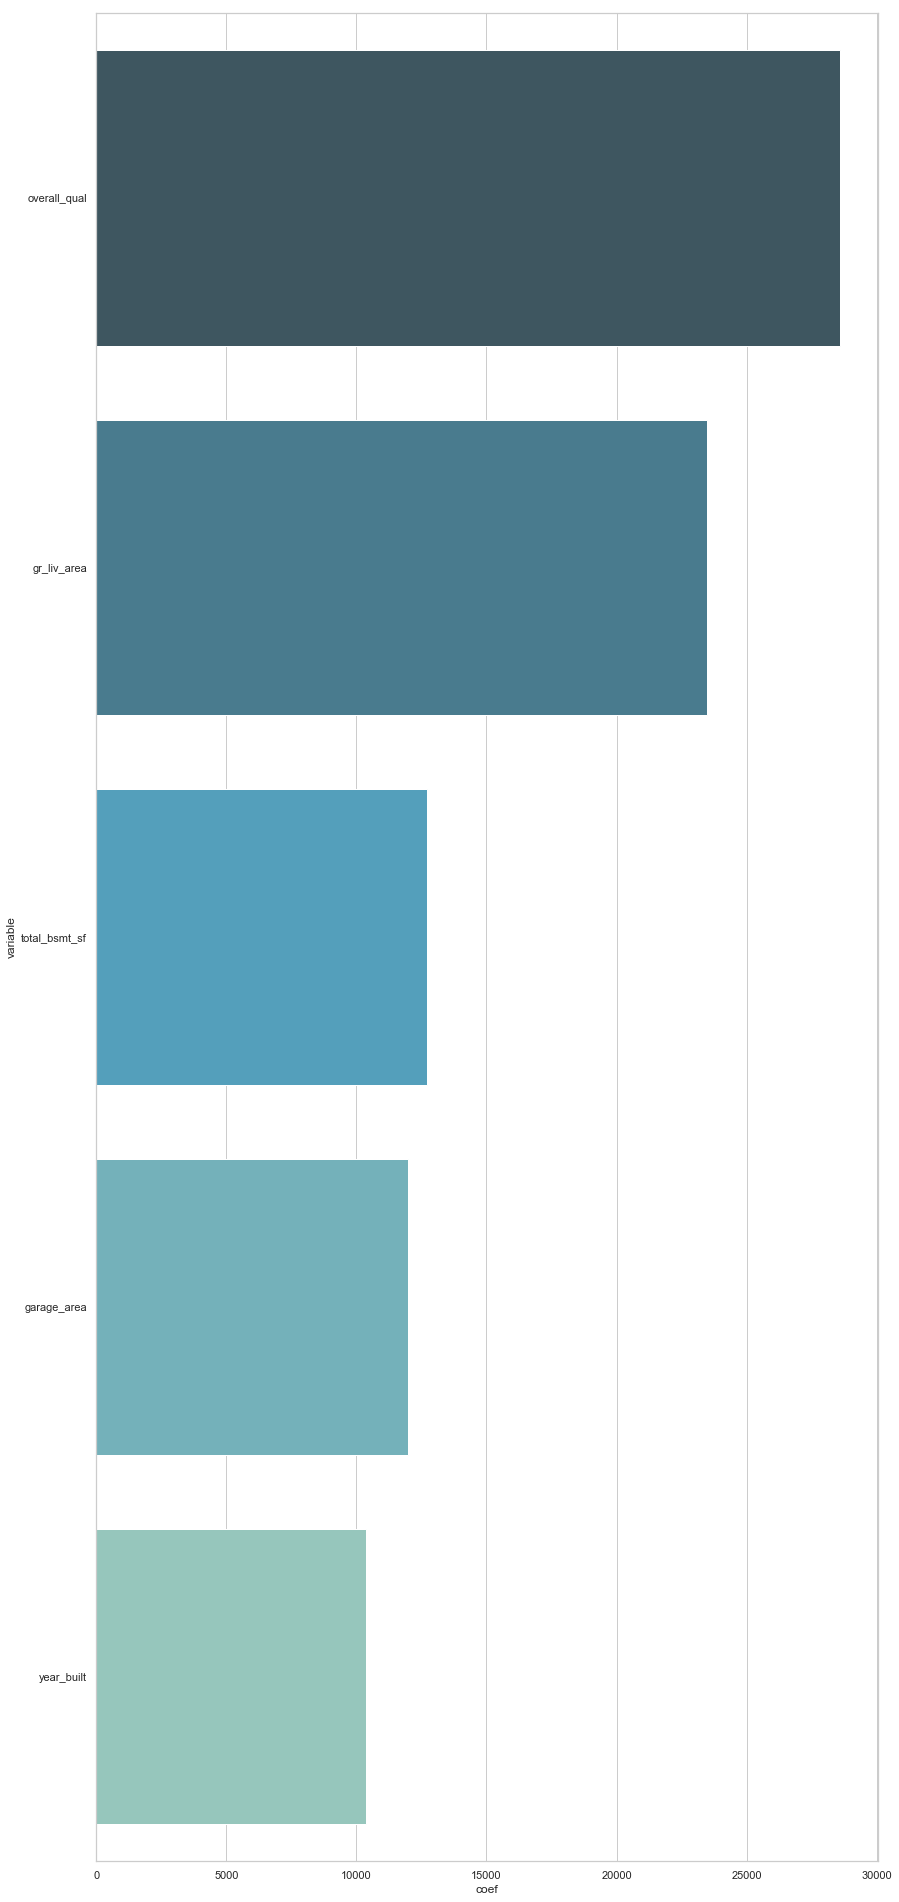

In [225]:
X = X_select_scaled
y = y_select

ridge_reg(X,y)

In [230]:
X = X_select_scaled
y = y_select

result = ridge_test(X, y, X_test_select_scaled)

Optimal alpha:  108.43659686896109


In [231]:
result.to_csv(r'datasets/zl_sub_8.csv',index=False)  

#### RMSE from Kaggle = 37690.93051

Ridge regression did not make much difference to performance, likely because the model is already simple. 

#### Lasso regression

Optimal alpha:  434.3246124511264
Lasso regression cross validation scores:  [0.77697111 0.83968598 0.8162497  0.82933463 0.5647076  0.81196005
 0.84712122 0.81965787 0.79029924 0.66085254]
Lasso regression cross validation mean score:  0.7756839937036091
Lasso regression cross validation scores standard deviation:  0.08653653273304998
Percent variables zeroed out:  0.0


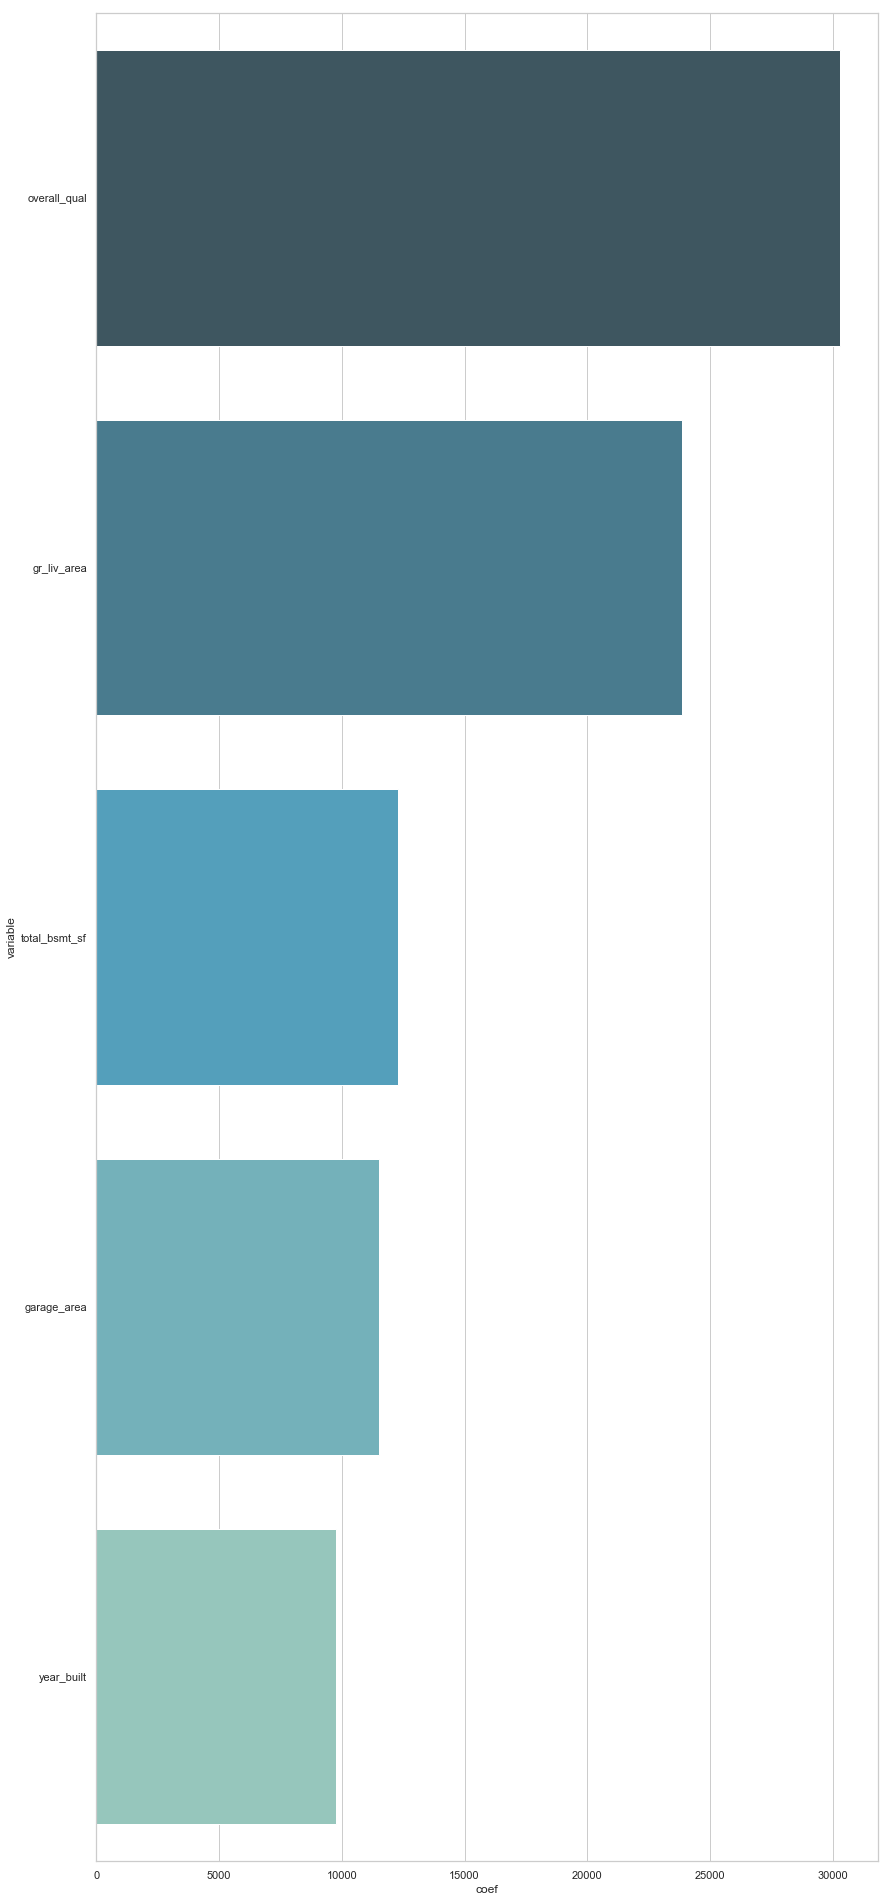

In [232]:
X = X_select_scaled
y = y_select

lasso_reg(X,y)

In [233]:
X = X_select_scaled
y = y_select

result = lasso_test(X,y,X_test_select_scaled)

Optimal alpha:  434.3246124511264


In [234]:
result.to_csv(r'datasets/zl_sub_9.csv',index=False)  

#### RMSE from Kaggle = 37627.52808

Lasso regression also did not make much difference to performance, likely because the model is already simple. The model did not drop any features. 

### Analysis after 1st round of testing on test data

- Models did poorer than when testing on holdout data from `train_test_split` on `train.csv`.
- The best performance came from inputting all features and allowing regularization to tune the model. 
- The next best-performing model involved excluding nominal features, with the lasso regression zeroing about half the inputted features. It is perculiar that `pool_qc` and `misc_val` both had a significant negative coefficient, since they are good attributes for a house to have. This could be due to the large number of houses without pools and miscellaneous features, therefore skewing the data. This gives us something to explore in the next round of testing.


## 2nd Round of Testing on Test Data

### Fine tune features excluding nominal features

#### Lasso regression

Optimal alpha:  542.0094088050566
Lasso regression cross validation scores:  [0.82715867 0.8708786  0.87253323 0.88886631 0.59189395 0.87642316
 0.8991811  0.86451335 0.85218065 0.68830803]
Lasso regression cross validation mean score:  0.8231937050185166
Lasso regression cross validation scores standard deviation:  0.09585696856361349
Percent variables zeroed out:  0.27450980392156865


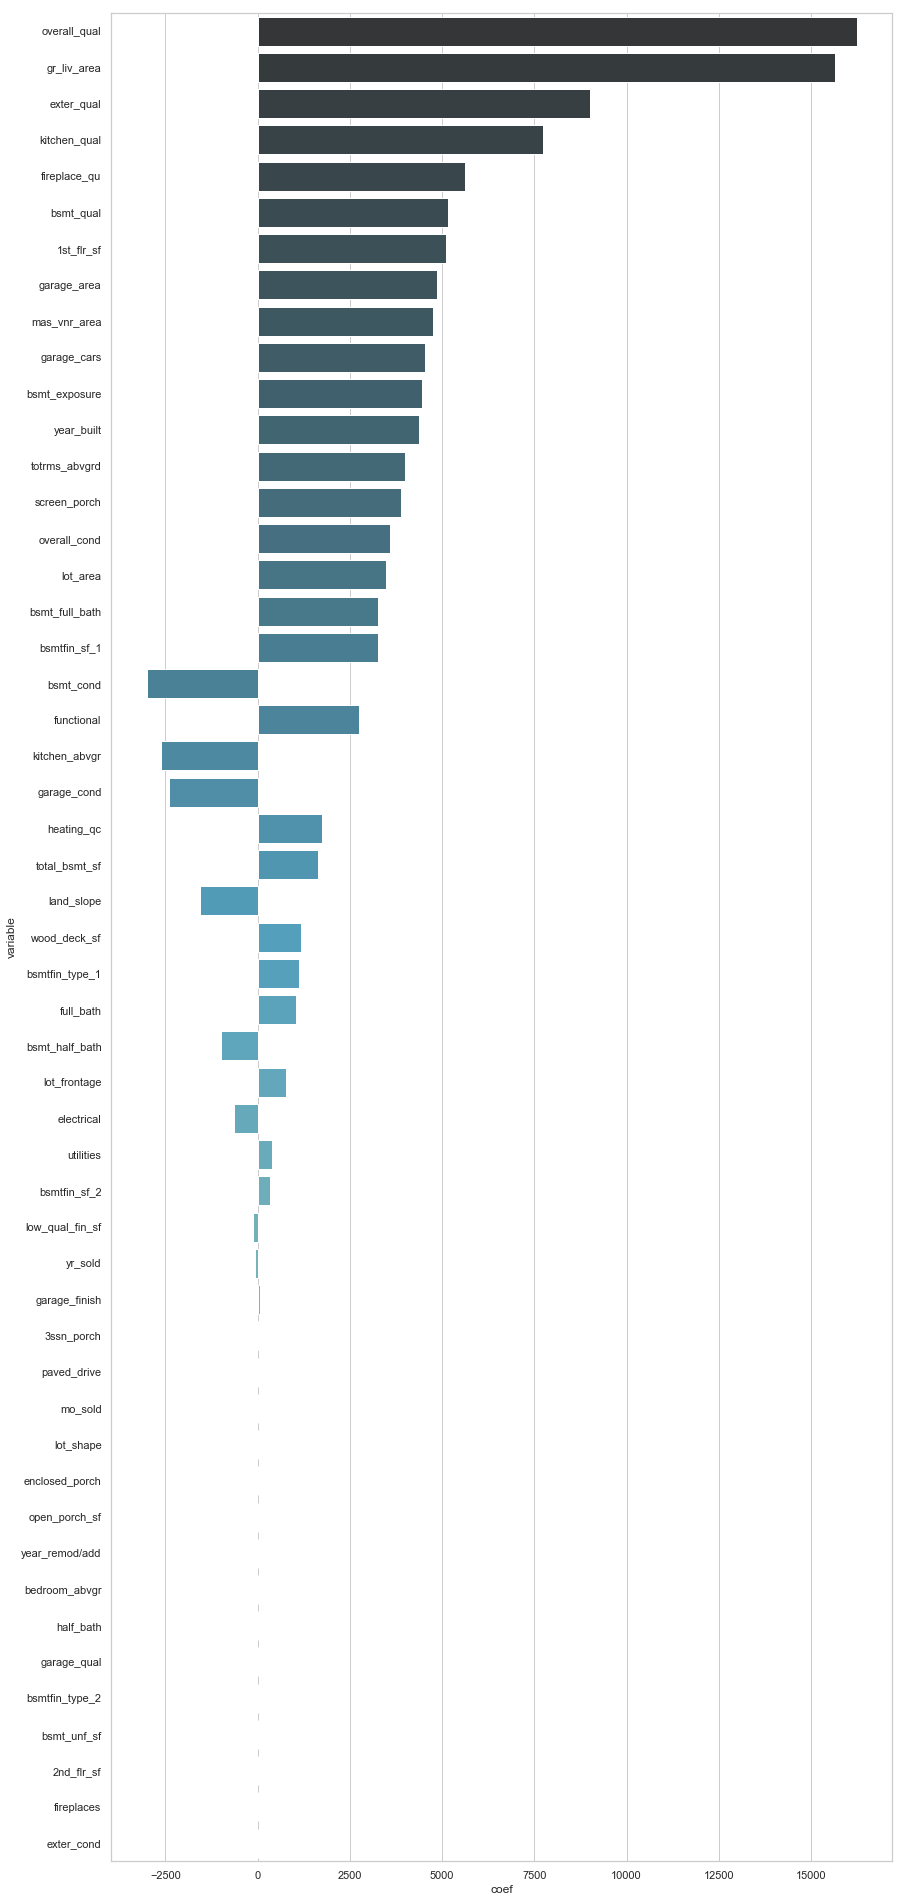

In [235]:
X = numeric_scaled.drop(['pool_qc','pool_area','misc_val'],axis=1)
y = df_features['saleprice']

lasso_reg(X,y)

Optimal alpha:  542.0094088050566
Lasso regression cross validation scores:  [0.82715867 0.8708786  0.87253323 0.88886631 0.59189395 0.87642316
 0.8991811  0.86451335 0.85218065 0.68830803]
Lasso regression cross validation mean score:  0.8231937050185166
Lasso regression cross validation scores standard deviation:  0.09585696856361349
Percent variables zeroed out:  0.27450980392156865


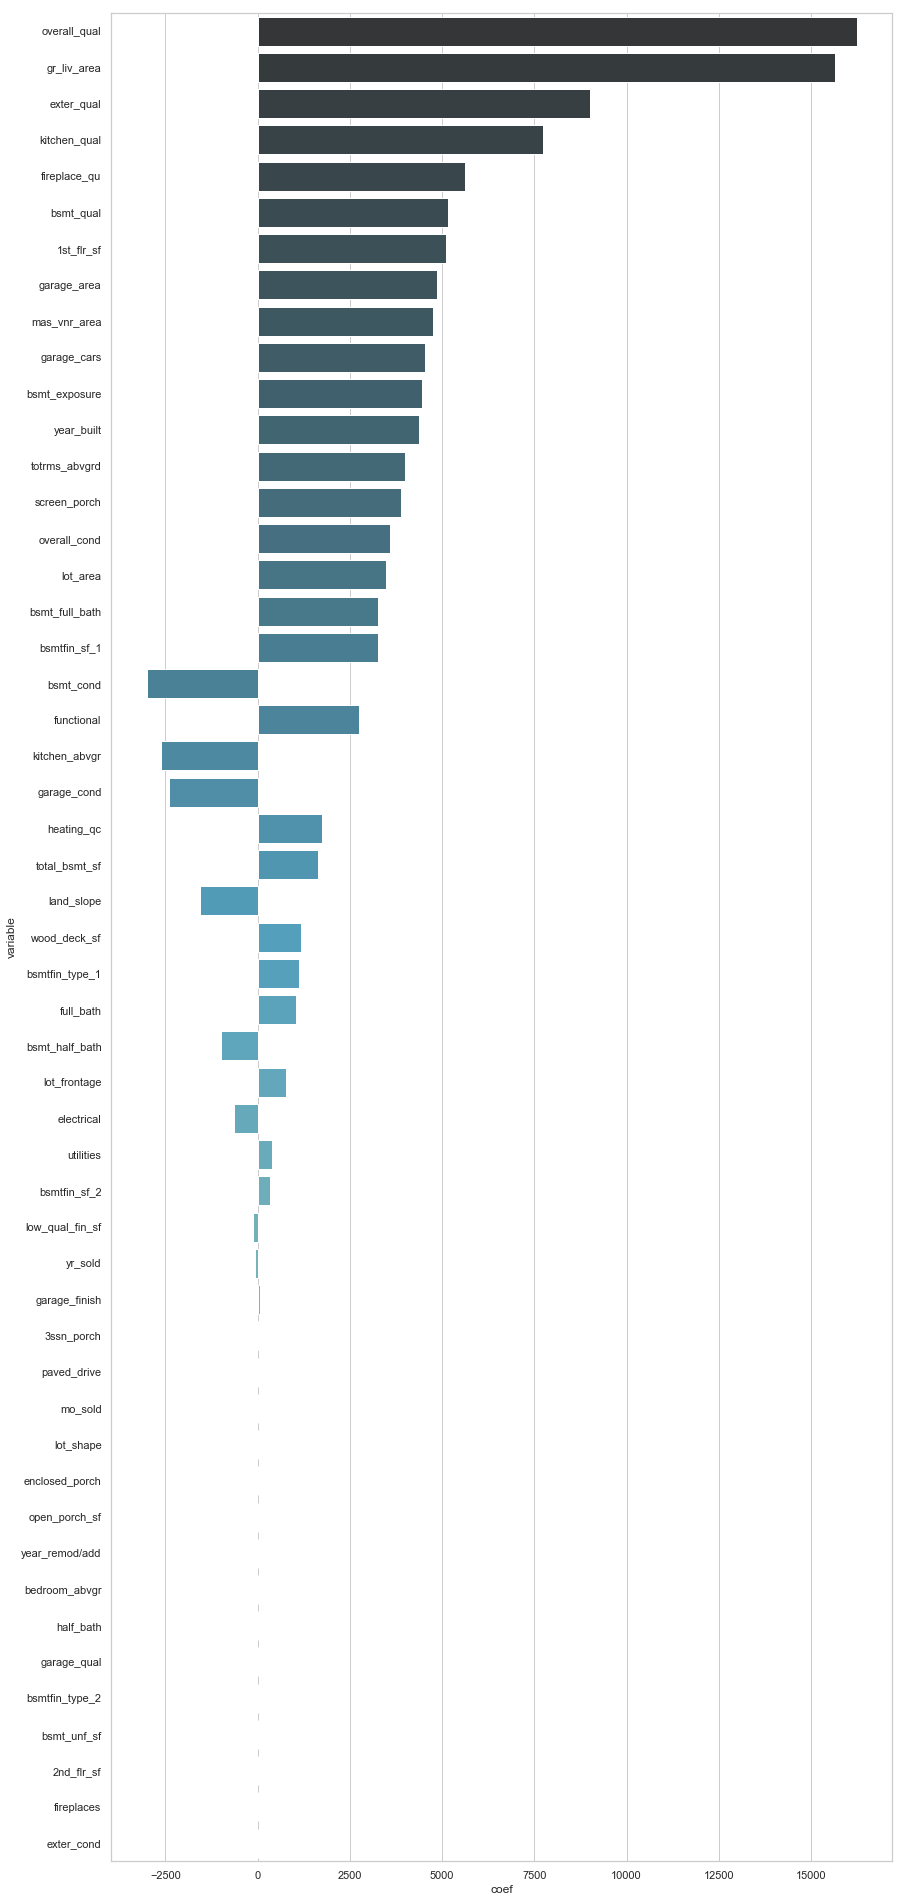

In [250]:
X = numeric_scaled.drop(['pool_qc','pool_area','misc_val'],axis=1)
y = df_features['saleprice']

lasso_reg(X,y)

In [237]:
X = numeric_scaled.drop(['pool_qc','pool_area','misc_val'],axis=1)
y = df_features['saleprice']

result = lasso_test(X,y,numeric_test_scaled.drop(['pool_qc','pool_area','misc_val'],axis=1))

Optimal alpha:  542.0094088050566


In [238]:
result.to_csv(r'datasets/zl_sub_10.csv',index=False)  

#### RMSE from Kaggle = 33066.84111

The mix of manual selection and lasso regression has improved the score. We shall continue exploring if we can further finesse the model using the same tactic.

#### Lasso regression

Optimal alpha:  1068.0608690081817
Lasso regression cross validation scores:  [0.82075804 0.86820725 0.87256739 0.88393856 0.60235308 0.86997233
 0.89237382 0.86332725 0.84390888 0.70011886]
Lasso regression cross validation mean score:  0.8217525448747225
Lasso regression cross validation scores standard deviation:  0.09003945053474684
Percent variables zeroed out:  0.4222222222222222


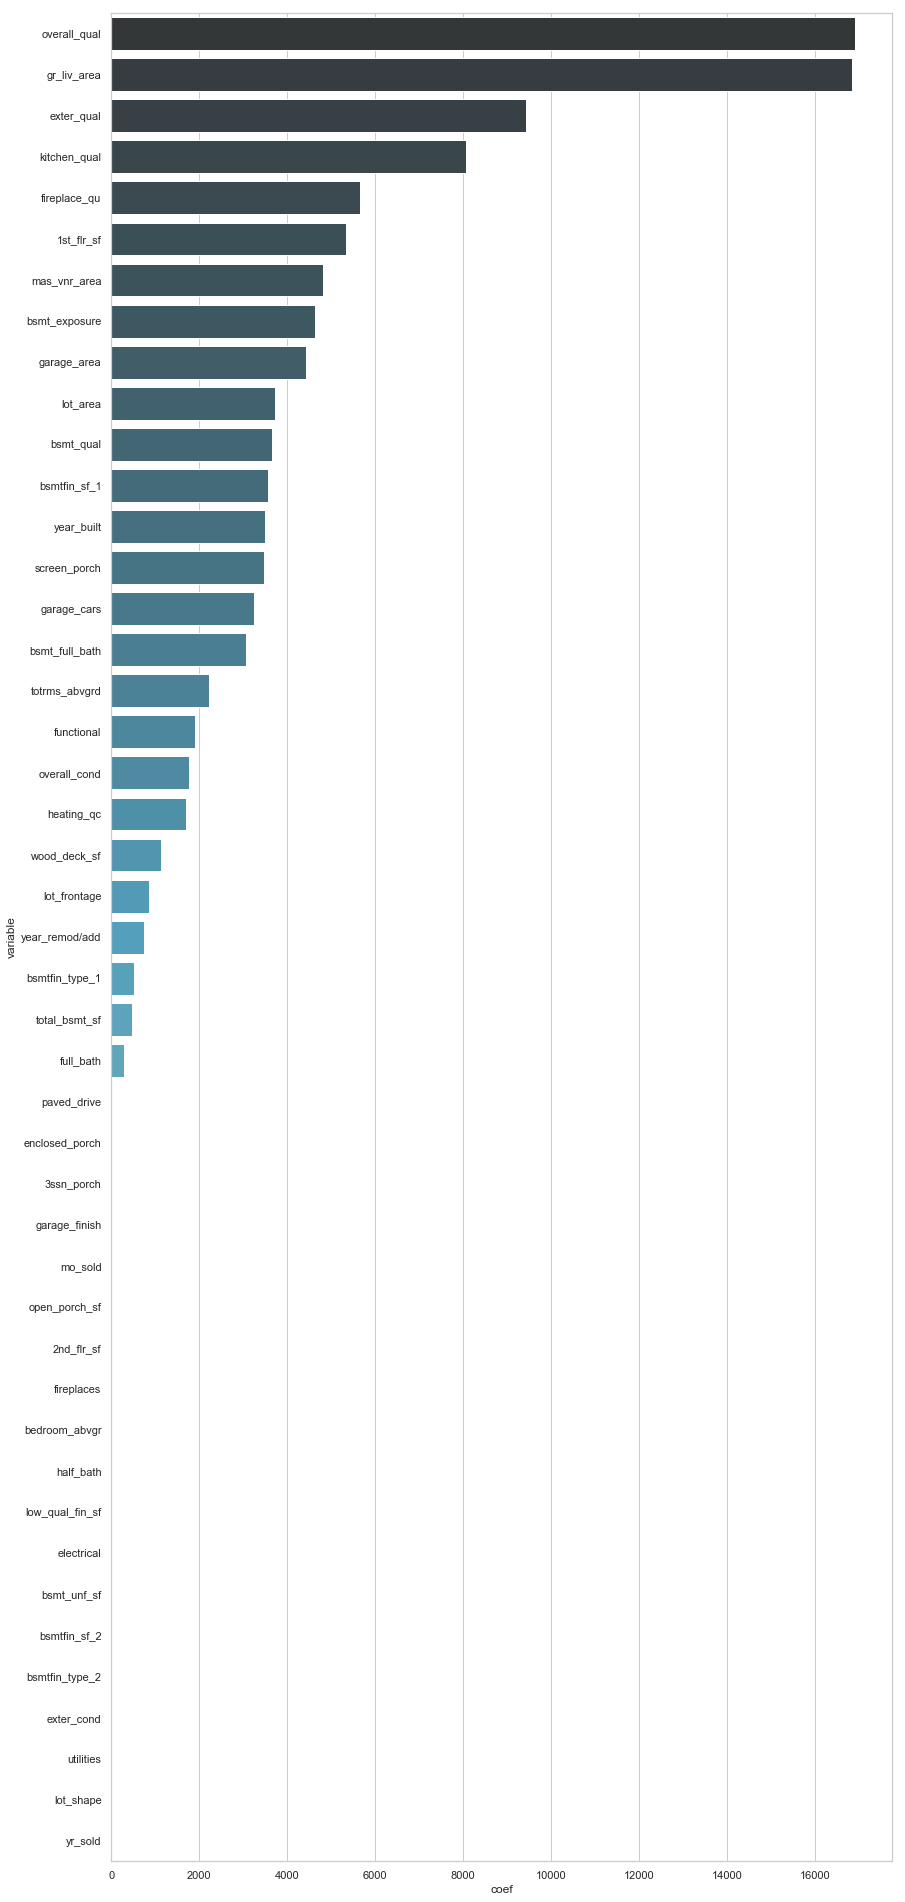

In [239]:
X = numeric_scaled.drop(['pool_qc','pool_area','misc_val','bsmt_cond','land_slope',
                         'garage_cond','kitchen_abvgr','bsmt_half_bath','garage_qual'],axis=1)
y = df_features['saleprice']

lasso_reg(X,y)

In [240]:
X = numeric_scaled.drop(['pool_qc','pool_area','misc_val','bsmt_cond','land_slope',
                         'garage_cond','kitchen_abvgr','bsmt_half_bath','garage_qual'],axis=1)
y = df_features['saleprice']

result = lasso_test(X,y,numeric_test_scaled.drop(['pool_qc','pool_area','misc_val','bsmt_cond','land_slope',
                         'garage_cond','kitchen_abvgr','bsmt_half_bath','garage_qual'],axis=1))

Optimal alpha:  1068.0608690081817


In [241]:
result.to_csv(r'datasets/zl_sub_11.csv',index=False)  

#### RMSE from Kaggle = 33607.84847

In this version, the coefficients are no longer negative and this yielded almost the same RMSE as the previous version.

### Adding interaction terms

Optimal alpha:  1128.8704377579197
Lasso regression cross validation scores:  [0.83111925 0.87303286 0.88063758 0.89259823 0.51768551 0.88136903
 0.89957098 0.86811263 0.85088914 0.686354  ]
Lasso regression cross validation mean score:  0.8181369197172866
Lasso regression cross validation scores standard deviation:  0.11596154341410016
Percent variables zeroed out:  0.4375


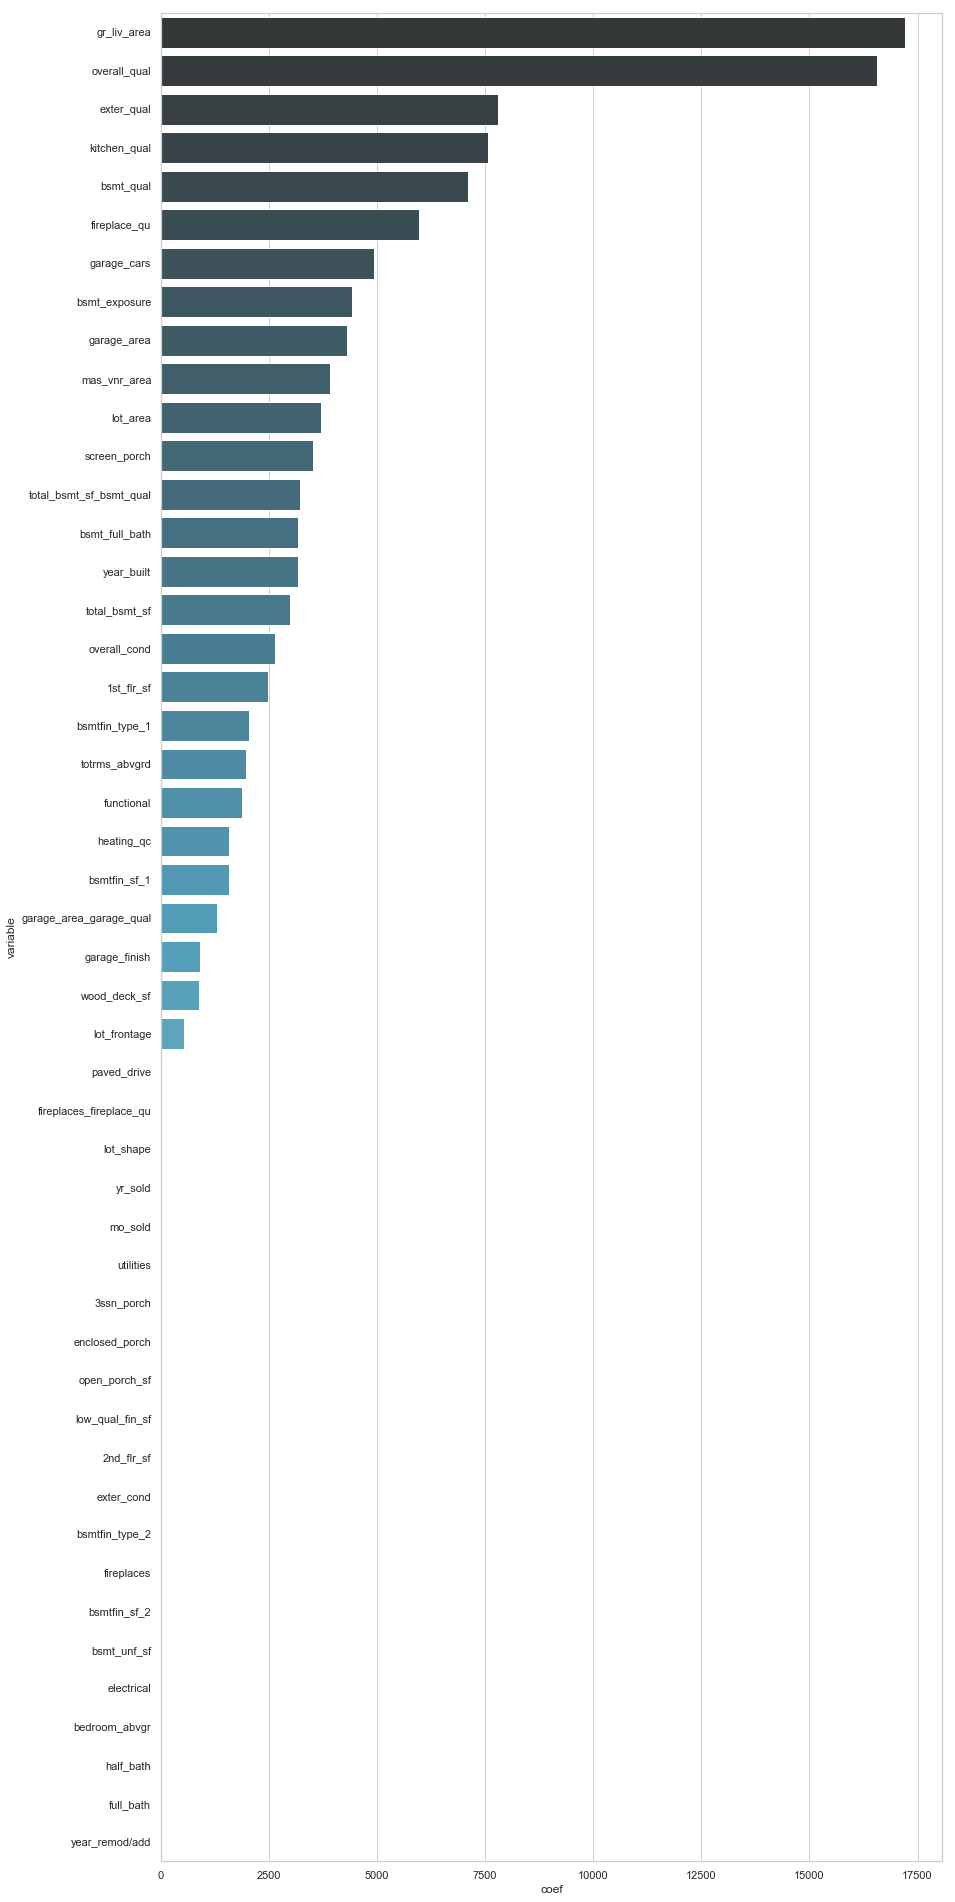

In [242]:
df_select_poly_train = numeric_scaled.drop(['pool_qc','pool_area','misc_val','bsmt_cond','land_slope',
                         'garage_cond','kitchen_abvgr','bsmt_half_bath','garage_qual'],axis=1).join(poly_df_train.drop('pool_area_pool_qc',axis=1))

X = df_select_poly_train
y = df_features['saleprice']

lasso_reg(X,y)

In [243]:
X = df_select_poly_train
y = df_features['saleprice']
df_select_poly_test = numeric_test_scaled.drop(['pool_qc','pool_area','misc_val','bsmt_cond','land_slope',
                         'garage_cond','kitchen_abvgr','bsmt_half_bath','garage_qual'],axis=1).join(poly_df_test.drop('pool_area_pool_qc',axis=1))



result = lasso_test(X,y,df_select_poly_test)

Optimal alpha:  1128.8704377579197


In [244]:
result.to_csv(r'datasets/zl_sub_12.csv',index=False)  

#### RMSE from Kaggle = 34704.65209

The interaction terms have hurt the performance of the model.

### Adding selected nominal features to model

Since the interaction terms did not help, we will use the model combining lasso and manual selection and add in selected nominal features.

In [245]:
numeric_selected_train = numeric_scaled.drop(['pool_qc','pool_area','misc_val','bsmt_cond','land_slope',
                         'garage_cond','kitchen_abvgr','bsmt_half_bath','garage_qual'],axis=1)

numeric_selected_test = numeric_test_scaled.drop(['pool_qc','pool_area','misc_val','bsmt_cond','land_slope',
                         'garage_cond','kitchen_abvgr','bsmt_half_bath','garage_qual'],axis=1)

#### Add `neighborhood`, lasso regression

In [246]:
dummies_neigh = pd.get_dummies(full['neighborhood'],drop_first=True)
dummies_neigh_train = dummies_neigh.iloc[0:2051,:]
dummies_neigh_test = dummies_neigh.iloc[2051:,:]

Optimal alpha:  63.40786029459315
Lasso regression cross validation scores:  [0.84758202 0.88516527 0.87517816 0.90055621 0.63533271 0.88579288
 0.89418342 0.87070446 0.86688188 0.72851576]
Lasso regression cross validation mean score:  0.8389892783503956
Lasso regression cross validation scores standard deviation:  0.08246659741174987
Percent variables zeroed out:  0.20833333333333334


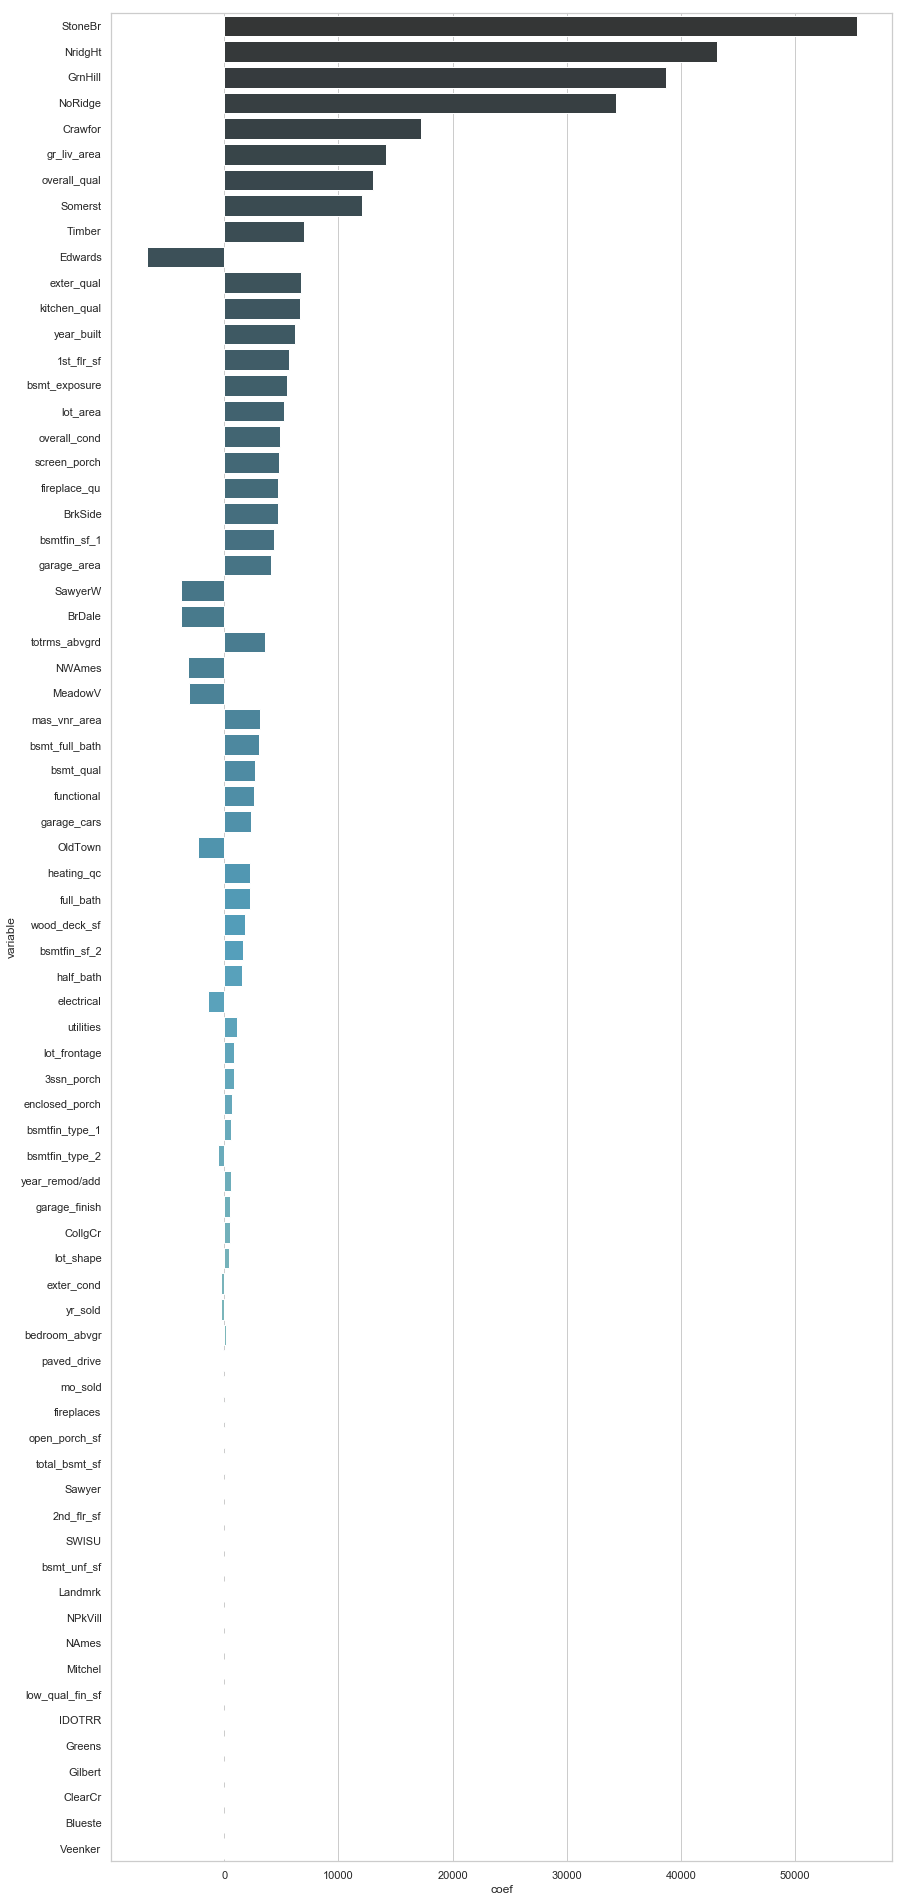

In [252]:
X = numeric_selected_train.join(dummies_neigh_train)
y = df_features['saleprice']

lasso_reg(X,y)

In [253]:
X = numeric_selected_train.join(dummies_neigh_train)
y = df_features['saleprice']
test_data = numeric_selected_test.join(dummies_neigh_test)

result = lasso_test(X,y,test_data)

Optimal alpha:  63.40786029459315


In [254]:
result.to_csv(r'datasets/zl_sub_13.csv',index=False) 

#### RMSE from Kaggle = 30869.84290

Adding the `neighborhood` feature has pushed RMSE below 33000 for the first time since the model using all features reached that. 

#### Adding more nominal features, lasso regression


In [255]:
dummies_select = pd.get_dummies(full[['neighborhood','ms_subclass','foundation','condition_1']],drop_first=True)
dummies_select_train = dummies_select.iloc[0:2051,:]
dummies_select_test = dummies_select.iloc[2051:,:]

Optimal alpha:  63.40786029459315
Lasso regression cross validation scores:  [0.86510917 0.89372353 0.88681769 0.91586871 0.68733347 0.88853835
 0.90338666 0.88596326 0.86235245 0.75137897]
Lasso regression cross validation mean score:  0.8540472267256611
Lasso regression cross validation scores standard deviation:  0.07045441717120224
Percent variables zeroed out:  0.22


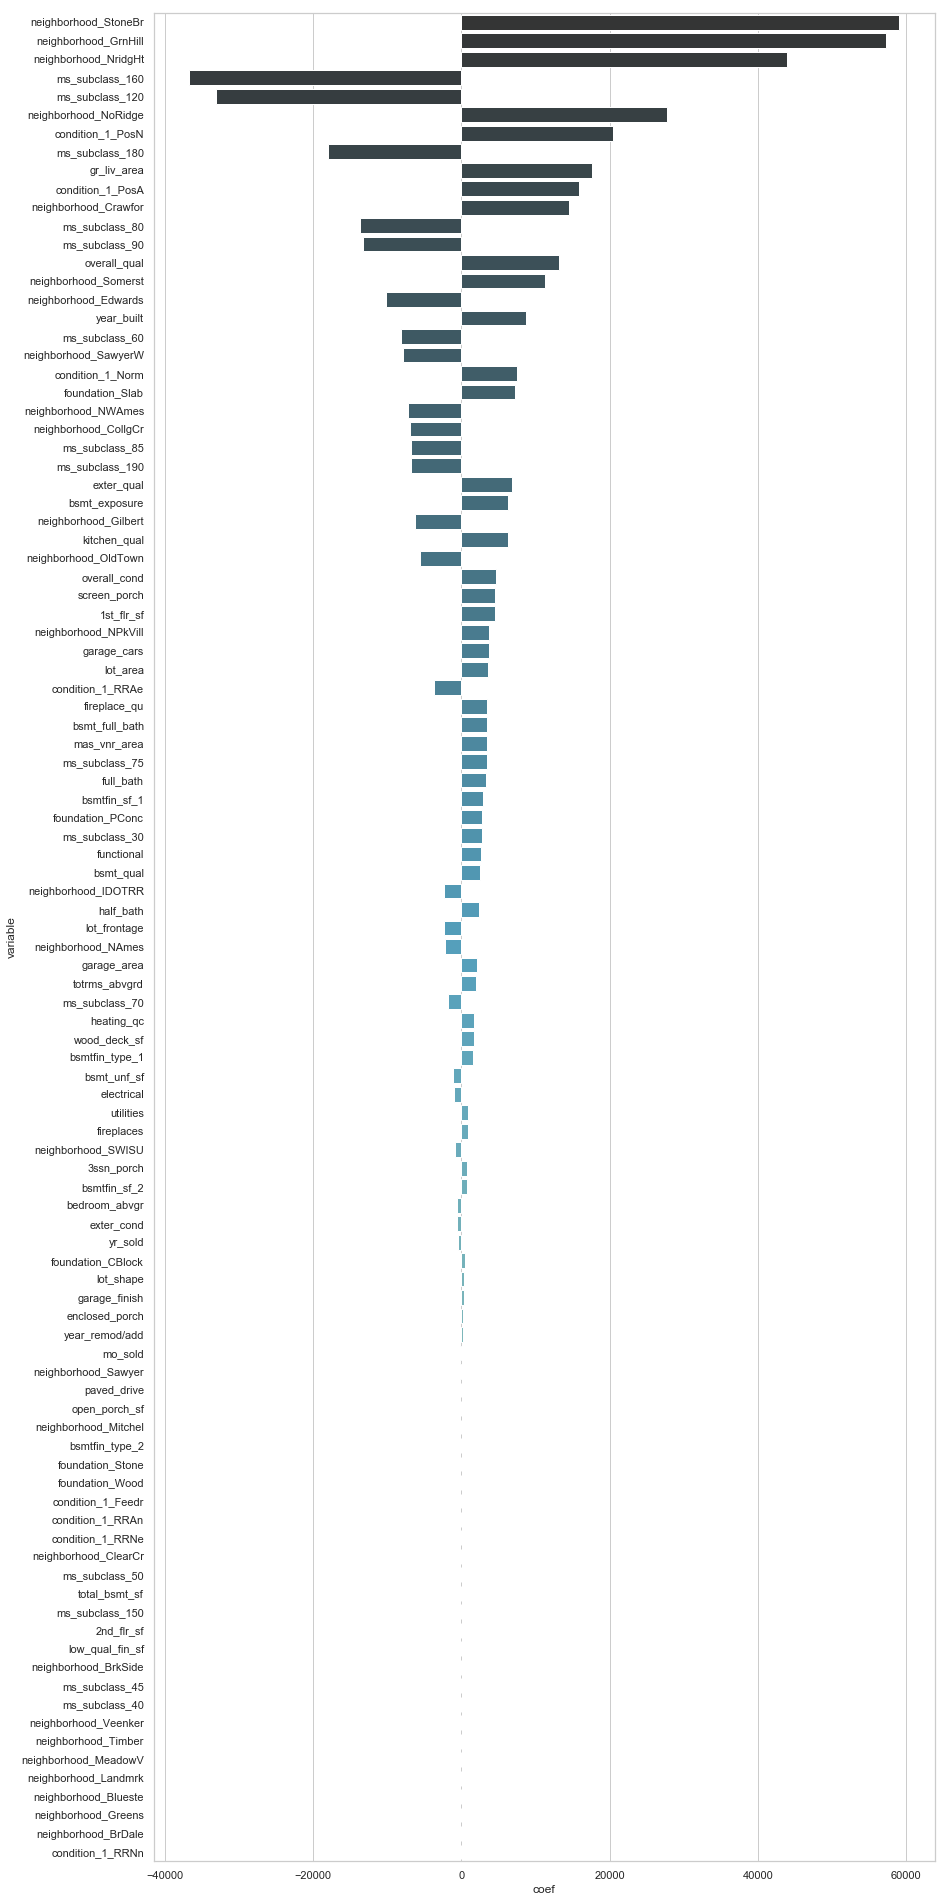

In [256]:
X = numeric_selected_train.join(dummies_select_train)
y = df_features['saleprice']

lasso_reg(X,y)

In [257]:
X = numeric_selected_train.join(dummies_select_train)
y = df_features['saleprice']
test_data = numeric_selected_test.join(dummies_select_test)

result = lasso_test(X,y,test_data)

Optimal alpha:  63.40786029459315


In [258]:
result.to_csv(r'datasets/zl_sub_14.csv',index=False) 

#### RMSE from Kaggle = 29662.15095

Adding more nominal features has improved the RMSE slightly. 

#### Dropping more features to reduce multicollinearity, lasso regression

In [259]:
numeric_selected_train = numeric_scaled.drop(['pool_qc','pool_area','misc_val','bsmt_cond','land_slope',
                         'garage_cond','kitchen_abvgr','bsmt_half_bath','garage_qual','garage_cars',
                                             '1st_flr_sf','exter_qual','kitchen_qual'],axis=1)

numeric_selected_test = numeric_test_scaled.drop(['pool_qc','pool_area','misc_val','bsmt_cond','land_slope',
                         'garage_cond','kitchen_abvgr','bsmt_half_bath','garage_qual','garage_cars',
                                                 '1st_flr_sf','exter_qual','kitchen_qual'],axis=1)

Optimal alpha:  63.40786029459315
Lasso regression cross validation scores:  [0.8614352  0.88564762 0.88245154 0.90718809 0.67957691 0.88325578
 0.8947764  0.88385539 0.8570946  0.74949631]
Lasso regression cross validation mean score:  0.8484777840620217
Lasso regression cross validation scores standard deviation:  0.07011015697913714
Percent variables zeroed out:  0.23958333333333334


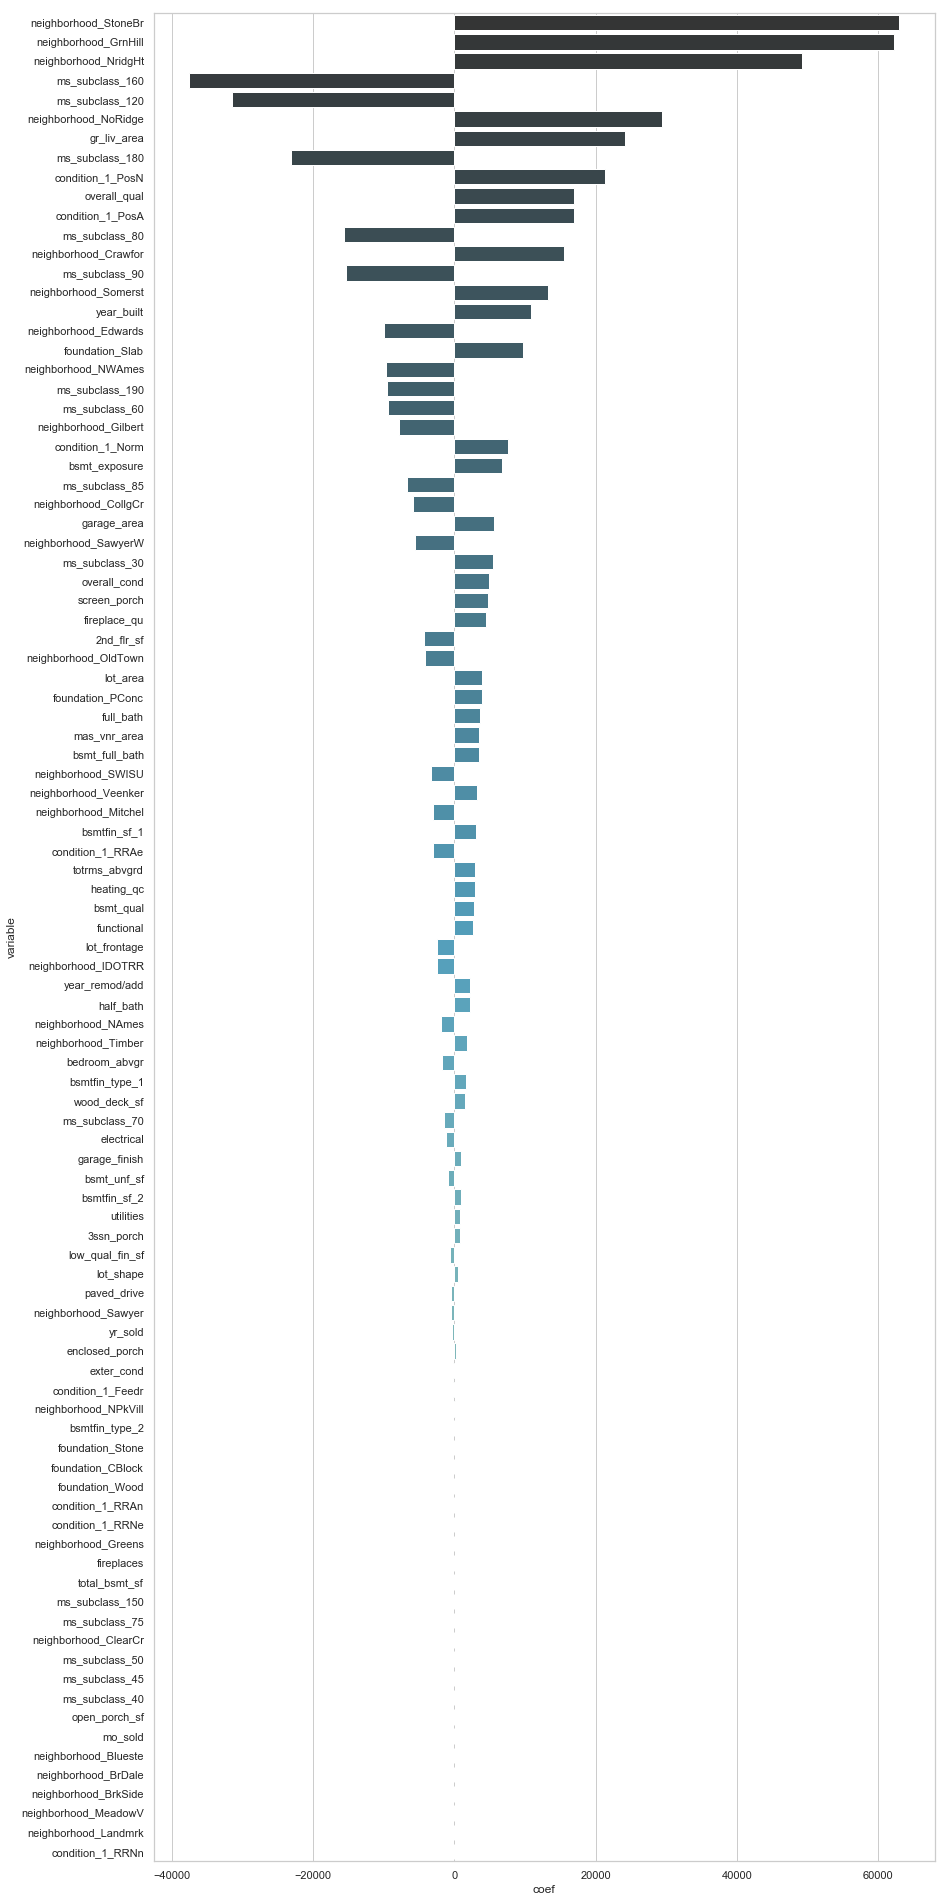

In [260]:
X = numeric_selected_train.join(dummies_select_train)
y = df_features['saleprice']

lasso_reg(X,y)

In [261]:
X = numeric_selected_train.join(dummies_select_train)
y = df_features['saleprice']
test_data = numeric_selected_test.join(dummies_select_test)

result = lasso_test(X,y,test_data)

Optimal alpha:  63.40786029459315


In [262]:
result.to_csv(r'datasets/zl_sub_15.csv',index=False) 

#### RMSE from Kaggle = 29952.03346

This tweak has once again reduced RMSE slightly.

#### Selected numeric features with all nominal features, lasso regression

Optimal alpha:  63.40786029459315
Lasso regression cross validation scores:  [0.8719527  0.88338641 0.88420446 0.91526112 0.69387405 0.88852433
 0.89901081 0.89467029 0.87506787 0.7456874 ]
Lasso regression cross validation mean score:  0.8551639439823762
Lasso regression cross validation scores standard deviation:  0.06966011549436389
Percent variables zeroed out:  0.4489795918367347


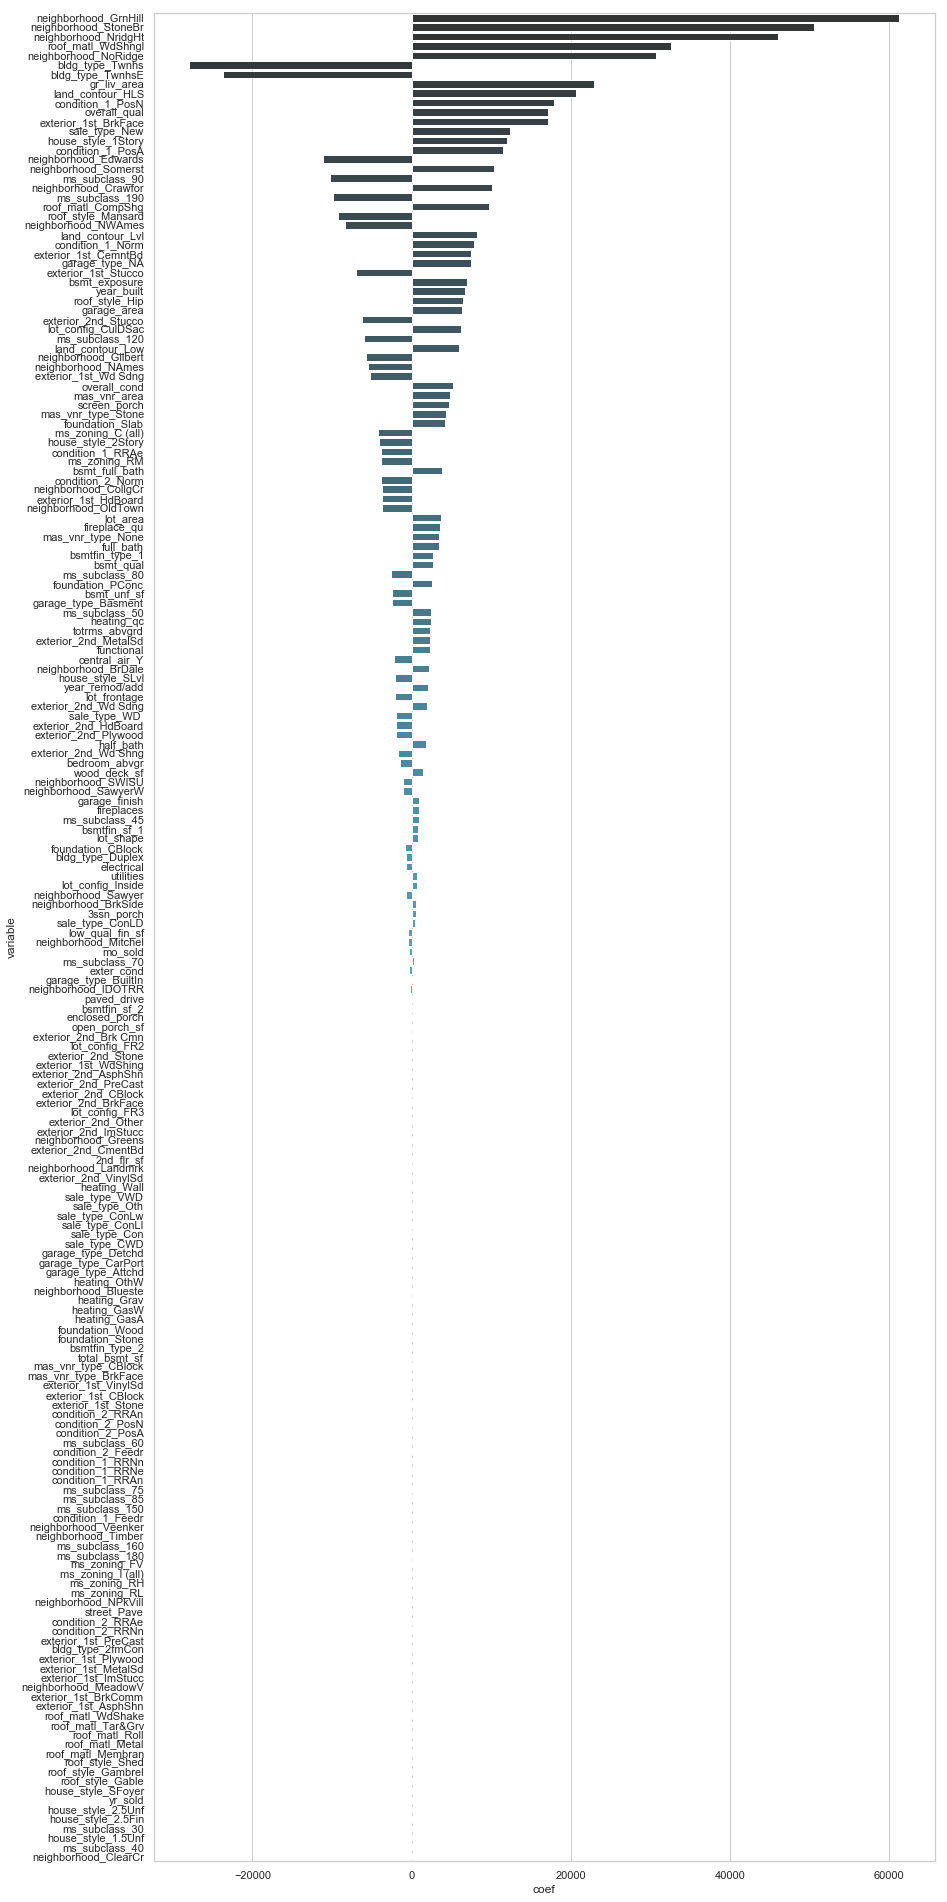

In [268]:
X = numeric_selected_train.join(dummies_train)
y = df_features['saleprice']

lasso_reg(X,y)

In [269]:
X = numeric_selected_train.join(dummies_train)
y = df_features['saleprice']
test_data = numeric_selected_test.join(dummies_test)

result = lasso_test(X,y,test_data)

Optimal alpha:  63.40786029459315


In [270]:
result.to_csv(r'datasets/zl_sub_16.csv',index=False) 

#### RMSE from Kaggle = 29466.75984

Model does not suffer from putting all nominal features, suggesting that improvements came from removing certain numeric features. 

#### Log transformation of sale price, lasso regression

As shown during exploratory data analysis, distribution of the sale price is skewed to the right. We will attempt a log transformation to see if this improves performance. 

Text(0.5, 1.0, 'Distribution after log transformation')

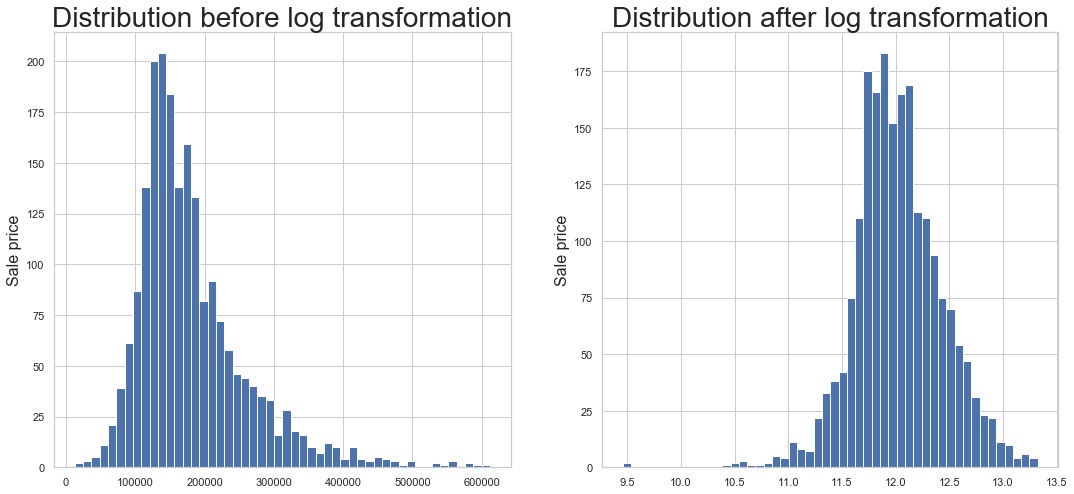

In [289]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
ax = ax.ravel()
ax[0].hist(df_features['saleprice'],bins=50)
ax[1].hist(np.log(df_features['saleprice']),bins=50)
ax[0].set_ylabel('Sale price', fontsize=16)
ax[1].set_ylabel('Sale price', fontsize=16)
ax[0].set_title('Distribution before log transformation', fontsize=28)
ax[1].set_title('Distribution after log transformation', fontsize=28)  

Distribution has been normalized, with skewness on the right reined in.

Optimal alpha:  0.0003727648762140222
Lasso regression cross validation scores:  [0.86438356 0.88507007 0.89411963 0.93714065 0.74473475 0.92386251
 0.9251495  0.83894967 0.93224911 0.83785721]
Lasso regression cross validation mean score:  0.8783516661362553
Lasso regression cross validation scores standard deviation:  0.056707165755965246
Percent variables zeroed out:  0.49489795918367346


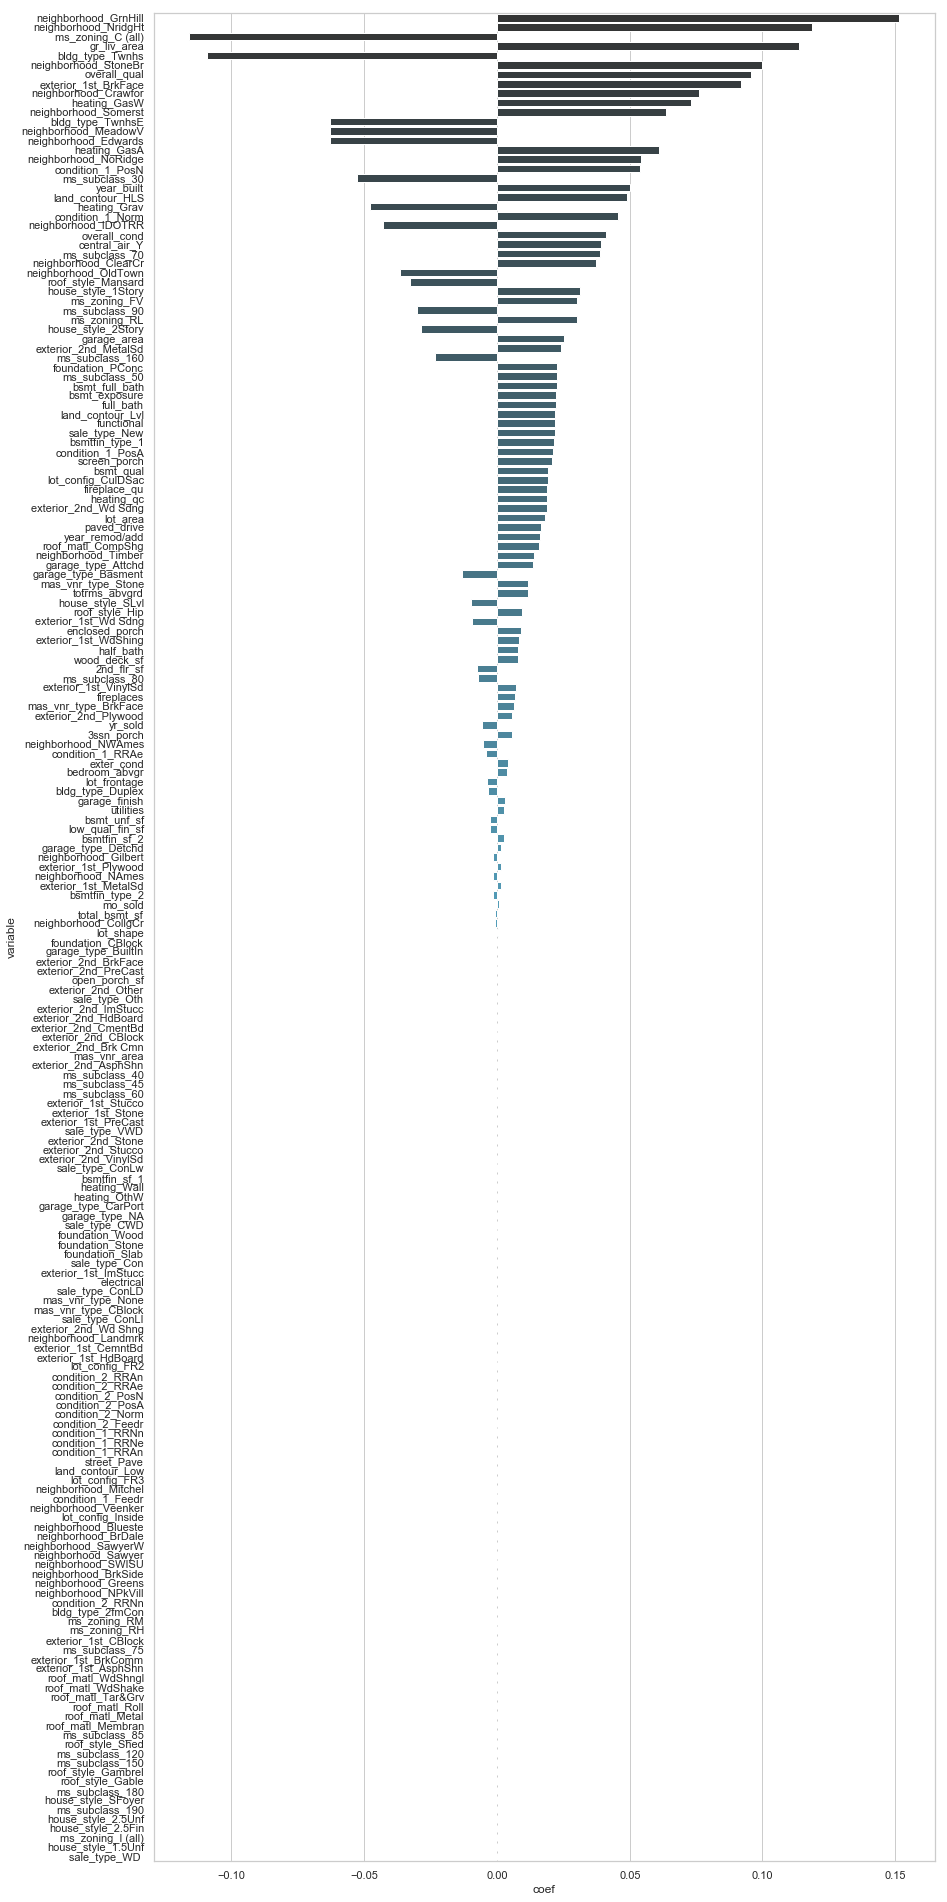

In [290]:
X = numeric_selected_train.join(dummies_train)
y = np.log(df_features['saleprice'])
lasso_reg(X,y)

In [272]:
X = numeric_selected_train.join(dummies_train)
y = np.log(df_features['saleprice'])
test_data = numeric_selected_test.join(dummies_test)

result = lasso_test(X,y,test_data)

Optimal alpha:  0.0003727648762140222


In [276]:
result['SalePrice'] = np.exp(result['SalePrice'])

In [278]:
result.to_csv(r'datasets/zl_sub_17.csv',index=False) 

#### RMSE from Kaggle = 28009.08618

This has been the lowest RMSE achieved, using systematically selected numeric features and all nominal features, together with a log transformation of sale prices. 

## Conclusion

### Findings

- There were a large number of null values in the dataset. Instead of dropping them, we filled them methodically, always having a logical reason behind why we are filling a certain value in.
- From our data exploration and various modelling using lasso regression, we identified certain features that were especially important to producing good predictions, including:
    - `Gr Liv Area`
    - `Overall Qual`
    - `Garage Area`
    - `Total Bsmt SF` 
    - `Neighborhood`
    - `MS SubClass`
- We systematically eliminated numeric features that caused multicollinearity and produced illogical coeffients, and combined this with various sets of nominal features. In the end, the best result was achieved when we put in all the nominal features and allowed the lasso regression to zero out some of them.  
- Although we experimented with feature engineering, we did not manage to engineer useful features. We made interaction terms logically (for example, combining `Total Bsmt SF` and `Bsmt Qual`) but this worsened prediction performance. This could possibly be because the dataset is already complex and multicollinearity was already a factor.

## Limitations

- The large number of null values may have skewed the data in a way we cannot compensate for, even though we tried our best to fill the values logically. 
- There is obviously strong multicollinearity among features in the dataset. Although we tried to mitigate this through feature selection and use of regularization, the effect cannot be completely eliminated. 
- Certain features are also skewed instead of normally distributed. While we corrected the `saleprice` through log transformation, this is still a factor we have to consider in analyzing our outcomes. 
- Lastly, our data may not be homoscedastic as shown by the scatter plots done of the predictions vs real values during our testing on holdout data. In particular, the residuals of the higher-price homes were usually larger.

## Further exploration

- We should explore other common factors that have an impact on property prices, such as:
    - Data about a house's proximity to schooling, shopping malls, or other facilities, similar to the `Condition 1` and `Condition 2` features. 
    - Data on the demographic changes in Ames (change in overall city population, change in overall age of population) as the number of people likely to seek a home will influence the property market.
- Even though the feature engineering that was attempted did not pan out, further exploration of potential relationships between features may yet yield a breakthrough. 